# INTRO TO THE PROJECT

In [2]:
#Download libraries
!pip install scikit-learn
!pip install seaborn
!pip install numpy
!pip install pandas
!pip install scikit-multilearn
!pip install plotly
!pip install nba_api
!pip install py-stringmatching
!pip install setuptools==58.0.4
!pip install py-stringsimjoin
!pip install torch


# Importing libraries and packages

In [3]:

#  git lfs track "*.csv" 
# git lfs track "notebooks/database.db"

import os
import glob
import sqlite3
import zipfile

import sqlite3 as sql
#Data Wrangling

import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import joblib
from sklearn.model_selection import ShuffleSplit, LearningCurveDisplay

# Linear Models
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression

#Trees
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, \
    ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

# SVM
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
# Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# dimensionality reduction
from sklearn.decomposition import PCA, KernelPCA

#Preprocessing Packages
from sklearn.model_selection import train_test_split

#Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Model tuning
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, f1_score, recall_score, classification_report, precision_score, \
    roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve

#Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Aditonal Data Sources
from nba_api.stats.endpoints import TeamInfoCommon
from nba_api.stats.static import teams

#Record Linking
import py_stringmatching as sm
import py_stringsimjoin as ssj

# deep learning
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from pandas import SparseDtype
from scipy.sparse import csr_matrix
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve, auc

import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

# Loading Data Sets
- Load NBA teams information
- Load NBA Shots from 2003-2024 seasons
- Load NBA players information

In [4]:
# Path to your zip file
current_dir = os.getcwd()
zip_file_path = current_dir + '/../raw-data/nba-shots.zip'
# list to store dataframes from CSV
csv_dataframes = []
# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_file:
    # Loop through each file in the zip
    for file_name in zip_file.namelist():
        # Check if the file is a CSV
        if file_name.endswith('.csv'):
            # Read the CSV file into a DataFrame
            with zip_file.open(file_name) as file:
                df = pd.read_csv(file)
                csv_dataframes.append(df)  # Store the DataFrame in the dictionary
                print(file_name)

# Now, `csv_dataframes` contains DataFrames for each CSV file
df = pd.concat(csv_dataframes)
df.head()

NBA_2004_Shots.csv
NBA_2005_Shots.csv
NBA_2006_Shots.csv
NBA_2007_Shots.csv
NBA_2008_Shots.csv
NBA_2009_Shots.csv
NBA_2010_Shots.csv
NBA_2011_Shots.csv
NBA_2012_Shots.csv
NBA_2013_Shots.csv
NBA_2014_Shots.csv
NBA_2015_Shots.csv
NBA_2016_Shots.csv
NBA_2017_Shots.csv
NBA_2018_Shots.csv
NBA_2019_Shots.csv
NBA_2020_Shots.csv
NBA_2021_Shots.csv
NBA_2022_Shots.csv
NBA_2023_Shots.csv
NBA_2024_Shots.csv


SEASON_1 SEASON_2     TEAM_ID               TEAM_NAME  PLAYER_ID  \
0      2004  2003-04  1610612747      Los Angeles Lakers        977   
1      2004  2003-04  1610612757  Portland Trail Blazers        757   
2      2004  2003-04  1610612747      Los Angeles Lakers        977   
3      2004  2003-04  1610612757  Portland Trail Blazers        757   
4      2004  2003-04  1610612757  Portland Trail Blazers        757   

        PLAYER_NAME POSITION_GROUP POSITION   GAME_DATE   GAME_ID  ...  \
0       Kobe Bryant              G       SG  04-14-2004  20301187  ...   
1  Damon Stoudamire              G       PG  04-14-2004  20301187  ...   
2       Kobe Bryant              G       SG  04-14-2004  20301187  ...   
3  Damon Stoudamire              G       PG  04-14-2004  20301187  ...   
4  Damon Stoudamire              G       PG  04-14-2004  20301187  ...   

          BASIC_ZONE         ZONE_NAME ZONE_ABB       ZONE_RANGE LOC_X  LOC_Y  \
0  Above the Break 3  Left Side Center       LC          24+ ft.  20.0  21.35   
1    Restricted Area            Center        C  Less Than 8 ft.  -0.0   5.25   
2          Mid-Range  Left Side Center       LC        16-24 ft.  13.3  24.45   
3          Mid-Range         Left Side        L        16-24 ft.  16.4  13.95   
4          Mid-Range        Right Side        R        16-24 ft. -15.8   7.85   

  SHOT_DISTANCE QUARTER MINS_LEFT SECS_LEFT  
0            25       6         0         0  
1             0       6         0         2  
2            23       6         0         9  
3            18       6         0        31  
4            16       6         0        55  

[5 rows x 26 columns]

In [ ]:
# Define the path to the NBA teams data file
nba_teams_file = current_dir + "/../raw-data/nba-teams.csv"
# Check if the NBA teams file exists
if not os.path.exists(nba_teams_file):
    print("File is not present, we use an NBA API Fetch Call")
    nba_teams = teams.get_teams()
    # Create a dictionary of team IDs
    team_ids_dict = {team['full_name']: team['id'] for team in nba_teams}
    # Create an empty DataFrame to store the data
    df_teams = pd.DataFrame()
    # Loop through the teams and append to the df
    for team_name, team_id in team_ids_dict.items():
        # Fetch detailed information for each team using its ID
        team_info = TeamInfoCommon(team_id=team_id)
        df_team = team_info.get_data_frames()[0]
        df_team['TeamName'] = team_name  # Adding the team name to the DataFrame
        df_teams = pd.concat([df_teams, df_team], ignore_index=True)
    # Print the combined DataFrame
else:
    print("File is present")
    df_teams = pd.read_csv(nba_teams_file)
df_teams

File is present


TEAM_ID SEASON_YEAR      TEAM_CITY      TEAM_NAME TEAM_ABBREVIATION  \
0   1610612737     2024-25        Atlanta          Hawks               ATL   
1   1610612738     2024-25         Boston        Celtics               BOS   
2   1610612739     2024-25      Cleveland      Cavaliers               CLE   
3   1610612740     2024-25    New Orleans       Pelicans               NOP   
4   1610612741     2024-25        Chicago          Bulls               CHI   
5   1610612742     2024-25         Dallas      Mavericks               DAL   
6   1610612743     2024-25         Denver        Nuggets               DEN   
7   1610612744     2024-25   Golden State       Warriors               GSW   
8   1610612745     2024-25        Houston        Rockets               HOU   
9   1610612746     2024-25             LA       Clippers               LAC   
10  1610612747     2024-25    Los Angeles         Lakers               LAL   
11  1610612748     2024-25          Miami           Heat               MIA   
12  1610612749     2024-25      Milwaukee          Bucks               MIL   
13  1610612750     2024-25      Minnesota   Timberwolves               MIN   
14  1610612751     2024-25       Brooklyn           Nets               BKN   
15  1610612752     2024-25       New York         Knicks               NYK   
16  1610612753     2024-25        Orlando          Magic               ORL   
17  1610612754     2024-25        Indiana         Pacers               IND   
18  1610612755     2024-25   Philadelphia          76ers               PHI   
19  1610612756     2024-25        Phoenix           Suns               PHX   
20  1610612757     2024-25       Portland  Trail Blazers               POR   
21  1610612758     2024-25     Sacramento          Kings               SAC   
22  1610612759     2024-25    San Antonio          Spurs               SAS   
23  1610612760     2024-25  Oklahoma City        Thunder               OKC   
24  1610612761     2024-25        Toronto        Raptors               TOR   
25  1610612762     2024-25           Utah           Jazz               UTA   
26  1610612763     2024-25        Memphis      Grizzlies               MEM   
27  1610612764     2024-25     Washington        Wizards               WAS   
28  1610612765     2024-25        Detroit        Pistons               DET   
29  1610612766     2024-25      Charlotte        Hornets               CHA   

   TEAM_CONFERENCE TEAM_DIVISION     TEAM_CODE     TEAM_SLUG   W   L    PCT  \
0             East     Southeast         hawks         hawks   7   8  0.467   
1             East      Atlantic       celtics       celtics  11   3  0.786   
2             East       Central     cavaliers     cavaliers  15   0  1.000   
3             West     Southwest      pelicans      pelicans   4  10  0.286   
4             East       Central         bulls         bulls   6   9  0.400   
5             West     Southwest     mavericks     mavericks   7   7  0.500   
6             West     Northwest       nuggets       nuggets   7   5  0.583   
7             West       Pacific      warriors      warriors  10   3  0.769   
8             West     Southwest       rockets       rockets  10   5  0.667   
9             West       Pacific      clippers      clippers   8   7  0.533   
10            West       Pacific        lakers        lakers   9   4  0.692   
11            East     Southeast          heat          heat   6   7  0.462   
12            East       Central         bucks         bucks   5   9  0.357   
13            West     Northwest  timberwolves  timberwolves   8   6  0.571   
14            East      Atlantic          nets          nets   5   9  0.357   
15            East      Atlantic        knicks        knicks   8   6  0.571   
16            East     Southeast         magic         magic   9   6  0.600   
17            East       Central        pacers        pacers   6   8  0.429   
18            East      Atlantic        sixers        sixers   2  11  0.154   
19      

In [ ]:
# Define the path to the player info data file
current_dir = os.getcwd()
dir_path = current_dir + '/../raw-data/'
df_players = pd.read_csv(dir_path + "common_player_info.csv")
df_players.head()

person_id first_name     last_name   display_first_last  \
0      76001       Alaa     Abdelnaby       Alaa Abdelnaby   
1      76003     Kareem  Abdul-Jabbar  Kareem Abdul-Jabbar   
2       1505      Tariq   Abdul-Wahad    Tariq Abdul-Wahad   
3        949    Shareef   Abdur-Rahim  Shareef Abdur-Rahim   
4      76005        Tom     Abernethy        Tom Abernethy   

  display_last_comma_first  display_fi_last          player_slug  \
0          Abdelnaby, Alaa     A. Abdelnaby       alaa-abdelnaby   
1     Abdul-Jabbar, Kareem  K. Abdul-Jabbar  kareem-abdul-jabbar   
2       Abdul-Wahad, Tariq   T. Abdul-Wahad    tariq-abdul-wahad   
3     Abdur-Rahim, Shareef   S. Abdur-Rahim  shareef-abdur-rahim   
4           Abernethy, Tom     T. Abernethy        tom-abernethy   

             birthdate          school country  ...  \
0  1968-06-24 00:00:00            Duke     USA  ...   
1  1947-04-16 00:00:00            UCLA     USA  ...   
2  1974-11-03 00:00:00  San Jose State  France  ...   
3  1976-12-11 00:00:00      California     USA  ...   
4  1954-05-06 00:00:00         Indiana     USA  ...   

                    playercode from_year  to_year  dleague_flag nba_flag  \
0       HISTADD_alaa_abdelnaby    1990.0   1994.0             N        Y   
1  HISTADD_kareem_abdul-jabbar    1969.0   1988.0             N        Y   
2            tariq_abdul-wahad    1997.0   2003.0             N        Y   
3          shareef_abdur-rahim    1996.0   2007.0             N        Y   
4        HISTADD_tom_abernethy    1976.0   1980.0             N        Y   

  games_played_flag draft_year draft_round  draft_number greatest_75_flag  
0                 Y       1990           1            25                N  
1                 Y       1969           1             1                Y  
2                 Y       1997           1            11                N  
3                 Y       1996           1             3                N  
4                 Y       1976           3            43                N  

[5 rows x 33 columns]

# Data Dictionary

**Self-Explanatory**: **TEAM_NAME**, **PLAYER_NAME**, **POSITION_GROUP**, **POSITION**, **HOME_TEAM**, **AWAY_TEAM**

- **SEASON_1** & **SEASON_2**: Season indicator variables  
- **TEAM_ID**: NBA's unique ID variable of that specific team in their API  
- **PLAYER_ID**: NBA's unique ID variable of that specific player in their API  
- **GAME_DATE**: Date of the game (M-D-Y // Month-Date-Year)  
- **GAME_ID**: NBA's unique ID variable of that specific game in their API  
- **EVENT_TYPE**: Character variable denoting a shot outcome (Made Shot // Missed Shot)  
- **SHOT_MADE**: True/False variable denoting a shot outcome (True // False)  
- **ACTION_TYPE**: Description of shot type (layup, dunk, jump shot, etc.)  
- **SHOT_TYPE**: Type of shot (2PT or 3PT)  
- **BASIC_ZONE**: Name of the court zone the shot took place in  
  - Restricted Area, In the Paint (non-RA), Midrange, Left Corner 3, Right Corner 3, Above the Break, Backcourt  
- **ZONE_NAME**: Name of the side of court the shot took place in  
  - left, left side center, center, right side center, right  
- **ZONE_ABB**: Abbreviation of the side of court  
  - (L), (LC), (C), (RC), (R)  
- **ZONE_RANGE**: Distance range of shot by zones  
  - Less than 8 ft., 8-16 ft. 16-24 ft. 24+ ft.  
- **LOC_X**: X coordinate of the shot in the x, y plane of the court (0, 50)  
- **LOC_Y**: Y coordinate of the shot in the x, y plane of the court (0, 50)  
- **SHOT_DISTANCE**: Distance of the shot with respect to the center of the hoop, in feet  
- **QUARTER**: Quarter of the game  
- **MINS_LEFT**: Minutes remaining in the quarter  
- **SECS_LEFT**: Seconds remaining in minute of the quarter  


# DATA Cleaning, Wrangling and Record Linking

In [7]:
df["ACTION_TYPE"].unique()

array(['Jump Shot', 'Driving Layup Shot', 'Dunk Shot',
       'Alley Oop Dunk Shot', 'Fadeaway Jump Shot',
       'Driving Finger Roll Shot', 'Layup Shot', 'Tip Shot',
       'Slam Dunk Shot', 'Running Hook Shot', 'Turnaround Jump Shot',
       'Running Layup Shot', 'Jump Bank Shot', 'Running Jump Shot',
       'Jump Hook Shot', 'Reverse Layup Shot', 'Driving Dunk Shot',
       'Hook Shot', 'Reverse Dunk Shot', 'Running Finger Roll Shot',
       'Turnaround Hook Shot', 'Alley Oop Layup shot',
       'Follow Up Dunk Shot', 'Driving Hook Shot', 'Running Dunk Shot',
       'Finger Roll Shot', 'Hook Bank Shot',
       'Turnaround Finger Roll Shot', 'Running Tip Shot',
       'Turnaround Fadeaway shot', 'Driving Slam Dunk Shot',
       'Step Back Jump shot', 'Pullup Jump shot', 'Running Bank shot',
       'Driving Finger Roll Layup Shot', 'Finger Roll Layup Shot',
       'Pullup Bank shot', 'Putback Dunk Shot', 'Floating Jump shot',
       'Putback Layup Shot', 'Jump Bank Hook Shot',
      

In [8]:
# inspect the Leagues data set
print("Number of duplicate rows: " + str(df.duplicated().sum()))
print("dtypes:")
print(df.dtypes)
print("----------------------------\nLeagues DF describe:")
print(df.describe())
print("----------------------------\nCheck for Null values:")
print(df.isna().sum())
print("----------------------------\nFirst 5 rows of the dataset")
df.head()

Number of duplicate rows: 192
dtypes:
SEASON_1            int64
SEASON_2           object
TEAM_ID             int64
TEAM_NAME          object
PLAYER_ID           int64
PLAYER_NAME        object
POSITION_GROUP     object
POSITION           object
GAME_DATE          object
GAME_ID             int64
HOME_TEAM          object
AWAY_TEAM          object
EVENT_TYPE         object
SHOT_MADE            bool
ACTION_TYPE        object
SHOT_TYPE          object
BASIC_ZONE         object
ZONE_NAME          object
ZONE_ABB           object
ZONE_RANGE         object
LOC_X             float64
LOC_Y             float64
SHOT_DISTANCE       int64
QUARTER             int64
MINS_LEFT           int64
SECS_LEFT           int64
dtype: object
----------------------------
Leagues DF describe:
           SEASON_1       TEAM_ID     PLAYER_ID       GAME_ID         LOC_X  \
count  4.231262e+06  4.231262e+06  4.231262e+06  4.231262e+06  4.231262e+06   
mean   2.014191e+03  1.610613e+09  4.136611e+05  2.131969e+07  9

SEASON_1 SEASON_2     TEAM_ID               TEAM_NAME  PLAYER_ID  \
0      2004  2003-04  1610612747      Los Angeles Lakers        977   
1      2004  2003-04  1610612757  Portland Trail Blazers        757   
2      2004  2003-04  1610612747      Los Angeles Lakers        977   
3      2004  2003-04  1610612757  Portland Trail Blazers        757   
4      2004  2003-04  1610612757  Portland Trail Blazers        757   

        PLAYER_NAME POSITION_GROUP POSITION   GAME_DATE   GAME_ID  ...  \
0       Kobe Bryant              G       SG  04-14-2004  20301187  ...   
1  Damon Stoudamire              G       PG  04-14-2004  20301187  ...   
2       Kobe Bryant              G       SG  04-14-2004  20301187  ...   
3  Damon Stoudamire              G       PG  04-14-2004  20301187  ...   
4  Damon Stoudamire              G       PG  04-14-2004  20301187  ...   

          BASIC_ZONE         ZONE_NAME ZONE_ABB       ZONE_RANGE LOC_X  LOC_Y  \
0  Above the Break 3  Left Side Center       LC          24+ ft.  20.0  21.35   
1    Restricted Area            Center        C  Less Than 8 ft.  -0.0   5.25   
2          Mid-Range  Left Side Center       LC        16-24 ft.  13.3  24.45   
3          Mid-Range         Left Side        L        16-24 ft.  16.4  13.95   
4          Mid-Range        Right Side        R        16-24 ft. -15.8   7.85   

  SHOT_DISTANCE QUARTER MINS_LEFT SECS_LEFT  
0            25       6         0         0  
1             0       6         0         2  
2            23       6         0         9  
3            18       6         0        31  
4            16       6         0        55  

[5 rows x 26 columns]

In [9]:
df_shots_clean = df.drop_duplicates()
df_shots_clean.head()

SEASON_1 SEASON_2     TEAM_ID               TEAM_NAME  PLAYER_ID  \
0      2004  2003-04  1610612747      Los Angeles Lakers        977   
1      2004  2003-04  1610612757  Portland Trail Blazers        757   
2      2004  2003-04  1610612747      Los Angeles Lakers        977   
3      2004  2003-04  1610612757  Portland Trail Blazers        757   
4      2004  2003-04  1610612757  Portland Trail Blazers        757   

        PLAYER_NAME POSITION_GROUP POSITION   GAME_DATE   GAME_ID  ...  \
0       Kobe Bryant              G       SG  04-14-2004  20301187  ...   
1  Damon Stoudamire              G       PG  04-14-2004  20301187  ...   
2       Kobe Bryant              G       SG  04-14-2004  20301187  ...   
3  Damon Stoudamire              G       PG  04-14-2004  20301187  ...   
4  Damon Stoudamire              G       PG  04-14-2004  20301187  ...   

          BASIC_ZONE         ZONE_NAME ZONE_ABB       ZONE_RANGE LOC_X  LOC_Y  \
0  Above the Break 3  Left Side Center       LC          24+ ft.  20.0  21.35   
1    Restricted Area            Center        C  Less Than 8 ft.  -0.0   5.25   
2          Mid-Range  Left Side Center       LC        16-24 ft.  13.3  24.45   
3          Mid-Range         Left Side        L        16-24 ft.  16.4  13.95   
4          Mid-Range        Right Side        R        16-24 ft. -15.8   7.85   

  SHOT_DISTANCE QUARTER MINS_LEFT SECS_LEFT  
0            25       6         0         0  
1             0       6         0         2  
2            23       6         0         9  
3            18       6         0        31  
4            16       6         0        55  

[5 rows x 26 columns]

In [10]:
df_shots_clean = df_shots_clean[df_shots_clean["ACTION_TYPE"] != "No Shot"]
# Drop NA records
print("Number of rows containing NA values:\n" + str(df_shots_clean.isna().sum()[df_shots_clean.isna().sum() > 0]))
df_shots_clean = df_shots_clean.dropna()
print("Number of rows containing NA values:\n" + str(df_shots_clean.isna().sum()[df_shots_clean.isna().sum() > 0]))
df_shots_clean[df_shots_clean["POSITION_GROUP"].isna() | df_shots_clean["POSITION"].isna()]

Number of rows containing NA values:
POSITION_GROUP    7930
POSITION          7930
dtype: int64
Number of rows containing NA values:
Series([], dtype: int64)


Empty DataFrame
Columns: [SEASON_1, SEASON_2, TEAM_ID, TEAM_NAME, PLAYER_ID, PLAYER_NAME, POSITION_GROUP, POSITION, GAME_DATE, GAME_ID, HOME_TEAM, AWAY_TEAM, EVENT_TYPE, SHOT_MADE, ACTION_TYPE, SHOT_TYPE, BASIC_ZONE, ZONE_NAME, ZONE_ABB, ZONE_RANGE, LOC_X, LOC_Y, SHOT_DISTANCE, QUARTER, MINS_LEFT, SECS_LEFT]
Index: []

[0 rows x 26 columns]

# Keep Only current 30 nba teams and get the respective conference for each team

In [ ]:
# Filter the dataset to keep only current NBA teams for the 2024 season
# Get the list of unique team names that appear in the dataset for the 2024 season
nba_teams = df_shots_clean[df_shots_clean["SEASON_1"] == 2024].TEAM_NAME.unique()
# Retain only rows in the dataset where the team name matches one of the current NBA teams
df_shots_clean = df_shots_clean[df_shots_clean["TEAM_NAME"].isin(nba_teams)]
# Check if the team names in the filtered shot data match the team names in the team information DataFrame
# This is a sanity check to ensure consistency between the two datasets
print(sorted(df_shots_clean.TEAM_NAME.unique()) == sorted(df_teams.TeamName))
# Merge the shot data with the team information DataFrame on the team name
# This adds additional team-related columns (conference and abbreviation) to the shot data 
df_shots_clean = df_shots_clean.merge(df_teams[['TeamName', 'TEAM_CONFERENCE', "TEAM_ABBREVIATION"]],
                                      left_on='TEAM_NAME', right_on='TeamName', how='inner')
print("Number of rows containing NA values:\n" + str(df_shots_clean.isna().sum()[df_shots_clean.isna().sum() > 0]))
df_shots_clean = df_shots_clean.dropna()
print("Number of rows containing NA values:\n" + str(df_shots_clean.isna().sum()[df_shots_clean.isna().sum() > 0]))
df_shots_clean.head()

False
Number of rows containing NA values:
Series([], dtype: int64)
Number of rows containing NA values:
Series([], dtype: int64)


SEASON_1 SEASON_2     TEAM_ID           TEAM_NAME  PLAYER_ID  PLAYER_NAME  \
0      2004  2003-04  1610612747  Los Angeles Lakers        977  Kobe Bryant   
1      2004  2003-04  1610612747  Los Angeles Lakers        977  Kobe Bryant   
2      2004  2003-04  1610612747  Los Angeles Lakers       2567   Brian Cook   
3      2004  2003-04  1610612747  Los Angeles Lakers        977  Kobe Bryant   
4      2004  2003-04  1610612747  Los Angeles Lakers        977  Kobe Bryant   

  POSITION_GROUP POSITION   GAME_DATE   GAME_ID  ...       ZONE_RANGE LOC_X  \
0              G       SG  04-14-2004  20301187  ...          24+ ft.  20.0   
1              G       SG  04-14-2004  20301187  ...        16-24 ft.  13.3   
2              C        C  04-14-2004  20301187  ...  Less Than 8 ft.  -0.0   
3              G       SG  04-14-2004  20301187  ...          24+ ft.  -1.5   
4              G       SG  04-14-2004  20301187  ...        16-24 ft. -14.6   

   LOC_Y  SHOT_DISTANCE QUARTER MINS_LEFT SECS_LEFT            TeamName  \
0  21.35             25       6         0         0  Los Angeles Lakers   
1  24.45             23       6         0         9  Los Angeles Lakers   
2   5.25              0       6         1        12  Los Angeles Lakers   
3  29.95             24       6         1        42  Los Angeles Lakers   
4  16.75             18       6         2        27  Los Angeles Lakers   

  TEAM_CONFERENCE TEAM_ABBREVIATION  
0            West               LAL  
1            West               LAL  
2            West               LAL  
3            West               LAL  
4            West               LAL  

[5 rows x 29 columns]

In [ ]:
# Print the unique team names that belong to the "East" conference
# This extracts and displays all unique team names classified as part of the Eastern Conference in the dataset
print(df_shots_clean[df_shots_clean["TEAM_CONFERENCE"] == "East"]["TEAM_NAME"].unique())
# Print the unique team names that belong to the "West" conference
# This extracts and displays all unique team names classified as part of the Western Conference in the dataset
print(df_shots_clean[df_shots_clean["TEAM_CONFERENCE"] == "West"]["TEAM_NAME"].unique())
# Check that no team from West appears in East conference and vice versa 
# The logic:
# - Extract unique team names for the "East" conference
# - Extract unique team names for the "West" conference
# - Use set intersection to check for common elements (teams) between the two groups
# - Convert the result to a boolean to indicate whether any overlap exists
print(bool(set(df_shots_clean[df_shots_clean["TEAM_CONFERENCE"] == "East"]["TEAM_NAME"].unique()).intersection(
    set(df_shots_clean[df_shots_clean["TEAM_CONFERENCE"] == "West"]["TEAM_NAME"].unique()))))

['Atlanta Hawks' 'Boston Celtics' 'Chicago Bulls' 'Miami Heat'
 'Philadelphia 76ers' 'Washington Wizards' 'Indiana Pacers'
 'Orlando Magic' 'Milwaukee Bucks' 'Toronto Raptors' 'New York Knicks'
 'Cleveland Cavaliers' 'Detroit Pistons' 'Brooklyn Nets'
 'Charlotte Hornets']
['Los Angeles Lakers' 'Portland Trail Blazers' 'Denver Nuggets'
 'San Antonio Spurs' 'Utah Jazz' 'Memphis Grizzlies'
 'Minnesota Timberwolves' 'Phoenix Suns' 'Houston Rockets'
 'Sacramento Kings' 'Dallas Mavericks' 'Golden State Warriors'
 'Oklahoma City Thunder' 'New Orleans Pelicans']
False


In [ ]:
# Drop unnecessary columns
df_clean_players = df_players.drop(
    columns=["draft_round", "draft_number", "first_name", "last_name", "display_last_comma_first", "display_fi_last",
             "player_slug", "jersey", "games_played_current_season_flag", "games_played_flag", "playercode",
             "dleague_flag", "nba_flag", "greatest_75_flag", "team_code"]).drop_duplicates()
df_clean_players.head()

person_id   display_first_last            birthdate          school  \
0      76001       Alaa Abdelnaby  1968-06-24 00:00:00            Duke   
1      76003  Kareem Abdul-Jabbar  1947-04-16 00:00:00            UCLA   
2       1505    Tariq Abdul-Wahad  1974-11-03 00:00:00  San Jose State   
3        949  Shareef Abdur-Rahim  1976-12-11 00:00:00      California   
4      76005        Tom Abernethy  1954-05-06 00:00:00         Indiana   

  country       last_affiliation height  weight  season_exp       position  \
0     USA               Duke/USA   6-10   240.0         5.0        Forward   
1     USA               UCLA/USA    7-2   225.0        20.0         Center   
2  France  San Jose State/France    6-6   235.0         7.0  Forward-Guard   
3     USA         California/USA    6-9   245.0        13.0        Forward   
4     USA            Indiana/USA    6-7   220.0         5.0        Forward   

  rosterstatus     team_id      team_name team_abbreviation     team_city  \
0     Inactive  1610612757  Trail Blazers               POR      Portland   
1     Inactive  1610612747         Lakers               LAL   Los Angeles   
2     Inactive  1610612758          Kings               SAC    Sacramento   
3     Inactive  1610612763      Grizzlies               VAN     Vancouver   
4     Inactive  1610612744       Warriors               GOS  Golden State   

   from_year  to_year draft_year  
0     1990.0   1994.0       1990  
1     1969.0   1988.0       1969  
2     1997.0   2003.0       1997  
3     1996.0   2007.0       1996  
4     1976.0   1980.0       1976

# Link NBA Shots DF and Players DF on Player First Name and Last Name basis via Qgram-Jaccard_join

In [ ]:
# Initialize a Q-gram tokenizer with q=5 and set output format to sets
# Q-gram tokenization breaks strings into overlapping substrings of length q
# This helps in approximate string matching by comparing sets of such substrings
tok = sm.QgramTokenizer(qval=5, return_set=True)

# Perform a Jaccard join to link two datasets based on approximate string matching
# - `df_shots_clean[["PLAYER_ID", "PLAYER_NAME"]].drop_duplicates(subset="PLAYER_ID")`: 
#   Select unique players in the shots dataset based on PLAYER_ID
# - `df_clean_players`: The second dataset (e.g., players data)
# - `'PLAYER_ID', 'person_id'`: Columns to match between the two datasets (keys)
# - `'PLAYER_NAME', 'display_first_last'`: Columns used for string similarity comparison
# - `tok`: The tokenizer used to compare strings
# - `0.7`: Jaccard similarity threshold for matching
# - `l_out_attrs=['PLAYER_NAME']`: Attributes to include from the left dataset in the output
# - `r_out_attrs=['display_first_last']`: Attributes to include from the right dataset in the output
output_pairs = ssj.jaccard_join(
    df_shots_clean[["PLAYER_ID", "PLAYER_NAME"]].drop_duplicates(subset="PLAYER_ID"),
    df_clean_players,
    'PLAYER_ID',
    'person_id',
    'PLAYER_NAME',
    'display_first_last',
    tok,
    0.7,
    l_out_attrs=['PLAYER_NAME'],
    r_out_attrs=['display_first_last']
)

# Print the minimum similarity score from the output pairs
# If all matches have a similarity score of 1, it indicates perfect matches
print("Min sim_score: " + str(output_pairs["_sim_score"].min()))
# Since the min score is 1  is no need to do further linking we can just merge
output_pairs

Min sim_score: 1.0


_id  l_PLAYER_ID  r_person_id        l_PLAYER_NAME  \
0        0          949          949  Shareef Abdur-Rahim   
1        1       203518       203518         Alex Abrines   
2        2      1630173      1630173     Precious Achiuwa   
3        3       101165       101165           Alex Acker   
4        4       203112       203112           Quincy Acy   
...    ...          ...          ...                  ...   
1742  1742         1917         1917         Wang Zhi-zhi   
1743  1743      1627757      1627757    Stephen Zimmerman   
1744  1744      1627835      1627835          Paul Zipser   
1745  1745      1627790      1627790           Ante Zizic   
1746  1746      1627826      1627826          Ivica Zubac   

     r_display_first_last  _sim_score  
0     Shareef Abdur-Rahim         1.0  
1            Alex Abrines         1.0  
2        Precious Achiuwa         1.0  
3              Alex Acker         1.0  
4              Quincy Acy         1.0  
...                   ...         ...  
1742         Wang Zhi-zhi         1.0  
1743    Stephen Zimmerman         1.0  
1744          Paul Zipser         1.0  
1745           Ante Zizic         1.0  
1746          Ivica Zubac         1.0  

[1747 rows x 6 columns]

In [ ]:
# Perform the merge for linked players records
df_clean_players = df_clean_players[df_clean_players["display_first_last"].isin(output_pairs["r_display_first_last"])]
df_clean_players = df_clean_players.merge(right=output_pairs[["l_PLAYER_ID", "r_person_id"]], left_on="person_id",
                                          right_on="r_person_id", how="inner").drop(
    columns=["r_person_id", "person_id"]).rename(
    columns={"l_PLAYER_ID": "PLAYER_ID", "team_abbreviation": "TEAM_ABBREVIATION", "team_name": "TeamName",
             "team_city": "TEAM_CITY"}).reset_index(drop=True)
# Convert birthdate to age
today = pd.to_datetime("2024")
# Convert the birthdate column to a datetime object for calculations
df_clean_players["birthdate"] = pd.to_datetime(df_clean_players["birthdate"])
# Calculate players' ages in years
# - `(today - df_clean_players["birthdate"]).dt.days // 365`: Calculate the difference in days, then convert to years
df_clean_players["age"] = (today - df_clean_players["birthdate"]).dt.days // 365
df_clean_players

display_first_last  birthdate         school  country  \
0     Shareef Abdur-Rahim 1976-12-11     California      USA   
1            Alex Abrines 1993-08-01   FC Barcelona    Spain   
2        Precious Achiuwa 1999-09-19        Memphis  Nigeria   
3              Alex Acker 1983-01-21     Pepperdine      USA   
4              Quincy Acy 1990-10-06         Baylor      USA   
...                   ...        ...            ...      ...   
1742         Wang Zhi-zhi 1977-07-08           Bayi    China   
1743    Stephen Zimmerman 1996-09-09           UNLV      USA   
1744          Paul Zipser 1994-02-18  Bayern Munich  Germany   
1745           Ante Zizic 1997-01-04    Darussafaka  Croatia   
1746          Ivica Zubac 1997-03-18    Mega Basket  Croatia   

           last_affiliation height  weight  season_exp position rosterstatus  \
0            California/USA    6-9   245.0        13.0  Forward     Inactive   
1        FC Barcelona/Spain    6-6   200.0         3.0    Guard     Inactive   
2           Memphis/Nigeria    6-8   225.0         3.0  Forward       Active   
3            Pepperdine/USA    6-5   185.0         3.0    Guard     Inactive   
4                Baylor/USA    6-7   240.0         7.0  Forward     Inactive   
...                     ...    ...     ...         ...      ...          ...   
1742             Bayi/China    7-1   284.0         6.0   Center     Inactive   
1743               UNLV/USA    7-0   240.0         2.0   Center     Inactive   
1744  Bayern Munich/Germany    6-8   226.0         2.0  Forward     Inactive   
1745    Darussafaka/Croatia   6-10   266.0         4.0   Center     Inactive   
1746    Mega Basket/Croatia    7-0   240.0         7.0   Center       Active   

         team_id   TeamName TEAM_ABBREVIATION    TEAM_CITY  from_year  \
0     1610612763  Grizzlies               VAN    Vancouver     1996.0   
1              0        NaN               NaN          NaN     2016.0   
2     1610612761    Raptors               TOR      Toronto     2020.0   
3     1610612746   Clippers               LAC  Los Angeles     2005.0   
4              0        NaN               NaN          NaN     2012.0   
...          ...        ...               ...          ...        ...   
1742           0        NaN               NaN          NaN     2000.0   
1743  1610612753      Magic               ORL      Orlando     2016.0   
1744  1610612741      Bulls               CHI      Chicago     2016.0   
1745  1610612739  Cavaliers               CLE    Cleveland     2017.0   
1746  1610612746   Clippers               LAC           LA     2016.0   

      to_year draft_year  PLAYER_ID  age  
0      2007.0       1996        949   47  
1      2018.0       2013     203518   30  
2      2023.0       2020    1630173   24  
3      2008.0       2005     101165   40  
4      2018.0       2012     203112   33  
...       ...        ...        ...  ...  
1742   2004.0       1999       1917   46  
1743   2016.0       2016    1627757   27  
1744   2017.0       2016    1627835   29  
1745   2019.0       2016    1627790   27  
1746   2023.0       2016    1627826   26  

[1747 rows x 19 columns]

# Fill records where players with NA values for team they play

In [ ]:
# Filter players whose team name (`TeamName`) is missing (NaN)
df_na_players = df_clean_players[df_clean_players["TeamName"].isna()].reset_index(drop=True)
# Print the count of players with missing team names who are "Active"
# - This step checks if any active players have missing team information
print(len(df_na_players[df_na_players["rosterstatus"] == "Active"]))
# Since we have 0 active players with NA values, then we link the latest team from nba shots df to an inactive players
# - This step is specifically for inactive players with missing `TeamName` values
# - Link the most recent team data using the `df_shots_clean` DataFrame:
#   - Sort `df_shots_clean` by `GAME_DATE` in ascending order to get the most recent game first
#   - Drop duplicates based on `PLAYER_ID`, keeping only the latest game record
#   - Merge the resulting data with `df_na_players` on `PLAYER_ID` to fill in missing `TeamName` values
df_na_players = pd.merge(left=df_na_players, right=df_shots_clean[["PLAYER_ID", "TeamName", "GAME_DATE"]].sort_values(
    by="GAME_DATE").drop_duplicates(subset=["PLAYER_ID"], keep="last"), on="PLAYER_ID", how="left").drop(
    columns=["TeamName_x"]).rename(columns={"TeamName_y": "TeamName"}).reset_index(drop=True)
# Enrich the player data with additional team-related details
# - Merge `df_na_players` with `df_teams` to add `TEAM_ABBREVIATION` and `TEAM_CITY` information
# - Use an inner join to ensure that only valid team matches are included
df_na_players = df_na_players.merge(df_teams[["TeamName", "TEAM_ABBREVIATION", "TEAM_CITY"]], on="TeamName",
                                    how="inner").drop(
    columns=["TEAM_ABBREVIATION_x", "TEAM_CITY_x", "GAME_DATE"]).rename(
    columns={"TEAM_ABBREVIATION_y": "TEAM_ABBREVIATION", "TEAM_CITY_y": "TEAM_CITY"}).reset_index(drop=True)
df_na_players

0


display_first_last  birthdate              school  \
0          Alex Abrines 1993-08-01        FC Barcelona   
1      Antonio Anderson 1985-06-05             Memphis   
2           Moses Brown 1999-10-13                UCLA   
3         Deonte Burton 1994-01-31          Iowa State   
4           Tyler Davis 1997-05-22           Texas A&M   
..                  ...        ...                 ...   
478  Miroslav Raduljica 1988-01-05         Efes Pilsen   
479     Mirza Teletovic 1985-09-17            Baskonia   
480       Rashad Vaughn 1996-08-16                UNLV   
481         D.J. Wilson 1996-02-19            Michigan   
482        Nate Wolters 1991-05-15  South Dakota State   

                    country                 last_affiliation height  weight  \
0                     Spain               FC Barcelona/Spain    6-6   200.0   
1                       USA                      Memphis/USA    6-6   215.0   
2                       USA                         UCLA/USA    7-2   245.0   
3                       USA                   Iowa State/USA    6-4   240.0   
4                       USA                    Texas A&M/USA   6-10   266.0   
..                      ...                              ...    ...     ...   
478                  Serbia               Efes Pilsen/Serbia    7-0   250.0   
479  Bosnia and Herzegovina  Baskonia/Bosnia and Herzegovina    6-9   242.0   
480                     USA                         UNLV/USA    6-6   202.0   
481                     USA                     Michigan/USA   6-10   231.0   
482                     USA           South Dakota State/USA    6-4   190.0   

     season_exp       position rosterstatus  team_id  from_year  to_year  \
0           3.0          Guard     Inactive        0     2016.0   2018.0   
1           2.0          Guard     Inactive        0     2009.0   2009.0   
2           4.0         Center     Inactive        0     2019.0   2022.0   
3           3.0  Guard-Forward     Inactive        0     2018.0   2022.0   
4           1.0         Center     Inactive        0     2018.0   2018.0   
..          ...            ...          ...      ...        ...      ...   
478         2.0         Center     Inactive        0     2013.0   2014.0   
479         6.0        Forward     Inactive        0     2012.0   2017.0   
480         3.0          Guard     Inactive        0     2015.0   2017.0   
481         6.0        Forward     Inactive        0     2017.0   2021.0   
482         3.0          Guard     Inactive        0     2013.0   2017.0   

    draft_year  PLAYER_ID  age               TeamName TEAM_ABBREVIATION  \
0         2013     203518   30  Oklahoma City Thunder               OKC   
1    Undrafted     202079   38  Oklahoma City Thunder               OKC   
2    Undrafted    1629650   24  Oklahoma City Thunder               OKC   
3    Undrafted    1629126   29  Oklahoma City Thunder               OKC   
4    Undrafted    1629093   26  Oklahoma City Thunder               OKC   
..         ...        ...  ...                    ...               ...   
478  Undrafted     203545   36        Milwaukee Bucks               MIL   
479  Undrafted     203141   38        Milwaukee Bucks               MIL   
480       2015    1626173   27        Milwaukee Bucks               MIL   
481       2017    1628391   27        Milwaukee Bucks               MIL   
482       2013     203489   32        Milwaukee Bucks               MIL   

         TEAM_CITY  
0    Oklahoma City  
1    Oklahoma City  
2    Oklahoma City  
3    Oklahoma City  
4    Oklahoma City  
..             ...  
478      Milwaukee  
479      Milwaukee  
480      Milwaukee  
481      Milwaukee  
482      Milwaukee  

[483 rows x 19 columns]

In [ ]:
# Drop records with missing values in critical columns
# - Ensure `TeamName`, `TEAM_ABBREVIATION`, and `TEAM_CITY` are all present for each player
# - This removes incomplete records to maintain data integrity
df_clean_players = df_clean_players.dropna(subset=["TeamName", "TEAM_ABBREVIATION", "TEAM_CITY"])
# Concatenate `df_clean_players` with `df_na_players`
# - `df_na_players` contains players with previously missing `TeamName` values that have now been filled
# - Use `ignore_index=True` to reindex the combined DataFrame for a clean, continuous index
# - Drop any remaining rows with missing values across all columns
df_clean_players = pd.concat([df_clean_players, df_na_players], ignore_index=True).dropna()
df_clean_players

display_first_last  birthdate              school  \
0     Shareef Abdur-Rahim 1976-12-11          California   
1        Precious Achiuwa 1999-09-19             Memphis   
2              Alex Acker 1983-01-21          Pepperdine   
3            Jordan Adams 1994-07-08                UCLA   
4            Steven Adams 1993-07-20          Pittsburgh   
...                   ...        ...                 ...   
1742   Miroslav Raduljica 1988-01-05         Efes Pilsen   
1743      Mirza Teletovic 1985-09-17            Baskonia   
1744        Rashad Vaughn 1996-08-16                UNLV   
1745          D.J. Wilson 1996-02-19            Michigan   
1746         Nate Wolters 1991-05-15  South Dakota State   

                     country                 last_affiliation height  weight  \
0                        USA                   California/USA    6-9   245.0   
1                    Nigeria                  Memphis/Nigeria    6-8   225.0   
2                        USA                   Pepperdine/USA    6-5   185.0   
3                        USA                         UCLA/USA    6-5   209.0   
4                New Zealand           Pittsburgh/New Zealand   6-11   265.0   
...                      ...                              ...    ...     ...   
1742                  Serbia               Efes Pilsen/Serbia    7-0   250.0   
1743  Bosnia and Herzegovina  Baskonia/Bosnia and Herzegovina    6-9   242.0   
1744                     USA                         UNLV/USA    6-6   202.0   
1745                     USA                     Michigan/USA   6-10   231.0   
1746                     USA           South Dakota State/USA    6-4   190.0   

      season_exp position rosterstatus     team_id         TeamName  \
0           13.0  Forward     Inactive  1610612763        Grizzlies   
1            3.0  Forward       Active  1610612761          Raptors   
2            3.0    Guard     Inactive  1610612746         Clippers   
3            3.0    Guard     Inactive  1610612763        Grizzlies   
4           10.0   Center       Active  1610612763        Grizzlies   
...          ...      ...          ...         ...              ...   
1742         2.0   Center     Inactive           0  Milwaukee Bucks   
1743         6.0  Forward     Inactive           0  Milwaukee Bucks   
1744         3.0    Guard     Inactive           0  Milwaukee Bucks   
1745         6.0  Forward     Inactive           0  Milwaukee Bucks   
1746         3.0    Guard     Inactive           0  Milwaukee Bucks   

     TEAM_ABBREVIATION    TEAM_CITY  from_year  to_year draft_year  PLAYER_ID  \
0                  VAN    Vancouver     1996.0   2007.0       1996        949   
1                  TOR      Toronto     2020.0   2023.0       2020    1630173   
2                  LAC  Los Angeles     2005.0   2008.0       2005     101165   
3                  MEM      Memphis     2014.0   2015.0       2014     203919   
4                  MEM      Memphis     2013.0   2023.0       2013     203500   
...                ...          ...        ...      ...        ...        ...   
1742               MIL    Milwaukee     2013.0   2014.0  Undrafted     203545   
1743               MIL    Milwaukee     2012.0   2017.0  Undrafted     203141   
1744               MIL    Milwaukee     2015.0   2017.0       2015    1626173   
1745               MIL    Milwaukee     2017.0   2021.0       2017    1628391   
1746               MIL    Milwaukee     2013.0   2017.0       2013     203489   

      age  
0      47  
1      24  
2      40  
3      29  
4      30  
...   ...  
1742   36  
1743   38  
1744   27  
1745   27  
1746   32  

[1707 rows x 19 columns]

# Convert Active-Inactive variable to boolean 1/0

In [ ]:
# Convert the 'rosterstatus' column to a numerical representation
# - Map 'Active' status to 1 (indicating an active player)
# - Map 'Inactive' status to 0 (indicating an inactive player)
# - Any other status or missing value will be set as None
df_clean_players["rosterstatus"] = df_clean_players["rosterstatus"].map(
    lambda record: 1 if record == "Active" else (0 if record == "Inactive" else None))
# Filter the DataFrame to keep only active players
# - Create a new DataFrame `df_active_players` containing only rows where 'rosterstatus' is 1 (active)
df_active_players = df_clean_players[df_clean_players["rosterstatus"] == 1]
df_active_players


display_first_last  birthdate           school      country  \
1      Precious Achiuwa 1999-09-19          Memphis      Nigeria   
4          Steven Adams 1993-07-20       Pittsburgh  New Zealand   
5           Bam Adebayo 1997-07-18         Kentucky          USA   
8          Ochai Agbaji 2000-04-20           Kansas          USA   
13         Santi Aldama 2001-01-10  Loyola-Maryland        Spain   
...                 ...        ...              ...          ...   
1256     Thaddeus Young 1988-06-21     Georgia Tech          USA   
1257         Trae Young 1998-09-19         Oklahoma          USA   
1258     Omer Yurtseven 1998-06-19       Georgetown       Turkey   
1259        Cody Zeller 1992-10-05          Indiana          USA   
1263        Ivica Zubac 1997-03-18      Mega Basket      Croatia   

            last_affiliation height  weight  season_exp        position  \
1            Memphis/Nigeria    6-8   225.0         3.0         Forward   
4     Pittsburgh/New Zealand   6-11   265.0        10.0          Center   
5               Kentucky/USA    6-9   255.0         6.0  Center-Forward   
8                 Kansas/USA    6-5   215.0         1.0           Guard   
13     Loyola-Maryland/Spain    7-0   215.0         2.0  Forward-Center   
...                      ...    ...     ...         ...             ...   
1256        Georgia Tech/USA    6-8   235.0        16.0         Forward   
1257            Oklahoma/USA    6-1   164.0         5.0           Guard   
1258       Georgetown/Turkey   6-11   275.0         2.0          Center   
1259             Indiana/USA   6-11   240.0        10.0  Forward-Center   
1263     Mega Basket/Croatia    7-0   240.0         7.0          Center   

      rosterstatus     team_id   TeamName TEAM_ABBREVIATION TEAM_CITY  \
1                1  1610612761    Raptors               TOR   Toronto   
4                1  1610612763  Grizzlies               MEM   Memphis   
5                1  1610612748       Heat               MIA     Miami   
8                1  1610612762       Jazz               UTA      Utah   
13               1  1610612763  Grizzlies               MEM   Memphis   
...            ...         ...        ...               ...       ...   
1256             1  1610612761    Raptors               TOR   Toronto   
1257             1  1610612737      Hawks               ATL   Atlanta   
1258             1  1610612748       Heat               MIA     Miami   
1259             1  1610612748       Heat               MIA     Miami   
1263             1  1610612746   Clippers               LAC        LA   

      from_year  to_year draft_year  PLAYER_ID  age  
1        2020.0   2023.0       2020    1630173   24  
4        2013.0   2023.0       2013     203500   30  
5        2017.0   2023.0       2017    1628389   26  
8        2022.0   2023.0       2022    1630534   23  
13       2021.0   2023.0       2021    1630583   22  
...         ...      ...        ...        ...  ...  
1256     2007.0   2023.0       2007     201152   35  
1257     2018.0   2023.0       2018    1629027   25  
1258     2020.0   2023.0  Undrafted    1630209   25  
1259     2013.0   2023.0       2013     203469   31  
1263     2016.0   2023.0       2016    1627826   26  

[420 rows x 19 columns]

In [ ]:
# Merge the `df_clean_players` DataFrame with `df_shots_clean` to add the `rosterstatus` column
# - This operation matches player IDs between the two DataFrames and brings in the `rosterstatus` column from `df_clean_players`
# - This allows `df_shots_clean` to have information on whether each player was active or inactive during the recorded shots
df_shots_clean = pd.merge(left=df_shots_clean, right=df_clean_players[["rosterstatus", "PLAYER_ID"]], on="PLAYER_ID")
df_shots_clean = df_shots_clean.drop(columns=["TeamName"])

df_shots_clean.head()

SEASON_1 SEASON_2     TEAM_ID           TEAM_NAME  PLAYER_ID  PLAYER_NAME  \
0      2004  2003-04  1610612747  Los Angeles Lakers        977  Kobe Bryant   
1      2004  2003-04  1610612747  Los Angeles Lakers        977  Kobe Bryant   
2      2004  2003-04  1610612747  Los Angeles Lakers        977  Kobe Bryant   
3      2004  2003-04  1610612747  Los Angeles Lakers        977  Kobe Bryant   
4      2004  2003-04  1610612747  Los Angeles Lakers        977  Kobe Bryant   

  POSITION_GROUP POSITION   GAME_DATE   GAME_ID  ...       ZONE_RANGE LOC_X  \
0              G       SG  04-14-2004  20301187  ...          24+ ft.  20.0   
1              G       SG  04-14-2004  20301187  ...        16-24 ft.  13.3   
2              G       SG  04-14-2004  20301187  ...          24+ ft.  -1.5   
3              G       SG  04-14-2004  20301187  ...        16-24 ft. -14.6   
4              G       SG  04-14-2004  20301187  ...  Less Than 8 ft.  -0.0   

   LOC_Y  SHOT_DISTANCE QUARTER MINS_LEFT SECS_LEFT TEAM_CONFERENCE  \
0  21.35             25       6         0         0            West   
1  24.45             23       6         0         9            West   
2  29.95             24       6         1        42            West   
3  16.75             18       6         2        27            West   
4   5.25              0       6         3        31            West   

  TEAM_ABBREVIATION rosterstatus  
0               LAL            0  
1               LAL            0  
2               LAL            0  
3               LAL            0  
4               LAL            0  

[5 rows x 29 columns]

In [ ]:
# Print unique values in the "SHOT_TYPE" column to understand the different types of shots in the data
print(df_shots_clean["SHOT_TYPE"].unique())
# Convert the "SHOT_TYPE" column to a boolean 1/0 variable indicating whether a shot is a 3-point or 2-point shot
# - Use a lambda function to map "3PT Field Goal" to 1 (indicating a 3-point shot) and any other value to 0 (indicating a 2-point shot)
df_shots_clean["SHOT_TYPE"] = df_shots_clean["SHOT_TYPE"].map(lambda x: 1 if x == "3PT Field Goal" else 0)
# Rename the "SHOT_TYPE" column to "IS_3PT" for better readability and clarity
df_shots_clean = df_shots_clean.rename(columns={"SHOT_TYPE": "IS_3PT"})
# Create a new column "is_home" to indicate whether the team that played was the home team
# - Compare the "HOME_TEAM" column to the "TEAM_ABBREVIATION" column to check if they match, resulting in a boolean value
# - Convert the boolean result to an integer (1 for home, 0 for away)
df_shots_clean["is_home"] = (df_shots_clean["HOME_TEAM"] == df_shots_clean["TEAM_ABBREVIATION"]).astype(int)
df_shots_clean.head()

['3PT Field Goal' '2PT Field Goal']


SEASON_1 SEASON_2     TEAM_ID           TEAM_NAME  PLAYER_ID  PLAYER_NAME  \
0      2004  2003-04  1610612747  Los Angeles Lakers        977  Kobe Bryant   
1      2004  2003-04  1610612747  Los Angeles Lakers        977  Kobe Bryant   
2      2004  2003-04  1610612747  Los Angeles Lakers        977  Kobe Bryant   
3      2004  2003-04  1610612747  Los Angeles Lakers        977  Kobe Bryant   
4      2004  2003-04  1610612747  Los Angeles Lakers        977  Kobe Bryant   

  POSITION_GROUP POSITION   GAME_DATE   GAME_ID  ... LOC_X  LOC_Y  \
0              G       SG  04-14-2004  20301187  ...  20.0  21.35   
1              G       SG  04-14-2004  20301187  ...  13.3  24.45   
2              G       SG  04-14-2004  20301187  ...  -1.5  29.95   
3              G       SG  04-14-2004  20301187  ... -14.6  16.75   
4              G       SG  04-14-2004  20301187  ...  -0.0   5.25   

  SHOT_DISTANCE  QUARTER MINS_LEFT  SECS_LEFT TEAM_CONFERENCE  \
0            25        6         0          0            West   
1            23        6         0          9            West   
2            24        6         1         42            West   
3            18        6         2         27            West   
4             0        6         3         31            West   

  TEAM_ABBREVIATION rosterstatus is_home  
0               LAL            0       0  
1               LAL            0       0  
2               LAL            0       0  
3               LAL            0       0  
4               LAL            0       0  

[5 rows x 30 columns]

In [ ]:
# We have at least 1.3m records of shots for currently active players
df_shots_clean[df_shots_clean["rosterstatus"] == 1]

SEASON_1 SEASON_2     TEAM_ID           TEAM_NAME  PLAYER_ID  \
203323       2015  2014-15  1610612747  Los Angeles Lakers     203903   
203324       2015  2014-15  1610612747  Los Angeles Lakers     203903   
203325       2015  2014-15  1610612747  Los Angeles Lakers     203903   
203326       2015  2014-15  1610612747  Los Angeles Lakers     203903   
203327       2015  2014-15  1610612747  Los Angeles Lakers     203903   
...           ...      ...         ...                 ...        ...   
3316076      2024  2023-24  1610612766   Charlotte Hornets    1631109   
3316077      2024  2023-24  1610612766   Charlotte Hornets    1631109   
3316078      2024  2023-24  1610612766   Charlotte Hornets    1631109   
3316079      2024  2023-24  1610612766   Charlotte Hornets    1631109   
3316080      2024  2023-24  1610612766   Charlotte Hornets    1631109   

             PLAYER_NAME POSITION_GROUP POSITION   GAME_DATE   GAME_ID  ...  \
203323   Jordan Clarkson              G       PG  04-13-2015  21401211  ...   
203324   Jordan Clarkson              G       PG  04-13-2015  21401211  ...   
203325   Jordan Clarkson              G       PG  04-13-2015  21401211  ...   
203326   Jordan Clarkson              G       PG  04-13-2015  21401211  ...   
203327   Jordan Clarkson              G       PG  04-13-2015  21401211  ...   
...                  ...            ...      ...         ...       ...  ...   
3316076    Mark Williams              C        C  12-02-2023  22300281  ...   
3316077    Mark Williams              C        C  12-08-2023  22301216  ...   
3316078    Mark Williams              C        C  12-08-2023  22301216  ...   
3316079    Mark Williams              C        C  12-08-2023  22301216  ...   
3316080    Mark Williams              C        C  12-08-2023  22301216  ...   

        LOC_X  LOC_Y SHOT_DISTANCE  QUARTER MINS_LEFT  SECS_LEFT  \
203323   -0.2  32.05            26        4         1         17   
203324   -1.4   8.95             3        4         7         17   
203325   -3.1  30.75            25        4         9         30   
203326  -14.0  19.05            19        4         9         58   
203327   -7.5   9.45             8        3         0          1   
...       ...    ...           ...      ...       ...        ...   
3316076   1.0   6.25             1        4         5         41   
3316077  -2.7  14.15             9        1         9         10   
3316078  -1.0   5.55             1        1         4         45   
3316079  -1.0   9.85             4        3         9         51   
3316080  -1.7   6.55             2        3         4         18   

        TEAM_CONFERENCE TEAM_ABBREVIATION rosterstatus is_home  
203323             West               LAL            1       0  
203324             West               LAL            1       0  
203325             West               LAL            1       0  
203326             West               LAL            1       0  
203327             West               LAL            1       0  
...                 ...               ...          ...     ...  
3316076            East               CHA            1       1  
3316077            East               CHA            1       1  
3316078            East               CHA            1       1  
3316079            East               CHA            1       1  
3316080            East               CHA            1       1  

[1378606 rows x 30 columns]

In [ ]:
# Establish a connection to an SQLite database named "database.db"
conn = sql.connect("database.db")
# Write the data from the 'df_shots_clean' DataFrame to the 'nba' table in the SQLite database
# - 'if_exists="replace"': If the table 'nba' already exists in the database, it will be replaced with the new data
# - 'index=False': Do not write the DataFrame's index as a separate column in the SQL table
df_shots_clean.to_sql("nba", conn, if_exists="replace", index=False)

3316081

# Exploratory Data Analysis (EDA)
- Jump Shot accuracy by Zone (2pt and 3pt)
- Accuracy by action type (done)
- Most efficient players + shot distribution heat map
- Home vs. Performance for teams
- Time trend in accuracy, points,  action type, etc

# Accuracy by action type

In [ ]:
# Get the unique action types from the 'ACTION_TYPE' column in the DataFrame 'df_shots_clean'
action_types_p = df_shots_clean.ACTION_TYPE.unique()

# Execute an SQL query to get the distinct action types from the 'nba' table in the database
# The result is stored as a DataFrame 'action_types_sql' with one column 'ACTION_TYPE'
action_types_sql = pd.read_sql("SELECT DISTINCT ACTION_TYPE from nba", conn)

# Check if the number of unique action types from the pandas DataFrame is equal to the number of unique action types from the SQL table
# Print whether the number of unique action types is the same in both pandas and SQL
print("Pandas and SQL versions are identical: " + str(len(action_types_p) == len(action_types_sql)))

action_types_p

Pandas and SQL versions are identical: True


array(['Jump Shot', 'Fadeaway Jump Shot', 'Driving Finger Roll Shot',
       'Driving Layup Shot', 'Running Hook Shot', 'Dunk Shot',
       'Running Dunk Shot', 'Layup Shot', 'Running Layup Shot',
       'Slam Dunk Shot', 'Reverse Layup Shot', 'Finger Roll Shot',
       'Running Jump Shot', 'Turnaround Jump Shot', 'Reverse Dunk Shot',
       'Hook Shot', 'Jump Bank Shot', 'Tip Shot', 'Driving Dunk Shot',
       'Jump Hook Shot', 'Turnaround Finger Roll Shot',
       'Alley Oop Layup shot', 'Follow Up Dunk Shot',
       'Alley Oop Dunk Shot', 'Running Finger Roll Shot',
       'Turnaround Hook Shot', 'Driving Hook Shot', 'Hook Bank Shot',
       'Running Tip Shot', 'Driving Finger Roll Layup Shot',
       'Turnaround Fadeaway shot', 'Finger Roll Layup Shot',
       'Pullup Jump shot', 'Putback Dunk Shot',
       'Driving Reverse Layup Shot', 'Driving Slam Dunk Shot',
       'Turnaround Bank shot', 'Step Back Jump shot',
       'Putback Layup Shot', 'Floating Jump shot', 'Driving Jump sh

In [ ]:
# Define an SQL query to select the count of each action type from the 'nba' table
# The query groups the data by 'ACTION_TYPE' and orders the results in descending order by the count
query = '''
SELECT ACTION_TYPE, COUNT(*) AS count
FROM nba
GROUP BY ACTION_TYPE
ORDER BY count DESC
'''
# Execute the SQL query and store the result in a DataFrame 'top_action_types_df'
# This DataFrame will contain the number of occurrences for each action type in the 'nba' table
top_action_types_df = pd.read_sql(query, conn)
# top_action_types_df = df_shots_clean.groupby("ACTION_TYPE").agg(count=("ACTION_TYPE", "count")).sort_values(by="count",  ascending=False).reset_index()

# Filter 'top_action_types_df' to keep only the rows where the count is greater than or equal to the 75th percentile of the count values
# This will result in a DataFrame that includes only the most frequent action types
top_action_types_df = top_action_types_df[
    top_action_types_df["count"] >= top_action_types_df["count"].quantile(0.75)].reset_index(drop=True)
# Create a new DataFrame 'action_types_75_p' that includes only the data from 'df_shots_clean' for action types that appear in 'top_action_types_df'
# The DataFrame will only include columns 'ACTION_TYPE', 'SHOT_MADE', and 'SHOT_DISTANCE'
action_types_75_p = df_shots_clean[df_shots_clean["ACTION_TYPE"].isin(top_action_types_df["ACTION_TYPE"])][
    ["ACTION_TYPE", "SHOT_MADE", "SHOT_DISTANCE"]]
# Group 'action_types_75_p' by 'ACTION_TYPE' and calculate:
# - 'accuracy': the mean of the 'SHOT_MADE' column, representing the shooting accuracy for each action type
# - 'avg_distance': the mean of the 'SHOT_DISTANCE' column, representing the average distance of shots for each action type
# - 'count': the count of 'SHOT_MADE' records, representing the number of occurrences for each action type
# Reset the index after grouping to create a clean DataFrame
action_types_75_p = action_types_75_p.groupby("ACTION_TYPE").agg(accuracy=("SHOT_MADE", "mean"),
                                                                 avg_distance=("SHOT_DISTANCE", "mean"),
                                                                 count=("SHOT_MADE", "count")).reset_index()
action_types_75_p

ACTION_TYPE  accuracy  avg_distance    count
0               Cutting Layup Shot  0.719645      1.699506    35455
1   Driving Finger Roll Layup Shot  0.677061      1.891494    37233
2       Driving Floating Jump Shot  0.433311      7.898551    54372
3               Driving Layup Shot  0.594566      1.546183   229502
4                        Dunk Shot  0.873505      0.390242    51773
5               Fadeaway Jump Shot  0.470550     12.985448    50441
6               Floating Jump shot  0.484464      8.320131    47568
7                        Hook Shot  0.450195      5.566439    51220
8                        Jump Shot  0.345800     20.104960  1551613
9                       Layup Shot  0.468603      0.889824   337505
10                Pullup Jump shot  0.455323     19.102095   185699
11              Reverse Layup Shot  0.660183      0.860571    33006
12               Running Jump Shot  0.473558     13.295188    52946
13              Running Layup Shot  0.646916      1.573997    44556
14             Step Back Jump shot  0.429198     20.465449    69984
15                  Tip Layup Shot  0.485857      0.382753    32666
16                        Tip Shot  0.476542      0.470026    35447
17            Turnaround Jump Shot  0.465921     10.491044    56443

In [ ]:
# Bubble Chart (Scatter Plot with Bubble Size)
fig = go.Figure()
fig.update_layout(width=1400, height=800, title="NBA Players Action Type Accuracy, Shot Distance and Attempt Count",
                  xaxis=dict(
                      title="Average Distance from the basket",
                      gridcolor="white",
                      gridwidth=2,
                  ),
                  yaxis=dict(
                      title="Accuracy (%)",
                      gridcolor="white",
                      gridwidth=2,
                  ),
                  )
# Add a trace to the plot for the scatter plot with bubbles
fig.add_trace(
    go.Scatter(
        x=action_types_75_p["avg_distance"],
        y=action_types_75_p["accuracy"] * 100, # y-axis data: accuracy (converted to percentage)
        mode="markers",  # Use markers (bubbles) for the plot
        marker=dict(
            size=action_types_75_p["count"],  # Size of each bubble based on shot count
            sizemode="area",  # Size mode set to area (bubbles will be scaled by their area)
            sizeref=100,
            color=action_types_75_p["count"],  # Color of the bubbles based on shot count
            colorscale="Viridis",
            showscale=True,
            line_color='rgb(140, 140, 170)',  # Border color for the bubbles
            colorbar_title='Shots<br>Count',
        ),
        text=action_types_75_p["ACTION_TYPE"],
        hovertemplate=(
                "Action Type: %{text}<br>" +  # Display action type on hover
                "Accuracy: %{y:.2f}<br>" +  # Display accuracy as a percentage on hover (2 decimal places)
                "Average Distance: %{x:.2f}<br>" +  # Display average distance on hover (2 decimal places)
                "Attempt Count: %{marker.size:.0f}"  # Display the number of attempts (no decimal places)
        ),
        name="Action Types"  # Name of the trace (legend label)
    )
)

In [ ]:
# Get the unique positions from the df_shots_clean DataFrame
positions_p = df_shots_clean.POSITION.unique()

# Query the database to get the distinct positions from the 'nba' table
positions_sql = pd.read_sql("SELECT DISTINCT POSITION from nba", conn)

# Check if the number of unique positions from the Pandas DataFrame matches the number from the SQL query
print("Pandas and SQL versions are identical: " + str(len(positions_p) == len(positions_sql)))
positions_p

Pandas and SQL versions are identical: True


array(['SG', 'SF', 'PG', 'SG-PG', 'C', 'PF', 'PF-SF', 'PG-SG', 'SF-SG',
       'SG-SF', 'C-PF', 'PF-C', 'SF-PF', 'SG-PF', 'SF-C', 'PG-SF',
       'SG-PG-SF'], dtype=object)

In [ ]:
# Get the unique basic zones from the df_shots_clean DataFrame
basic_zones_p = df_shots_clean.BASIC_ZONE.unique()

# Query the database to get the distinct basic zones from the 'nba' table
basic_zones_sql = pd.read_sql("SELECT DISTINCT BASIC_ZONE from nba", conn)

# Check if the number of unique basic zones from the Pandas DataFrame matches the number from the SQL query
print("Pandas and SQL versions are identical: " + str(len(basic_zones_p) == len(basic_zones_sql)))
basic_zones_p

Pandas and SQL versions are identical: True


array(['Above the Break 3', 'Mid-Range', 'Restricted Area',
       'In The Paint (Non-RA)', 'Backcourt', 'Right Corner 3',
       'Left Corner 3'], dtype=object)

In [ ]:
# Get the unique zone names from the df_shots_clean DataFrame
zone_names_p = df_shots_clean.ZONE_NAME.unique()

# Query the database to get the distinct zone names from the 'nba' table
zone_names_sql = pd.read_sql("SELECT DISTINCT ZONE_NAME from nba", conn)

# Check if the number of unique zone names from the Pandas DataFrame matches the number from the SQL query
print("Pandas and SQL versions are identical: " + str(len(zone_names_p) == len(zone_names_sql)))

zone_names_p

Pandas and SQL versions are identical: True


array(['Left Side Center', 'Center', 'Right Side Center', 'Right Side',
       'Left Side', 'Back Court'], dtype=object)

In [ ]:
# SQL query to get the counts of shots grouped by POSITION, BASIC_ZONE, and ZONE_NAME
query = '''
SELECT POSITION, BASIC_ZONE, ZONE_NAME, COUNT(*) AS count
FROM nba
GROUP BY POSITION, BASIC_ZONE, ZONE_NAME
ORDER BY count DESC
'''
# Execute the query and store the result in a DataFrame
top_zones_df = pd.read_sql(query, conn)

# Filter the DataFrame to retain only rows where the count is in the top 25th percentile
top_zones_df = top_zones_df[top_zones_df["count"] >= top_zones_df["count"].quantile(0.75)].reset_index(drop=True)

# Filter the original DataFrame to only include rows with POSITION, BASIC_ZONE, and ZONE_NAME
# combinations that are present in the top_zones_df DataFrame
position_zones_75_p = df_shots_clean[
    df_shots_clean.set_index(["POSITION", "BASIC_ZONE", "ZONE_NAME"]).index.isin(
        top_zones_df.set_index(["POSITION", "BASIC_ZONE", "ZONE_NAME"]).index
    )
][["POSITION", "BASIC_ZONE", "ZONE_NAME", "SHOT_MADE", "SHOT_DISTANCE"]]

# Group the filtered DataFrame by POSITION, BASIC_ZONE, and ZONE_NAME
# and aggregate statistics: accuracy (mean of SHOT_MADE), average shot distance, and total shot count
position_zones_75_p = position_zones_75_p.groupby(["POSITION", "BASIC_ZONE", "ZONE_NAME"]).agg(
    accuracy=("SHOT_MADE", "mean"),         # Average success rate (accuracy)
    avg_distance=("SHOT_DISTANCE", "mean"), # Average distance of shots
    count=("SHOT_MADE", "count")            # Total number of shots made
).reset_index()

position_zones_75_p

POSITION             BASIC_ZONE          ZONE_NAME  accuracy  avg_distance  \
0         C      Above the Break 3             Center  0.351542     25.460525   
1         C      Above the Break 3   Left Side Center  0.339345     25.453814   
2         C      Above the Break 3  Right Side Center  0.340432     25.430675   
3         C  In The Paint (Non-RA)             Center  0.430759      6.469394   
4         C  In The Paint (Non-RA)          Left Side  0.412035      9.232185   
..      ...                    ...                ...       ...           ...   
61       SG              Mid-Range   Left Side Center  0.395796     18.729481   
62       SG              Mid-Range         Right Side  0.397453     15.152994   
63       SG              Mid-Range  Right Side Center  0.394058     18.775431   
64       SG        Restricted Area             Center  0.596785      1.030964   
65       SG         Right Corner 3         Right Side  0.394848     22.934841   

     count  
0    14883  
1    11811  
2    10660  
3   102447  
4     5866  
..     ...  
61   27547  
62   44126  
63   31772  
64  185732  
65   36219  

[66 rows x 6 columns]

In [ ]:
fig = go.Figure()
fig.update_layout(width=1400, height=800, title="NBA Players Position Accuracy, Shot Distance and Attempt Count",
                  xaxis=dict(
                      title="Average Distance from the basket",
                      gridcolor="white",
                      gridwidth=2,
                  ),
                  yaxis=dict(
                      title="Accuracy (%)",
                      gridcolor="white",
                      gridwidth=2,
                  ),
                  )
# Add a scatter trace to the figure for plotting the data
fig.add_trace(
    go.Scatter(
        x=position_zones_75_p["avg_distance"],
        y=position_zones_75_p["accuracy"] * 100,
        mode="markers",  # Display the data as markers only (no lines connecting points)
        marker=dict(
            size=position_zones_75_p["count"],  # Marker size represents the count of attempts
            sizemode="area",  # Size mode for markers is based on area
            sizeref=100,
            color=position_zones_75_p["count"],  # Color of the markers based on the count of attempts
            colorscale="Viridis",
            showscale=True,
            line_color='rgb(140, 140, 170)',  # Border color for the markers
            colorbar_title='Shots<br>Count',  # Title for the color bar
        ),
    text=position_zones_75_p["POSITION"],  # Text displayed on hover (position)
    hovertemplate=(
            "Position: %{text}<br>" +  # Display position on hover
            "Accuracy: %{y:.2f}<br>" +  # Display accuracy formatted to 2 decimal places
            "Average Distance: %{x:.2f}<br>" +  # Display average distance formatted to 2 decimal places
            "Attempt Count: %{marker.size:.0f}"  # Display the size of the marker (count) formatted as an integer
    ),
    name="Positions"  # Name for the trace in the legend
    )
)

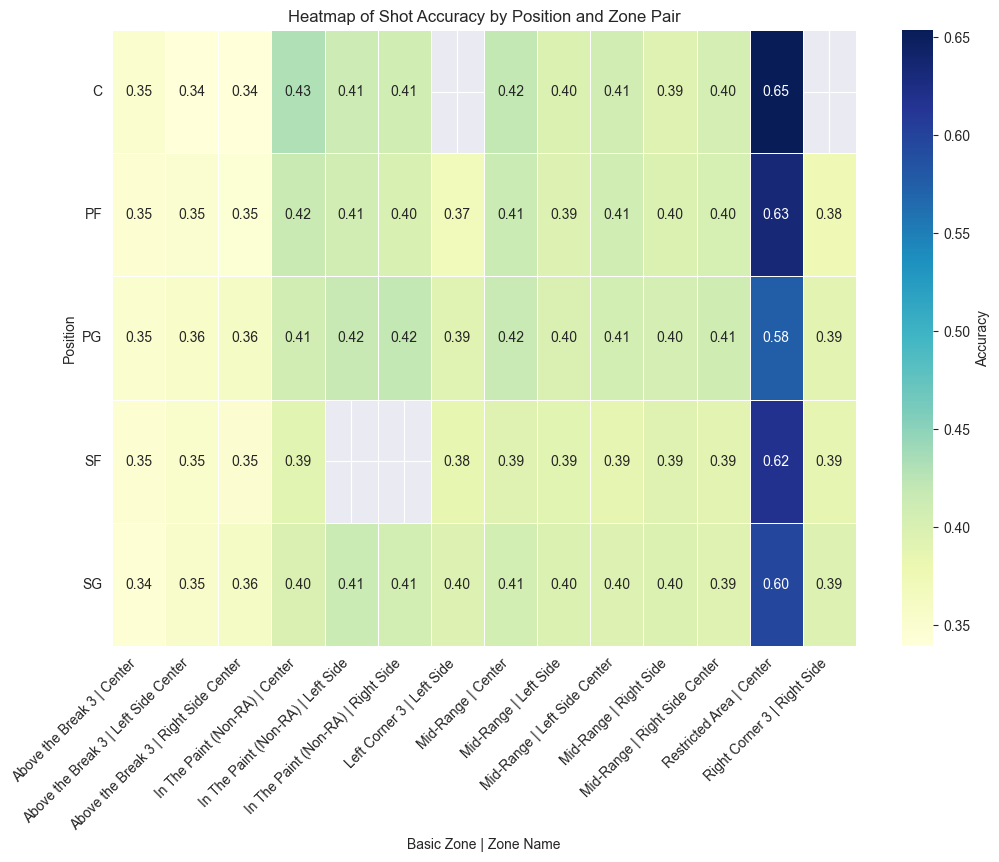

In [ ]:
# Create a copy of the DataFrame with position and zone pair data
position_zone_pairs_75_p = position_zones_75_p

# Create a new column 'Zone_Pair' that combines 'BASIC_ZONE' and 'ZONE_NAME' with a separator
position_zone_pairs_75_p['Zone_Pair'] = position_zone_pairs_75_p['BASIC_ZONE'] + " | " + position_zone_pairs_75_p['ZONE_NAME']

# Create a pivot table to summarize the accuracy data by position and zone pair
pivot_data = position_zone_pairs_75_p.pivot_table(
    index='POSITION',  # Rows represent player positions
    columns='Zone_Pair',  # Columns represent the combined zone pair
    values='accuracy'  # Values in the table show the accuracy for each combination
)

# Set up the plot for the heatmap with specified figure size
plt.figure(figsize=(12, 8))

# Generate the heatmap using seaborn
sns.heatmap(
    pivot_data,  # The data to be plotted
    annot=True,  # Display the accuracy values on the heatmap
    fmt=".2f",  # Format the annotation to show 2 decimal places
    cmap="YlGnBu",  # Set the color map (Yellow-Green-Blue)
    cbar_kws={'label': 'Accuracy'},  # Label for the color bar
    linewidths=.5  # Set the linewidth between cells
)

# Set the plot title and axis labels
plt.title('Heatmap of Shot Accuracy by Position and Zone Pair')
plt.xlabel('Basic Zone | Zone Name')
plt.ylabel('Position')

# Rotate x-axis labels for better readability and set alignment
plt.xticks(rotation=45, ha='right')

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

plt.show()

# Comparison of 2pt vs. 3pt shots over time

In [ ]:
# SQL query to retrieve data on team shot accuracy for 2PT and 3PT shots over different seasons
query = '''
SELECT TEAM_NAME, SEASON_1 as season, IS_3PT, AVG(SHOT_MADE)*100 as accuracy, TEAM_CONFERENCE as conference
FROM nba
GROUP BY SEASON_1, TEAM_CONFERENCE, TEAM_NAME, IS_3PT
'''
# Execute the SQL query and load the data into a pandas DataFrame
shot_type_df = pd.read_sql(query, conn)
shot_type_df

TEAM_NAME  season  IS_3PT   accuracy conference
0         Atlanta Hawks    2004       0  45.346833       East
1         Atlanta Hawks    2004       1  33.010563       East
2        Boston Celtics    2004       0  47.235319       East
3        Boston Celtics    2004       1  35.027933       East
4         Chicago Bulls    2004       0  43.242059       East
...                 ...     ...     ...        ...        ...
1143   Sacramento Kings    2024       1  36.730534       West
1144  San Antonio Spurs    2024       0  53.964497       West
1145  San Antonio Spurs    2024       1  34.807256       West
1146          Utah Jazz    2024       0  55.969905       West
1147          Utah Jazz    2024       1  35.510204       West

[1148 rows x 5 columns]

In [ ]:
# Create a copy of the original DataFrame to apply the rolling mean calculation
rolling_mean = shot_type_df.copy()

# Calculate the rolling mean of the 'accuracy' column over a window of 3 seasons
# The rolling mean is applied within each group defined by 'TEAM_NAME' and 'IS_3PT'
rolling_mean['rolling_mean'] = rolling_mean['accuracy'].transform(
    lambda x: x.rolling(window=3, center=False).mean()
)

# Drop rows where 'rolling_mean' is NaN (resulting from insufficient data at the start of the rolling window)
rolling_mean = rolling_mean.dropna(subset=['rolling_mean'])
rolling_mean

TEAM_NAME  season  IS_3PT   accuracy conference  rolling_mean
2          Boston Celtics    2004       0  47.235319       East     41.864239
3          Boston Celtics    2004       1  35.027933       East     38.424605
4           Chicago Bulls    2004       0  43.242059       East     41.835104
5           Chicago Bulls    2004       1  34.536505       East     37.602166
6     Cleveland Cavaliers    2004       0  44.842969       East     40.873845
...                   ...     ...     ...        ...        ...           ...
1143     Sacramento Kings    2024       1  36.730534       West     42.359478
1144    San Antonio Spurs    2024       0  53.964497       West     48.845084
1145    San Antonio Spurs    2024       1  34.807256       West     41.834096
1146            Utah Jazz    2024       0  55.969905       West     48.247219
1147            Utah Jazz    2024       1  35.510204       West     42.095788

[1146 rows x 6 columns]

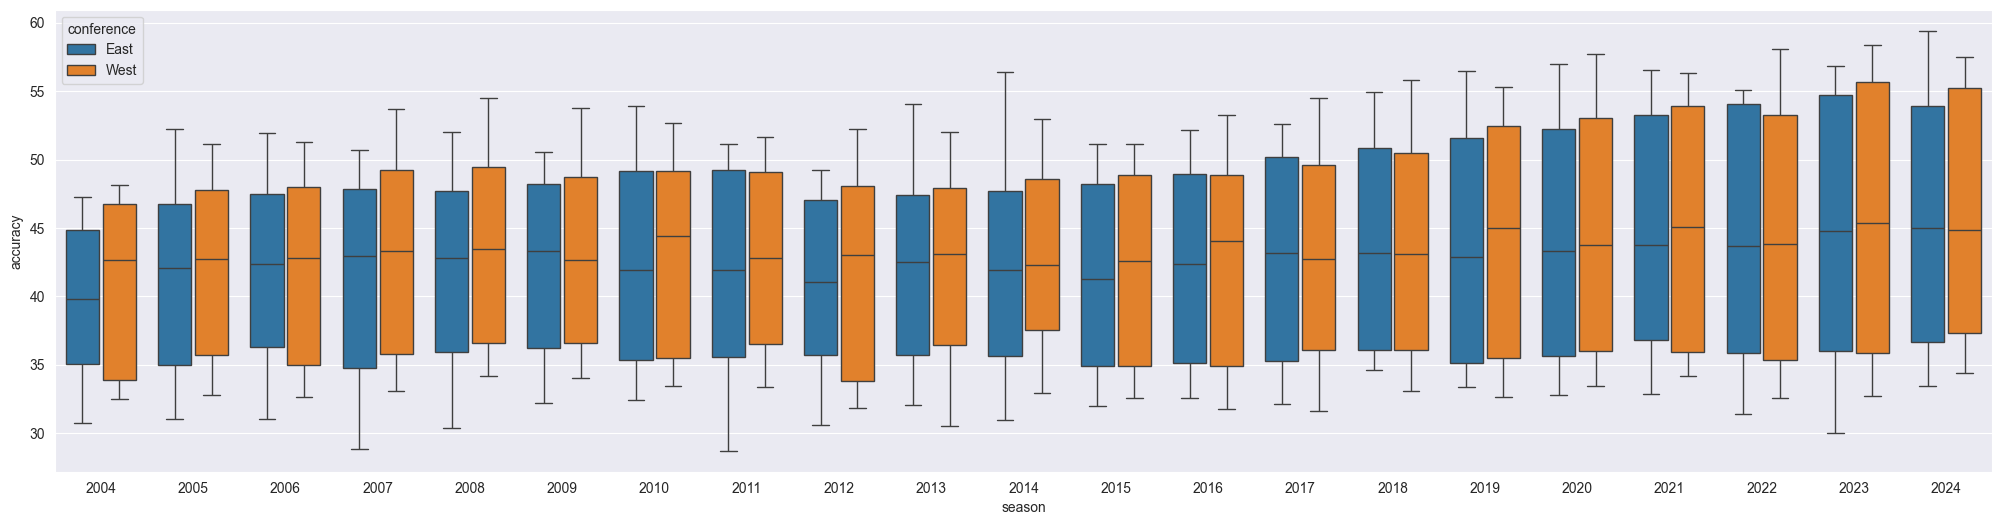

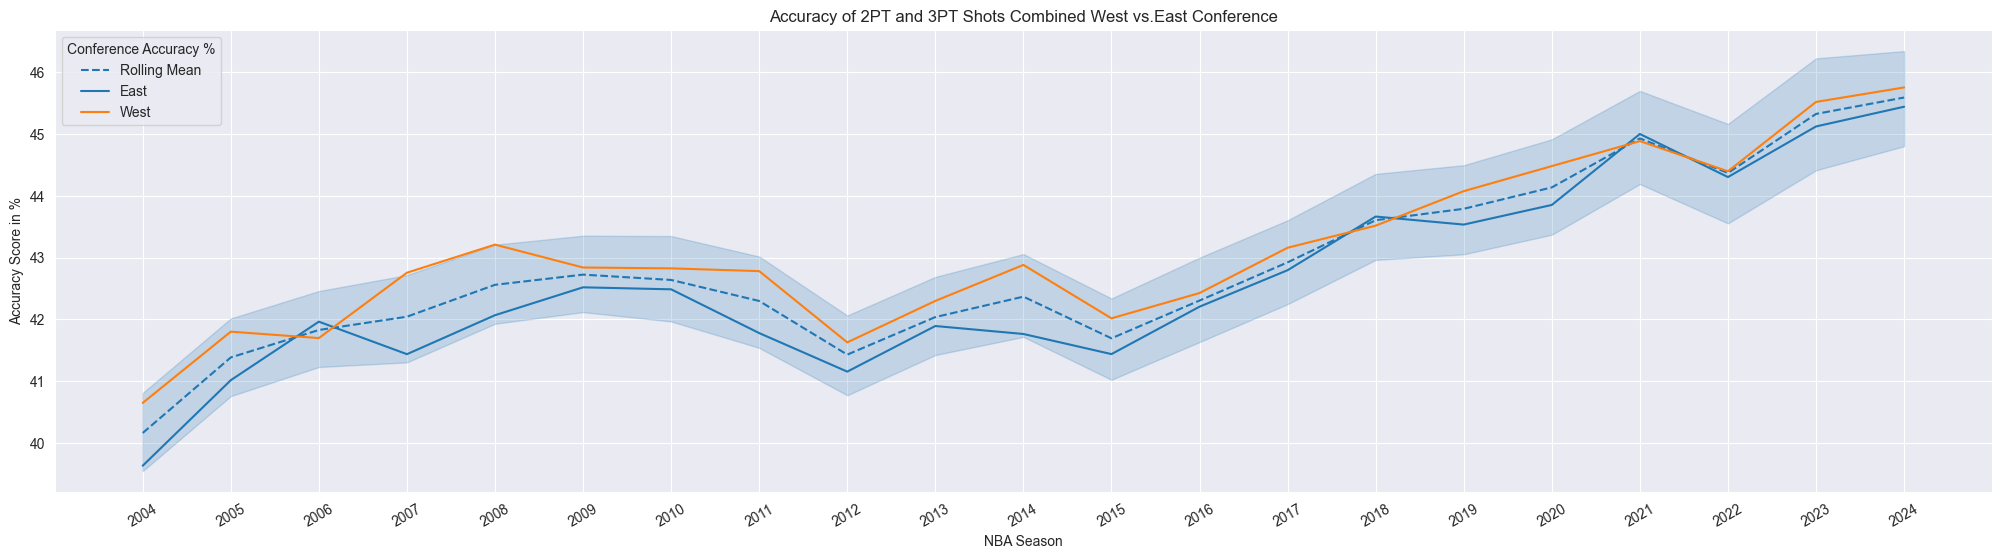

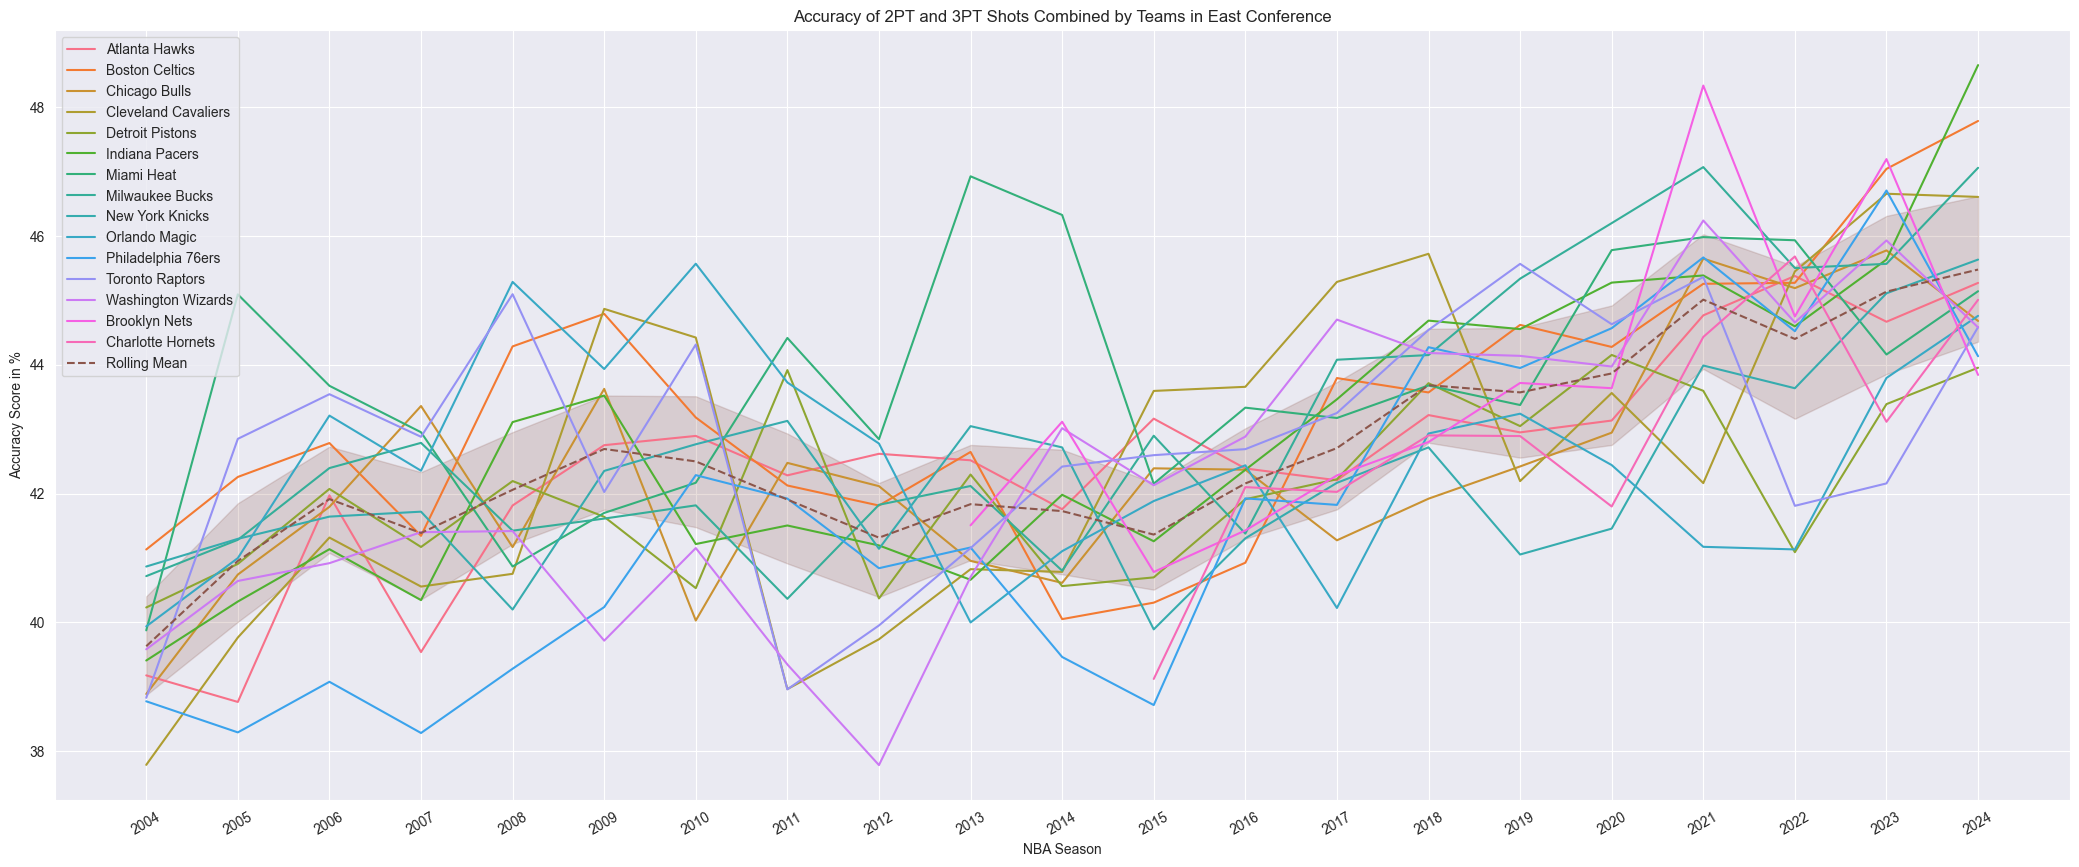

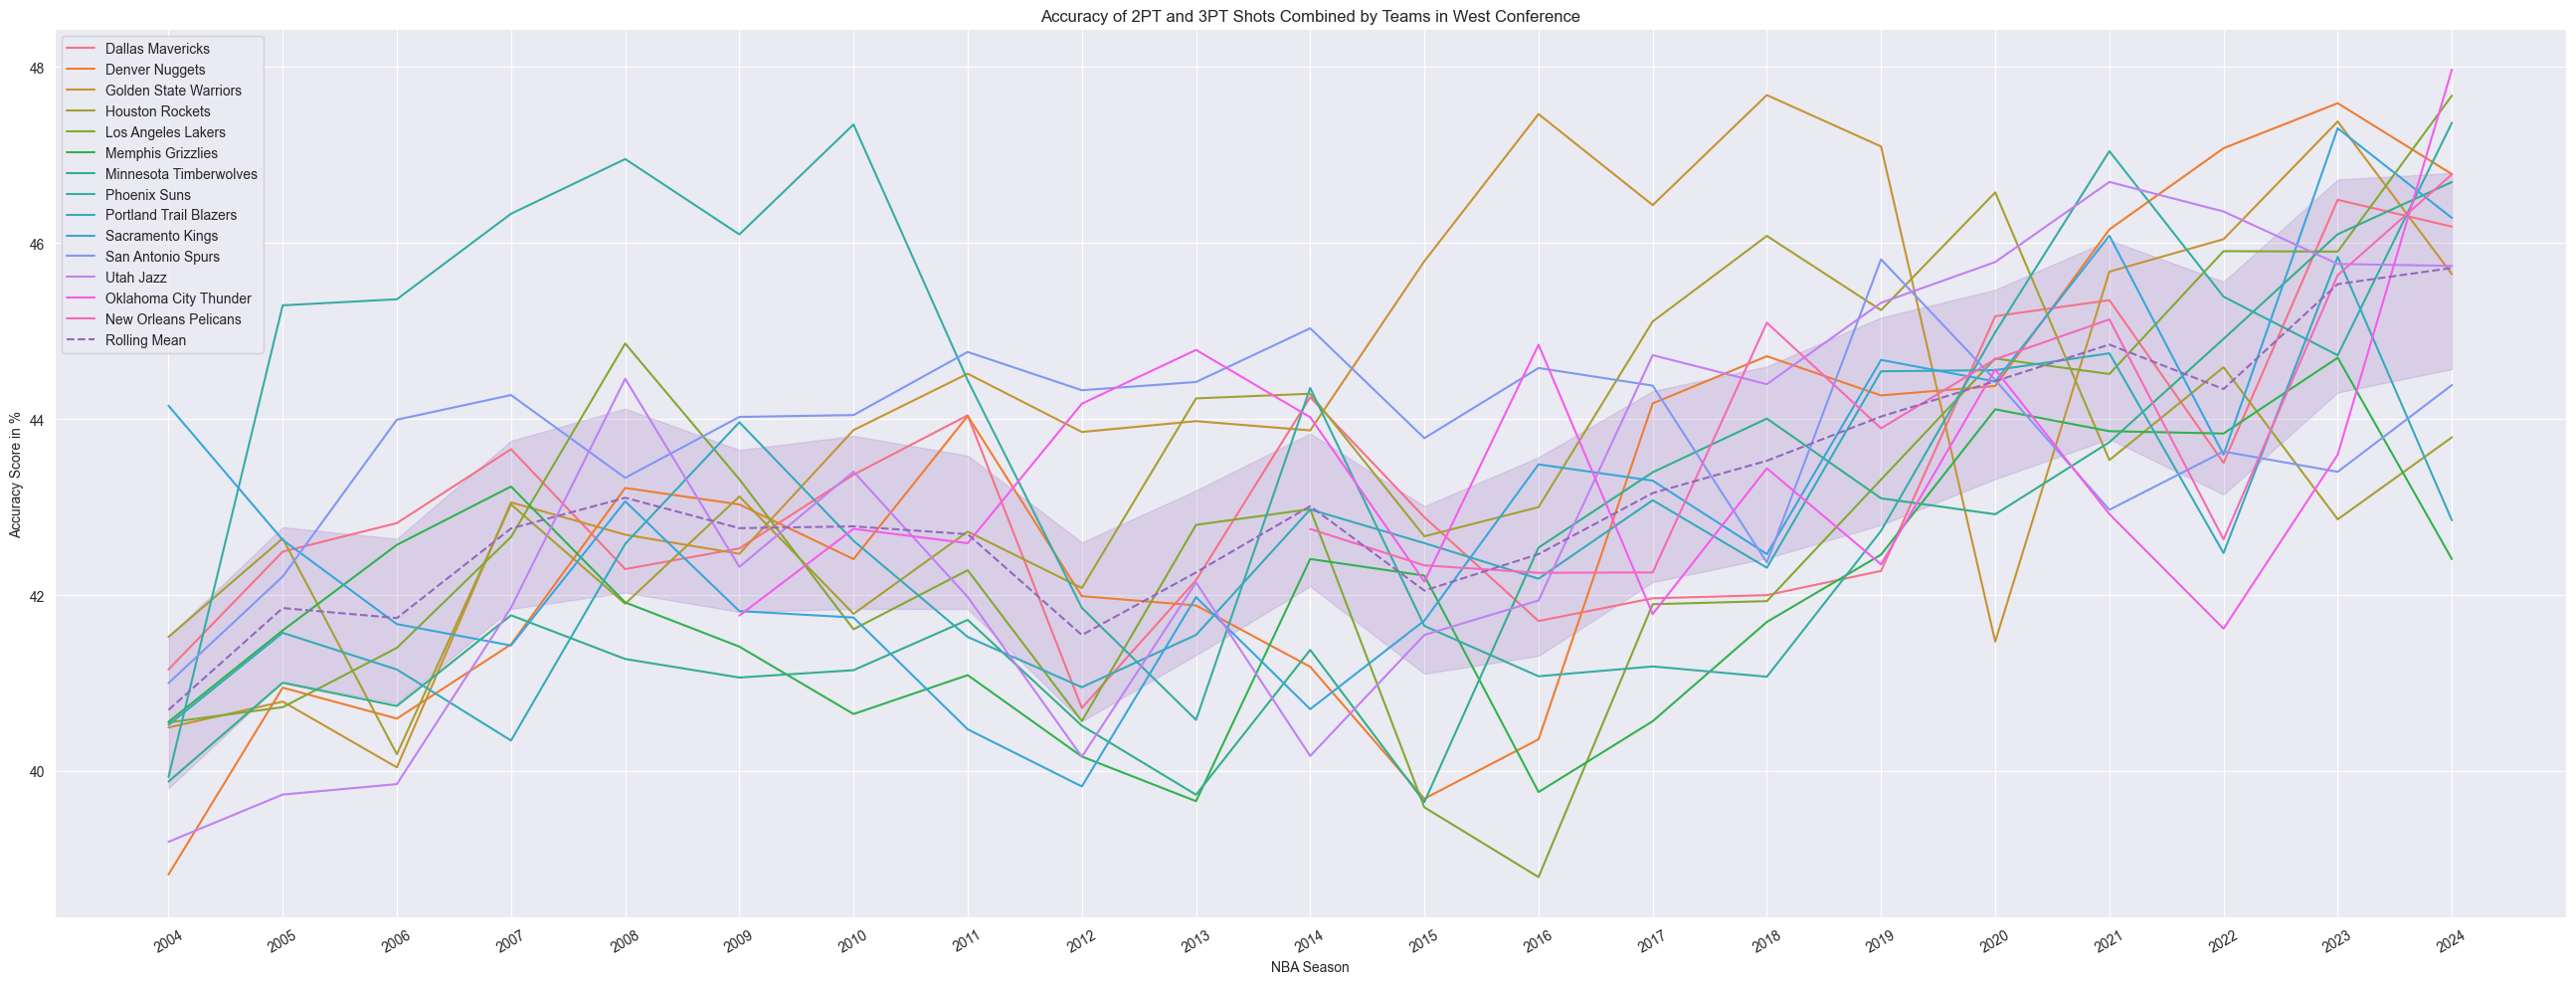

In [ ]:
# Set the figure size for the first plot
plt.figure(figsize=(25, 6))

# Create a boxplot showing the distribution of shot accuracy for each season, 
# grouped by conference (West/East) with different colors for each conference.
sns.boxplot(data=shot_type_df, x="season", y="accuracy", hue="conference", gap=.1)

# Create a new figure for the next plot
plt.figure(figsize=(25, 6))

# Plot the rolling mean of shot accuracy over seasons. This helps show trends more clearly.
sns.lineplot(data=rolling_mean, x="season", y="rolling_mean", style=None, linestyle='--',
             markers=False, label="Rolling Mean")

# Plot the accuracy of shots for all teams in both the West and East conferences over seasons.
# The data is shown as a line plot with separate lines for each conference.
sns.lineplot(data=shot_type_df, x="season", y="accuracy", hue="conference", style=None, linestyle='-', markers=False,
             errorbar=None)

# Add a legend with the title "Conference Accuracy %" to indicate which conference the data represents.
plt.legend(title="Conference Accuracy %")

# Set the title and labels for the plot to make it clear what is being visualized.
plt.title("Accuracy of 2PT and 3PT Shots Combined West vs. East Conference")
plt.ylabel("Accuracy Score in %")
plt.xlabel("NBA Season")

# Rotate x-axis labels for better readability.
plt.xticks(rotation=30)

# Set the x-ticks to the unique seasons available in the data.
plt.gca().set_xticks(shot_type_df['season'].unique())

# Set the labels for the x-ticks to show the seasons in a sorted order.
plt.gca().set_xticklabels(sorted(shot_type_df['season'].unique()))

# Create a new figure for the East conference analysis.
plt.figure(figsize=(26, 10))

# Plot the accuracy of shots for each team in the East conference over seasons.
sns.lineplot(data=shot_type_df[shot_type_df["conference"] == "East"], x="season", y="accuracy", hue="TEAM_NAME",
             style=None, linestyle='-', markers=False, errorbar=None)

# Add a legend with team names, positioned to the upper left with a bounding box to the right of the plot.
plt.legend(loc='upper left', title="Team Name", bbox_to_anchor=(1, 1))

# Set the title and labels for the East conference plot.
plt.title("Accuracy of 2PT and 3PT Shots Combined by Teams in East Conference")
plt.ylabel("Accuracy Score in %")
plt.xlabel("NBA Season")

# Rotate x-axis labels for better readability.
plt.xticks(rotation=30)

# Set the x-ticks to the unique seasons available in the data.
plt.gca().set_xticks(shot_type_df['season'].unique())

# Set the labels for the x-ticks to show the seasons in a sorted order.
plt.gca().set_xticklabels(sorted(shot_type_df['season'].unique()))

# Plot the rolling mean for the East conference to show trends in shot accuracy.
sns.lineplot(data=rolling_mean[rolling_mean["conference"] == "East"], x="season", y="rolling_mean", style=None,
             linestyle='--', markers=False, label="Rolling Mean")

# Create a new figure for the West conference analysis.
plt.figure(figsize=(26, 10))

# Plot the accuracy of shots for each team in the West conference over seasons.
sns.lineplot(data=shot_type_df[shot_type_df["conference"] == "West"], x="season", y="accuracy", hue="TEAM_NAME",
             style=None, linestyle='-', markers=False, errorbar=None)

# Add a legend with team names, positioned to the upper left with a bounding box to the right of the plot.
plt.legend(loc='upper left', title="Team Name", bbox_to_anchor=(1, 1))

# Set the title and labels for the West conference plot.
plt.title("Accuracy of 2PT and 3PT Shots Combined by Teams in West Conference")
plt.ylabel("Accuracy Score in %")
plt.xlabel("NBA Season")

# Rotate x-axis labels for better readability.
plt.xticks(rotation=30)

# Set the x-ticks to the unique seasons available in the data.
plt.gca().set_xticks(shot_type_df['season'].unique())

# Set the labels for the x-ticks to show the seasons in a sorted order.
plt.gca().set_xticklabels(sorted(shot_type_df['season'].unique()))

# Plot the rolling mean for the West conference to show trends in shot accuracy.
sns.lineplot(data=rolling_mean[rolling_mean["conference"] == "West"], x="season", y="rolling_mean", style=None,
             linestyle='--', markers=False, label="Rolling Mean")

# Adjust the layout to ensure the plots do not overlap and are well-placed.
plt.tight_layout()

# Display all the plots created.
plt.show()

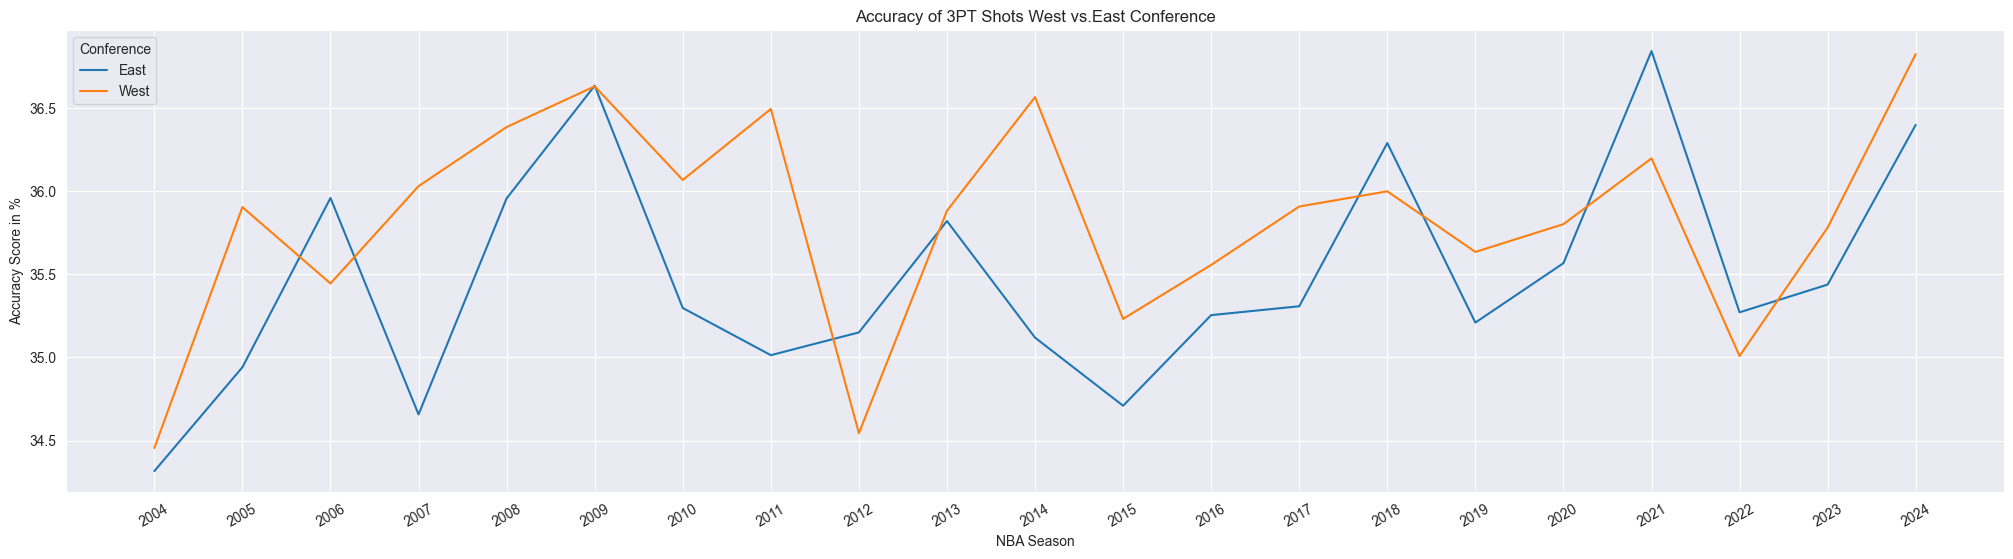

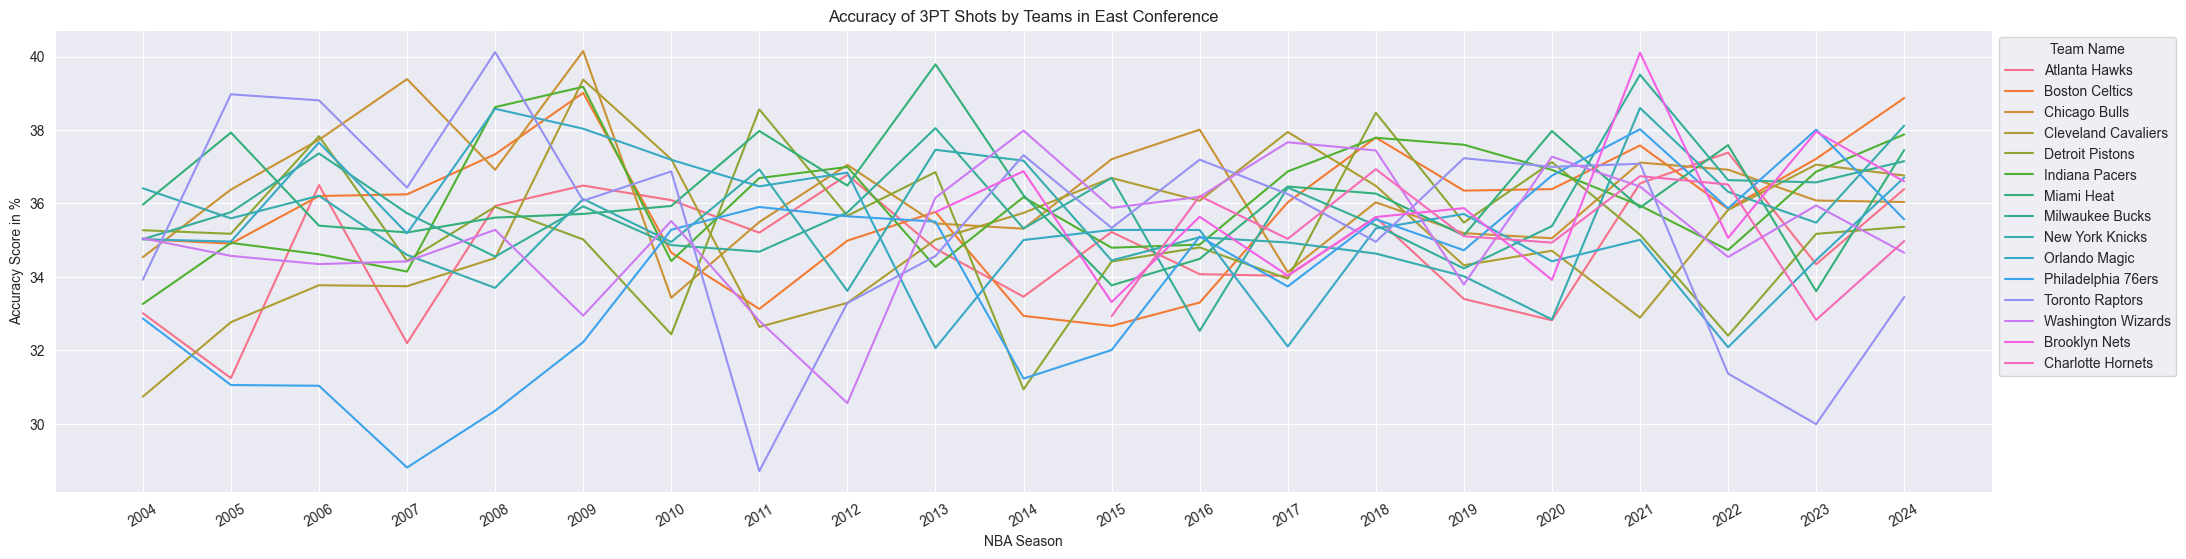

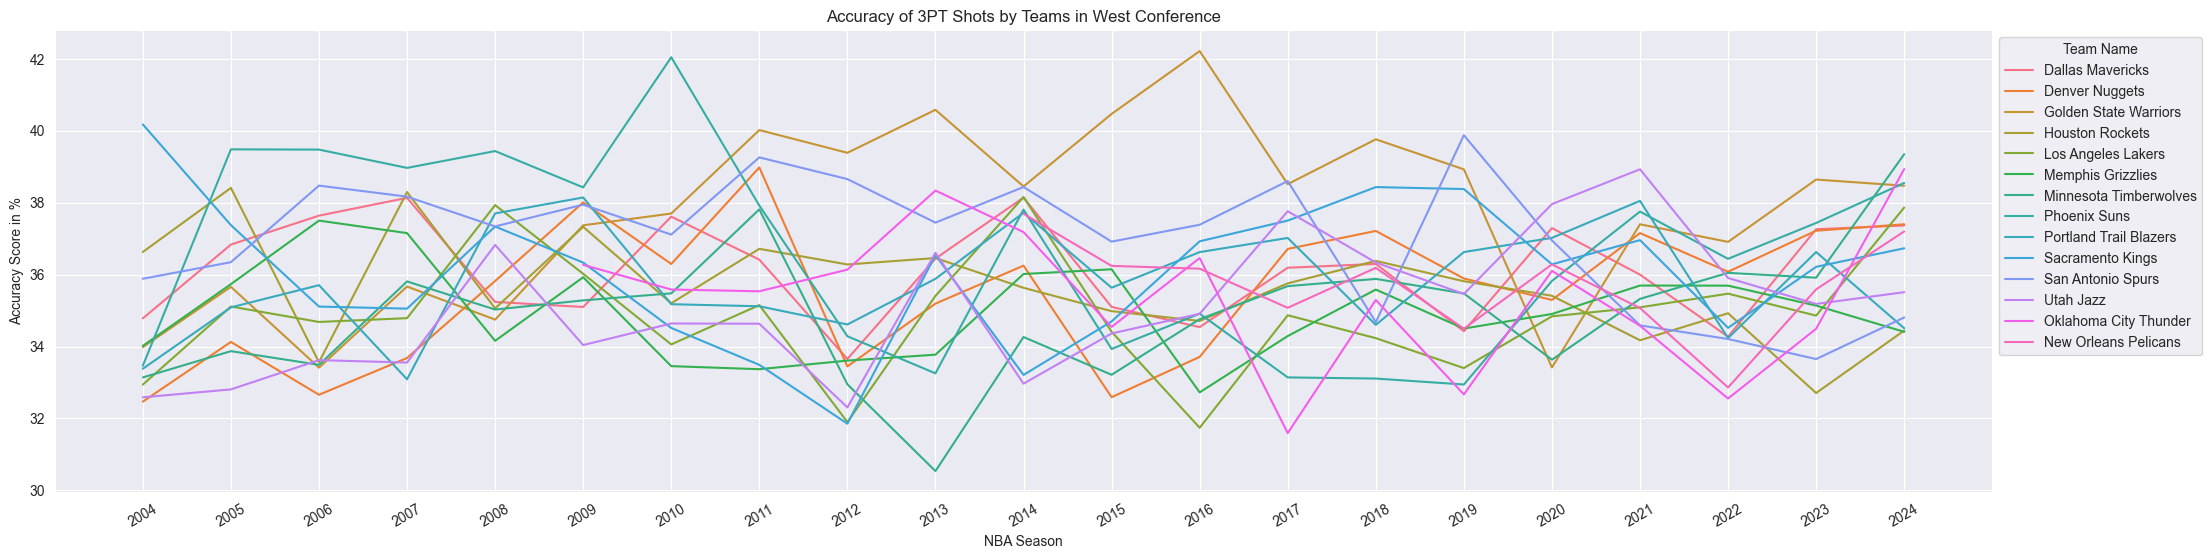

In [ ]:
# Create a figure for the overall accuracy of 3-point shots across seasons for both conferences.
plt.figure(figsize=(25, 6))

# Plot the accuracy of 3-point shots over seasons, differentiating between West and East conferences.
# The `hue` parameter is used to color the lines by conference.
sns.lineplot(data=shot_type_df[shot_type_df["IS_3PT"] == 1], x="season", y="accuracy",
             hue="conference", style=None, linestyle='-', markers=False, errorbar=None)

# Add a legend to indicate which line corresponds to each conference.
plt.legend(title="Conference")

# Set the title and axis labels for the plot to clarify what is being visualized.
plt.title("Accuracy of 3PT Shots West vs. East Conference")
plt.ylabel("Accuracy Score in %")
plt.xlabel("NBA Season")

# Rotate the x-axis labels for better readability.
plt.xticks(rotation=30)

# Set the x-ticks to match the unique seasons in the dataset.
plt.gca().set_xticks(shot_type_df['season'].unique())

# Label the x-ticks with the sorted unique season values.
plt.gca().set_xticklabels(sorted(shot_type_df['season'].unique()))

# Create a new figure for the accuracy of 3-point shots by teams in the East Conference.
plt.figure(figsize=(25, 6))

# Plot the accuracy of 3-point shots for each team in the East Conference over seasons.
# The `hue` parameter groups the data by team name, coloring each line differently.
sns.lineplot(
    data=shot_type_df[(shot_type_df["conference"] == "East") & (shot_type_df["IS_3PT"] == 1)],
    x="season", y="accuracy", hue="TEAM_NAME", style=None, linestyle='-', markers=False, errorbar=None)

# Add a legend with team names, positioned to the upper left of the plot.
plt.legend(loc='upper left', title="Team Name", bbox_to_anchor=(1, 1))

# Set the title and axis labels for the East Conference plot.
plt.title("Accuracy of 3PT Shots by Teams in East Conference")
plt.ylabel("Accuracy Score in %")
plt.xlabel("NBA Season")

# Rotate the x-axis labels for better readability.
plt.xticks(rotation=30)

# Set the x-ticks to match the unique seasons in the dataset.
plt.gca().set_xticks(shot_type_df['season'].unique())

# Label the x-ticks with the sorted unique season values.
plt.gca().set_xticklabels(sorted(shot_type_df['season'].unique()))

# Create a new figure for the accuracy of 3-point shots by teams in the West Conference.
plt.figure(figsize=(25, 6))

# Plot the accuracy of 3-point shots for each team in the West Conference over seasons.
sns.lineplot(
    data=shot_type_df[(shot_type_df["conference"] == "West") & (shot_type_df["IS_3PT"] == 1)],
    x="season", y="accuracy", hue="TEAM_NAME", style=None, linestyle='-', markers=False, errorbar=None)

# Add a legend with team names, positioned to the upper left of the plot.
plt.legend(loc='upper left', title="Team Name", bbox_to_anchor=(1, 1))

# Set the title and axis labels for the West Conference plot.
plt.title("Accuracy of 3PT Shots by Teams in West Conference")
plt.ylabel("Accuracy Score in %")
plt.xlabel("NBA Season")

# Rotate the x-axis labels for better readability.
plt.xticks(rotation=30)

# Set the x-ticks to match the unique seasons in the dataset.
plt.gca().set_xticks(shot_type_df['season'].unique())

# Label the x-ticks with the sorted unique season values.
plt.gca().set_xticklabels(sorted(shot_type_df['season'].unique()))

# Display all the plots created.
plt.show()

[Text(2004, 0, '2004'),
 Text(2005, 0, '2005'),
 Text(2006, 0, '2006'),
 Text(2007, 0, '2007'),
 Text(2008, 0, '2008'),
 Text(2009, 0, '2009'),
 Text(2010, 0, '2010'),
 Text(2011, 0, '2011'),
 Text(2012, 0, '2012'),
 Text(2013, 0, '2013'),
 Text(2014, 0, '2014'),
 Text(2015, 0, '2015'),
 Text(2016, 0, '2016'),
 Text(2017, 0, '2017'),
 Text(2018, 0, '2018'),
 Text(2019, 0, '2019'),
 Text(2020, 0, '2020'),
 Text(2021, 0, '2021'),
 Text(2022, 0, '2022'),
 Text(2023, 0, '2023'),
 Text(2024, 0, '2024')]

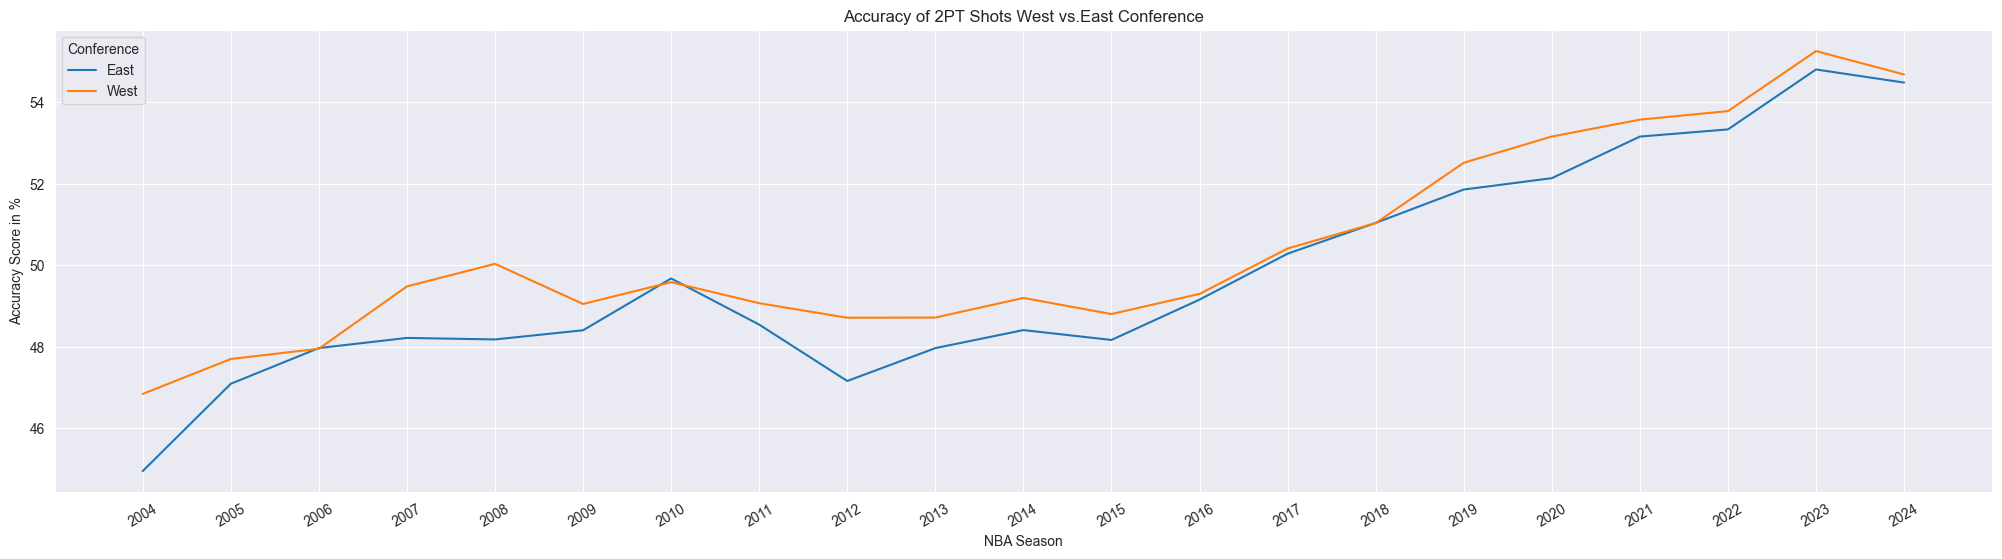

In [ ]:
# Create a figure with a specified size for plotting the accuracy of 2-point shots.
plt.figure(figsize=(25, 6))

# Plot the accuracy of 2-point shots across seasons, differentiating between West and East conferences.
# The `hue` parameter colors the lines based on the conference, allowing for a visual comparison between them.
sns.lineplot(data=shot_type_df[shot_type_df["IS_3PT"] == 0], x="season", y="accuracy",
             hue="conference", style=None, linestyle='-', markers=False, errorbar=None)

# Add a legend to the plot to show which color corresponds to which conference.
plt.legend(title="Conference")

# Set the title of the plot to describe the content.
plt.title("Accuracy of 2PT Shots West vs. East Conference")

# Label the y-axis to indicate the accuracy score in percentage.
plt.ylabel("Accuracy Score in %")

# Label the x-axis to indicate the NBA season.
plt.xlabel("NBA Season")

# Rotate the x-axis labels for better visibility and readability.
plt.xticks(rotation=30)

# Set the x-ticks to match the unique season values present in the dataset.
plt.gca().set_xticks(shot_type_df['season'].unique())

# Label the x-ticks with the sorted unique season values to ensure they are in chronological order.
plt.gca().set_xticklabels(sorted(shot_type_df['season'].unique()))

In [37]:
df_shots_clean.head()

SEASON_1 SEASON_2     TEAM_ID           TEAM_NAME  PLAYER_ID  PLAYER_NAME  \
0      2004  2003-04  1610612747  Los Angeles Lakers        977  Kobe Bryant   
1      2004  2003-04  1610612747  Los Angeles Lakers        977  Kobe Bryant   
2      2004  2003-04  1610612747  Los Angeles Lakers        977  Kobe Bryant   
3      2004  2003-04  1610612747  Los Angeles Lakers        977  Kobe Bryant   
4      2004  2003-04  1610612747  Los Angeles Lakers        977  Kobe Bryant   

  POSITION_GROUP POSITION   GAME_DATE   GAME_ID  ... LOC_X  LOC_Y  \
0              G       SG  04-14-2004  20301187  ...  20.0  21.35   
1              G       SG  04-14-2004  20301187  ...  13.3  24.45   
2              G       SG  04-14-2004  20301187  ...  -1.5  29.95   
3              G       SG  04-14-2004  20301187  ... -14.6  16.75   
4              G       SG  04-14-2004  20301187  ...  -0.0   5.25   

  SHOT_DISTANCE  QUARTER MINS_LEFT  SECS_LEFT TEAM_CONFERENCE  \
0            25        6         0          0            West   
1            23        6         0          9            West   
2            24        6         1         42            West   
3            18        6         2         27            West   
4             0        6         3         31            West   

  TEAM_ABBREVIATION rosterstatus is_home  
0               LAL            0       0  
1               LAL            0       0  
2               LAL            0       0  
3               LAL            0       0  
4               LAL            0       0  

[5 rows x 30 columns]

# Predictive Models
- Predict

In [ ]:
# The following query calculates various performance metrics for NBA players, focusing on shot attempts, 
# shooting accuracy, and points scored per game over the 2004-2024 seasons. It filters for players who 
# have played in more than 5 games and are active.
query = '''
WITH PlayersShotsStats AS (
    SELECT 
        PLAYER_NAME,  -- Name of the player
        SEASON_1,  -- Season year
        GAME_ID,  -- Game identifier
        POSITION,  -- Player position
        POSITION_GROUP,  -- Group of the position (e.g., guards, forwards, centers)
        rosterstatus,  -- Player's roster status (active/inactive)
        IS_HOME,  -- Indicates if the game was at home (1 for home, 0 for away)
        SUM(CASE 
            WHEN IS_3PT = 0 AND SHOT_MADE = True THEN 2  -- 2-point shot made
            WHEN IS_3PT = 1 AND SHOT_MADE = True THEN 3  -- 3-point shot made
            ELSE 0 
        END) AS PTS,  -- Points scored by each player
        COUNT(SHOT_MADE) AS FGA,  -- Total field goal attempts
        SUM(CASE WHEN SHOT_MADE = True THEN 1 ELSE 0 END) AS FGM,  -- Field goals made
        SUM(CASE WHEN IS_3PT = 1 THEN 1 ELSE 0 END) AS threePA,  -- 3-point attempts
        SUM(CASE WHEN IS_3PT = 0 THEN 1 ELSE 0 END) AS twoPA,  -- 2-point attempts
        SUM(CASE WHEN IS_3PT = 1 AND SHOT_MADE = True THEN 1 ELSE 0 END) AS threePM,  -- 3-point shots made
        SUM(CASE WHEN IS_3PT = 0 AND SHOT_MADE = True THEN 1 ELSE 0 END) AS twoPM,  -- 2-point shots made
        AVG(SHOT_DISTANCE) AS avgShotDist,  -- Average shot distance
        PLAYER_ID  -- Unique identifier for the player
    FROM nba
    GROUP BY PLAYER_NAME, SEASON_1, GAME_ID  -- Grouping by player, season, and game
),
-- Create a second temporary table 'metrics' to calculate various shooting efficiency metrics.
metrics AS (
    SELECT 
        PLAYER_NAME,
        POSITION,
        POSITION_GROUP,
        SEASON_1,
        GAME_ID,
        rosterstatus,
        IS_HOME,
        PTS,
        FGA,
        FGM,
        threePA,
        threePM,
        twoPA,
        twoPM,
        avgShotDist,
        CASE WHEN FGA > 0 THEN CAST(FGM AS FLOAT) / FGA ELSE 0 END AS FG_Percentage,  -- Field Goal Percentage (FG%)
        CASE WHEN threePA > 0 THEN CAST(threePM AS FLOAT) / threePA * 100 ELSE 0 END AS threePM_Percentage,  -- Three-Point Percentage (3P%)
        CASE WHEN twoPA > 0 THEN CAST(twoPM AS FLOAT) / twoPA * 100 ELSE 0 END AS twoPM_Percentage,  -- Two-Point Percentage (2P%)
        CASE WHEN FGA > 0 THEN (CAST(FGM AS FLOAT) + 0.5 * threePM) / FGA * 100 ELSE 0 END AS eFG_Percentage,  -- Effective Field Goal Percentage (eFG%)
        CASE WHEN FGA > 0 THEN CAST(PTS AS FLOAT) / FGA ELSE 0 END AS PTS_per_Shot,  -- Points Per Shot Attempt
        PLAYER_ID
    FROM PlayersShotsStats  -- Source table
)
-- Select final results from the 'metrics' table with additional filters.
SELECT *
FROM metrics m
WHERE PLAYER_NAME IN (
    SELECT PLAYER_NAME
    FROM PlayersShotsStats
    GROUP BY PLAYER_NAME
    HAVING COUNT(DISTINCT GAME_ID) > 5  -- Condition for minimum number of games played
)
AND rosterstatus = 1  -- Only include active players
ORDER BY m.SEASON_1, m.GAME_ID;  -- Order results by season and game ID
'''
# Players KPI's over 2004-2024 seasons
players_stats = pd.read_sql(query, conn)
players_stats

PLAYER_NAME POSITION POSITION_GROUP  SEASON_1   GAME_ID  \
0         Udonis Haslem       PF              F      2004  20300001   
1         Udonis Haslem       PF              F      2004  20300004   
2          LeBron James       SG              G      2004  20300014   
3          LeBron James       SG              G      2004  20300018   
4         Udonis Haslem       PF              F      2004  20300020   
...                 ...      ...            ...       ...       ...   
141346     LeBron James       PF              F      2024  22301230   
141347    Naji Marshall       SF              F      2024  22301230   
141348    Rui Hachimura       PF              F      2024  22301230   
141349  Trey Murphy III       SF              F      2024  22301230   
141350  Zion Williamson       PF              F      2024  22301230   

        rosterstatus  IS_HOME  PTS  FGA  FGM  ...  threePM  twoPA  twoPM  \
0                  1        0    2    5    1  ...        0      5      1   
1                  1        0    6    4    3  ...        0      4      3   
2                  1        0   24   20   12  ...        0     18     12   
3                  1        0   17   17    8  ...        1     12      7   
4                  1        1   12   12    6  ...        0     12      6   
...              ...      ...  ...  ...  ...  ...      ...    ...    ...   
141346             1        1   22   12    9  ...        4      8      5   
141347             1        0    3    2    1  ...        1      1      0   
141348             1        1   11    9    5  ...        1      6      4   
141349             1        0   12   13    5  ...        2      6      3   
141350             1        0   12    8    6  ...        0      8      6   

        avgShotDist  FG_Percentage  threePM_Percentage  twoPM_Percentage  \
0          5.000000       0.200000            0.000000         20.000000   
1          6.000000       0.750000            0.000000         75.000000   
2         12.500000       0.600000            0.000000         66.666667   
3         13.117647       0.470588           20.000000         58.333333   
4          1.833333       0.500000            0.000000         50.000000   
...             ...            ...                 ...               ...   
141346    12.666667       0.750000          100.000000         62.500000   
141347    11.500000       0.500000          100.000000          0.000000   
141348    12.777778       0.555556           33.333333         66.666667   
141349    15.461538       0.384615           28.571429         50.000000   
141350     4.125000       0.750000            0.000000         75.000000   

        eFG_Percentage  PTS_per_Shot  PLAYER_ID  
0            20.000000      0.400000       2617  
1            75.000000      1.500000       2617  
2            60.000000      1.200000       2544  
3            50.000000      1.000000       2544  
4            50.000000      1.000000       2617  
...                ...           ...        ...  
141346       91.666667      1.833333       2544  
141347       75.000000      1.500000    1630230  
141348       61.111111      1.222222    1629060  
141349       46.153846      0.923077    1630530  
141350       75.000000      1.500000    1629627  

[141351 rows x 21 columns]

In [ ]:
# Merge the 'players_stats' DataFrame with 'df_active_players' DataFrame on the 'PLAYER_ID' column.
# The 'df_active_players' DataFrame is used to add the 'age' column to the 'players_stats' DataFrame.
# This allows each player in 'players_stats' to be associated with their age from 'df_active_players'.
players_stats = pd.merge(left=players_stats, right=df_active_players[["PLAYER_ID", "age"]], on="PLAYER_ID")
players_stats.head(2)

PLAYER_NAME POSITION POSITION_GROUP  SEASON_1   GAME_ID  rosterstatus  \
0  Udonis Haslem       PF              F      2004  20300001             1   
1  Udonis Haslem       PF              F      2004  20300004             1   

   IS_HOME  PTS  FGA  FGM  ...  twoPA  twoPM  avgShotDist  FG_Percentage  \
0        0    2    5    1  ...      5      1          5.0           0.20   
1        0    6    4    3  ...      4      3          6.0           0.75   

   threePM_Percentage  twoPM_Percentage  eFG_Percentage  PTS_per_Shot  \
0                 0.0              20.0            20.0           0.4   
1                 0.0              75.0            75.0           1.5   

   PLAYER_ID  age  
0       2617   43  
1       2617   43  

[2 rows x 22 columns]

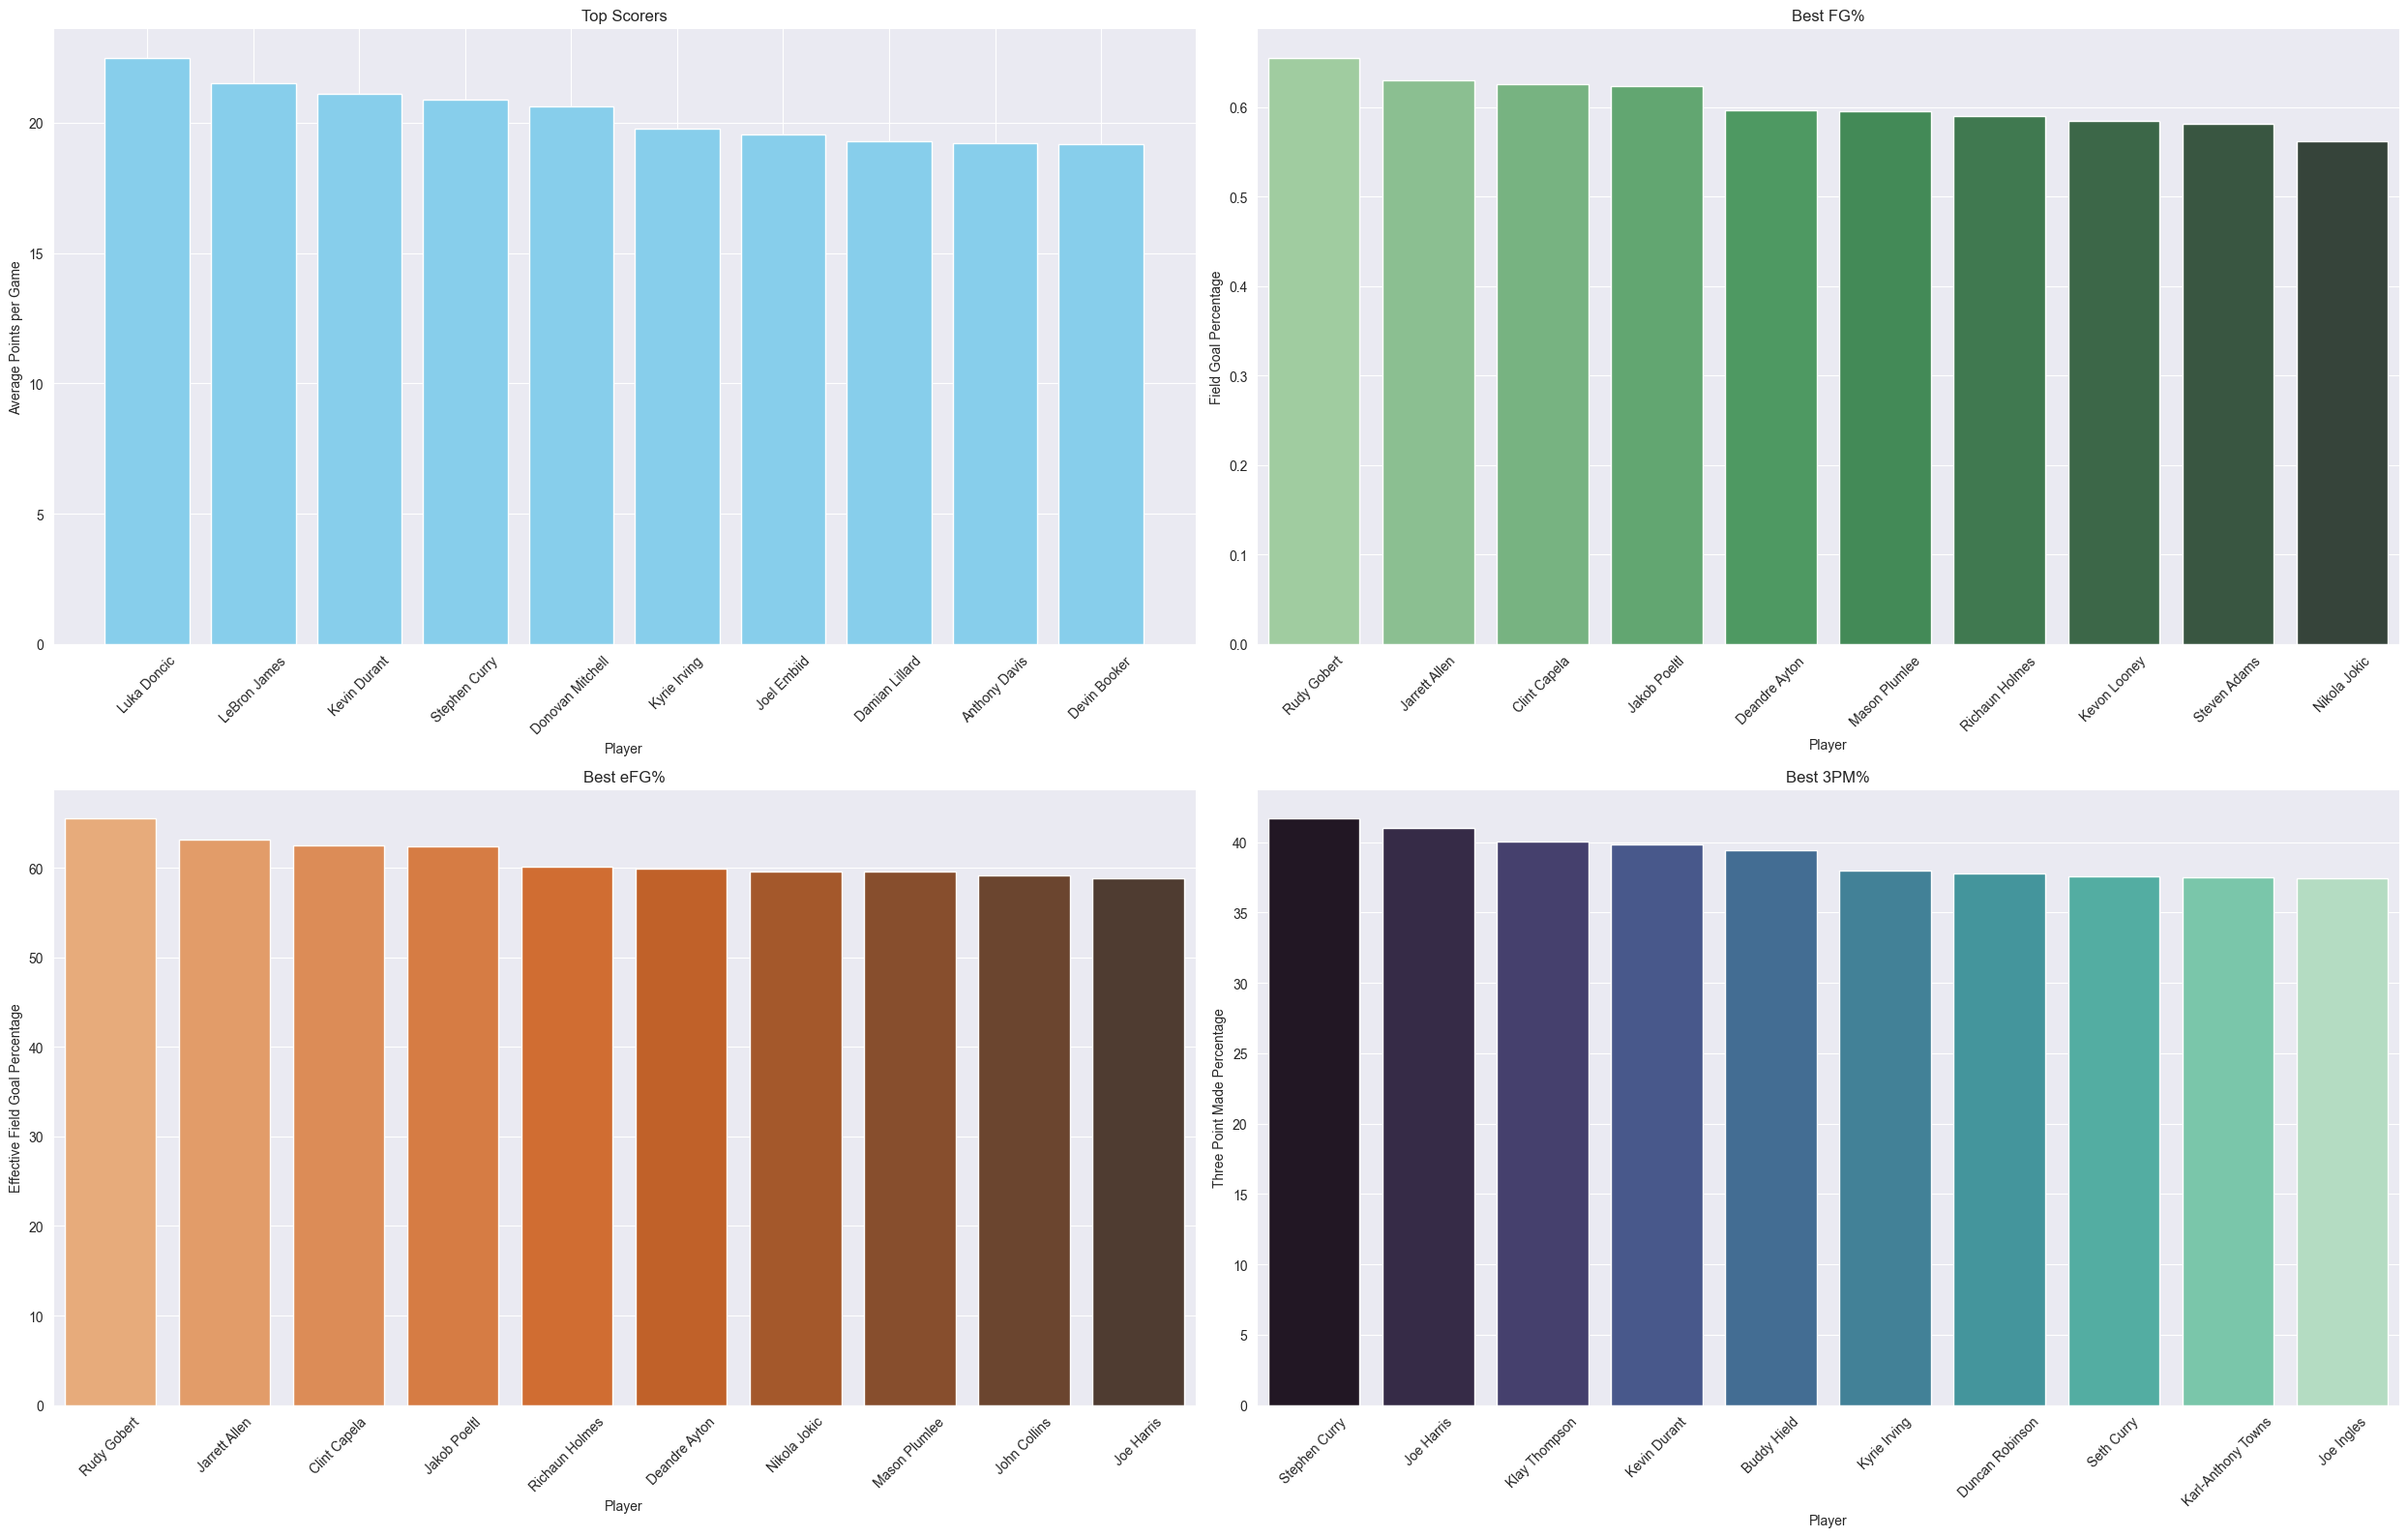

In [ ]:
# Calculate the average statistics for each player and count their number of games played.
players_stats_avg = players_stats.groupby('PLAYER_NAME').agg({
    'PTS': 'mean',  # Calculate the average points per game for each player.
    'FG_Percentage': 'mean',  # Calculate the average field goal percentage for each player.
    'eFG_Percentage': 'mean',  # Calculate the average effective field goal percentage for each player.
    'threePM_Percentage': 'mean',  # Calculate the average three-point percentage for each player.
    'GAME_ID': 'count'  # Count the number of games played by each player.
}).reset_index()

# Calculate the average number of games played across all players.
avg_game_played = players_stats_avg['GAME_ID'].mean()

# Filter the players who have played more games than the average.
players_stats_avg = players_stats_avg[players_stats_avg['GAME_ID'] > avg_game_played]

# Sort the players by average points and select the top 10.
top_pts = players_stats_avg.sort_values('PTS', ascending=False).head(10)

# Sort the players by field goal percentage and select the top 10.
top_fg = players_stats_avg.sort_values('FG_Percentage', ascending=False).head(10)

# Sort the players by effective field goal percentage and select the top 10.
top_efg = players_stats_avg.sort_values('eFG_Percentage', ascending=False).head(10)

# Sort the players by three-point percentage and select the top 10.
top_3pm = players_stats_avg.sort_values('threePM_Percentage', ascending=False).head(10)

# Create a large figure for the four subplots.
plt.figure(figsize=(25, 16))

# Plot the bar chart for the top 10 scorers.
plt.subplot(2, 2, 1)  # Define the subplot position (2 rows, 2 columns, first plot).
plt.bar(top_pts['PLAYER_NAME'], top_pts['PTS'], color='skyblue')
plt.title('Top Scorers')  # Title of the subplot.
plt.xlabel('Player')  # Label for the x-axis.
plt.ylabel('Average Points per Game')  # Label for the y-axis.
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability.

# Plot the bar chart for the top 10 players with the best field goal percentages.
plt.subplot(2, 2, 2)  # Define the subplot position (2 rows, 2 columns, second plot).
sns.barplot(x='PLAYER_NAME', y='FG_Percentage', data=top_fg, palette='Greens_d')
plt.title('Best FG%')  # Title of the subplot.
plt.xlabel('Player')  # Label for the x-axis.
plt.ylabel('Field Goal Percentage')  # Label for the y-axis.
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability.

# Plot the bar chart for the top 10 players with the best effective field goal percentages.
plt.subplot(2, 2, 3)  # Define the subplot position (2 rows, 2 columns, third plot).
sns.barplot(x='PLAYER_NAME', y='eFG_Percentage', data=top_efg, palette='Oranges_d')
plt.title('Best eFG%')  # Title of the subplot.
plt.xlabel('Player')  # Label for the x-axis.
plt.ylabel('Effective Field Goal Percentage')  # Label for the y-axis.
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability.

# Plot the bar chart for the top 10 players with the best three-point made percentages.
plt.subplot(2, 2, 4)  # Define the subplot position (2 rows, 2 columns, fourth plot).
sns.barplot(x='PLAYER_NAME', y='threePM_Percentage', data=top_3pm, palette='mako')
plt.title('Best 3PM%')  # Title of the subplot.
plt.xlabel('Player')  # Label for the x-axis.
plt.ylabel('Three Point Made Percentage')  # Label for the y-axis.
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability.

# Adjust the spacing between subplots for a clean layout.
plt.tight_layout()

# Display the plots.
plt.show()

In [ ]:
# Create a copy of players_stats for modeling and analysis.
players_stats_model1 = players_stats

# List of different 'k' values representing the last 'k' games for which we want to calculate rolling averages.
rolling_games = list(range(4, 11))

# Function to calculate rolling averages for the specified number of last 'k' games.
def calc_rolling_games(k):
    # Print the current value of k to monitor the progress of the function.
    print(k)

    # Calculate the rolling average for field goal percentage over the last 'k' games for each player.
    players_stats_model1[f'FG%_rolling_{k}_games'] = players_stats_model1.groupby('PLAYER_NAME')['FG_Percentage'].transform(
        lambda x: x.rolling(window=k, min_periods=1).mean())

    # Calculate the rolling average for three-point percentage over the last 'k' games for each player.
    players_stats_model1[f'threePM%_rolling_{k}_games'] = players_stats_model1.groupby('PLAYER_NAME')['threePM_Percentage'].transform(
        lambda x: x.rolling(window=k, min_periods=1).mean())

    # Calculate the rolling average for two-point percentage over the last 'k' games for each player.
    players_stats_model1[f'twoPM%_rolling_{k}_games'] = players_stats_model1.groupby('PLAYER_NAME')['twoPM_Percentage'].transform(
        lambda x: x.rolling(window=k, min_periods=1).mean())

    # Calculate the rolling average for effective field goal percentage over the last 'k' games for each player.
    players_stats_model1[f'eFG%_rolling_{k}_games'] = players_stats_model1.groupby('PLAYER_NAME')['eFG_Percentage'].transform(
        lambda x: x.rolling(window=k, min_periods=1).mean())

    # Calculate the rolling average for points per shot over the last 'k' games for each player.
    players_stats_model1[f'PTS_per_shot_rolling_{k}_games'] = players_stats_model1.groupby('PLAYER_NAME')['PTS_per_Shot'].transform(
        lambda x: x.rolling(window=k, min_periods=1).mean())

# Loop through each 'k' value in the rolling_games list and apply the function.
for k in rolling_games:
    calc_rolling_games(k)

4
5
6
7
8
9
10


In [ ]:
# List of different 'j' values representing the last 'j' seasons for which we want to calculate rolling averages.
rolling_seasons = list(range(2, 5))

# Function to calculate rolling averages over the last 'j' seasons.
def calc_rolling_seasons(j):
    # Print the current value of j to monitor the progress of the function.
    print(j)

    # Calculate the rolling average for field goal percentage over the last 'j' seasons for each player.
    players_stats_model1[f'FG%_rolling_{j}_seasons'] = players_stats_model1.groupby(["PLAYER_NAME", "SEASON_1"])['FG_Percentage'].transform(
        lambda x: x.rolling(window=j, min_periods=1).mean())

    # Calculate the rolling average for three-point percentage over the last 'j' seasons for each player.
    players_stats_model1[f'threePM%_rolling_{j}_seasons'] = players_stats_model1.groupby(["PLAYER_NAME", "SEASON_1"])['threePM_Percentage'].transform(
        lambda x: x.rolling(window=j, min_periods=1).mean())

    # Calculate the rolling average for two-point percentage over the last 'j' seasons for each player.
    players_stats_model1[f'twoPM%_rolling_{j}_seasons'] = players_stats_model1.groupby(["PLAYER_NAME", "SEASON_1"])['twoPM_Percentage'].transform(
        lambda x: x.rolling(window=j, min_periods=1).mean())

    # Calculate the rolling average for effective field goal percentage over the last 'j' seasons for each player.
    players_stats_model1[f'eFG%_rolling_{j}_seasons'] = players_stats_model1.groupby(["PLAYER_NAME", "SEASON_1"])['eFG_Percentage'].transform(
        lambda x: x.rolling(window=j, min_periods=1).mean())

    # Calculate the rolling average for points per shot over the last 'j' seasons for each player.
    players_stats_model1[f'PTS_per_shot_rolling_{j}_seasons'] = players_stats_model1.groupby(["PLAYER_NAME", "SEASON_1"])['PTS_per_Shot'].transform(
        lambda x: x.rolling(window=j, min_periods=1).mean())

# Loop through each 'j' value in the rolling_seasons list and apply the function.
for j in rolling_seasons:
    calc_rolling_seasons(j)

2
3
4


In [ ]:
# Drop unnecessary columns from the players_stats_model1 DataFrame
players_stats_model1 = players_stats_model1.drop(
    columns=["POSITION", "POSITION_GROUP", "PLAYER_NAME", "SEASON_1", "IS_HOME", "PTS", "FGA", "FGM", "threePA",
             "threePM", "twoPA", "twoPM"])
players_stats_model1.head()

GAME_ID  rosterstatus  avgShotDist  FG_Percentage  threePM_Percentage  \
0  20300001             1     5.000000       0.200000                 0.0   
1  20300004             1     6.000000       0.750000                 0.0   
2  20300020             1     1.833333       0.500000                 0.0   
3  20300045             1     7.000000       0.666667                 0.0   
4  20300051             1     8.714286       0.428571                 0.0   

   twoPM_Percentage  eFG_Percentage  PTS_per_Shot  PLAYER_ID  age  ...  \
0         20.000000       20.000000      0.400000       2617   43  ...   
1         75.000000       75.000000      1.500000       2617   43  ...   
2         50.000000       50.000000      1.000000       2617   43  ...   
3         66.666667       66.666667      1.333333       2617   43  ...   
4         42.857143       42.857143      0.857143       2617   43  ...   

   FG%_rolling_3_seasons  threePM%_rolling_3_seasons  \
0               0.200000                         0.0   
1               0.475000                         0.0   
2               0.483333                         0.0   
3               0.638889                         0.0   
4               0.531746                         0.0   

   twoPM%_rolling_3_seasons  eFG%_rolling_3_seasons  \
0                 20.000000               20.000000   
1                 47.500000               47.500000   
2                 48.333333               48.333333   
3                 63.888889               63.888889   
4                 53.174603               53.174603   

   PTS_per_shot_rolling_3_seasons  FG%_rolling_4_seasons  \
0                        0.400000               0.200000   
1                        0.950000               0.475000   
2                        0.966667               0.483333   
3                        1.277778               0.529167   
4                        1.063492               0.586310   

   threePM%_rolling_4_seasons  twoPM%_rolling_4_seasons  \
0                         0.0                 20.000000   
1                         0.0                 47.500000   
2                         0.0                 48.333333   
3                         0.0                 52.916667   
4                         0.0                 58.630952   

   eFG%_rolling_4_seasons  PTS_per_shot_rolling_4_seasons  
0               20.000000                        0.400000  
1               47.500000                        0.950000  
2               48.333333                        0.966667  
3               52.916667                        1.058333  
4               58.630952                        1.172619  

[5 rows x 60 columns]

# Feature Engineering/Extraction

In [36]:
# These columns will be dropped and will not be used for training the model
# Some features seem intuitevly irrelevant, some might leak some information to the model and that 
# the rest might be redundant which can affect inference
# EVENT_TYPE is another example that leaks information (missed shot or made shot)
# This will be focused on predicting weather a player will be able to make a shot or not given specific features

# TEAM_ABBREVIATION: Using team id instead of abbr
# TEAM_NAME: Using team id instead
# rosterstatus: Determines wether a player is active or not. Doesn't matter since we need to predict on test weather a player will be able to make a shot or not
# SHOT_MADE: The variable will be prediciting 
# EVENT_TYPE: Leaks wether a player will make a shot or not e.g Missed Shot, Made Shot
# GAME_ID: Just a unique identifier for the game probably don't need
# GAME_DATE: Time can help maybe a player improves over time, but hot encoding would be tedious
# SEASON_2: Just keeping SEASON_1 redandunt information 
# POSITION_GROUP: Already have position
# ZONE_ABB: Already have ZONE
# PLAYER_NAME: using PLAYER_ID which will be hot encoded
# AWAY_TEAM: Might be same as TEAM_NAME
# HOME_TEAM: Using is_home instead

df_shots_clean_drop = ["TEAM_ABBREVIATION", "TEAM_NAME",
                       "rosterstatus",
                       "EVENT_TYPE", "GAME_DATE",
                       "SEASON_2", "POSITION_GROUP", "ZONE_ABB",
                       "PLAYER_NAME", "AWAY_TEAM", "HOME_TEAM"]

one_hot_encoding_columns = ["SEASON_1", "TEAM_ID", "PLAYER_ID", "ACTION_TYPE", "BASIC_ZONE", "PLAYER_ID",
                            "ZONE_RANGE", "TEAM_CONFERENCE", "ZONE_NAME", "POSITION"]

In [ ]:
# Drop specified columns from df_shots_clean and create df_pre_train
df_pre_train = df_shots_clean.drop(df_shots_clean_drop, axis=1)

# Merge df_pre_train with players_stats_model1 on common columns PLAYER_ID and GAME_ID
df_pre_train = df_pre_train.merge(players_stats_model1, on=["PLAYER_ID", "GAME_ID"]).reset_index(drop=True)
df_pre_train.head()

SEASON_1     TEAM_ID  PLAYER_ID POSITION   GAME_ID  SHOT_MADE  \
0      2015  1610612747     203903       PG  21401211      False   
1      2015  1610612747     203903       PG  21401211      False   
2      2015  1610612747     203903       PG  21401211       True   
3      2015  1610612747     203903       PG  21401211       True   
4      2015  1610612747     203903       PG  21401211      False   

          ACTION_TYPE  IS_3PT             BASIC_ZONE          ZONE_NAME  ...  \
0           Jump Shot       1      Above the Break 3             Center  ...   
1  Running Layup Shot       0        Restricted Area             Center  ...   
2           Jump Shot       1      Above the Break 3             Center  ...   
3           Jump Shot       0              Mid-Range  Right Side Center  ...   
4           Jump Shot       0  In The Paint (Non-RA)         Right Side  ...   

  FG%_rolling_3_seasons  threePM%_rolling_3_seasons  twoPM%_rolling_3_seasons  \
0              0.464773                   41.111111                 47.606838   
1              0.464773                   41.111111                 47.606838   
2              0.464773                   41.111111                 47.606838   
3              0.464773                   41.111111                 47.606838   
4              0.464773                   41.111111                 47.606838   

   eFG%_rolling_3_seasons  PTS_per_shot_rolling_3_seasons  \
0               51.622111                        1.032442   
1               51.622111                        1.032442   
2               51.622111                        1.032442   
3               51.622111                        1.032442   
4               51.622111                        1.032442   

   FG%_rolling_4_seasons  threePM%_rolling_4_seasons twoPM%_rolling_4_seasons  \
0               0.445802                   30.833333                47.371795   
1               0.445802                   30.833333                47.371795   
2               0.445802                   30.833333                47.371795   
3               0.445802                   30.833333                47.371795   
4               0.445802                   30.833333                47.371795   

   eFG%_rolling_4_seasons  PTS_per_shot_rolling_4_seasons  
0               48.438805                        0.968776  
1               48.438805                        0.968776  
2               48.438805                        0.968776  
3               48.438805                        0.968776  
4               48.438805                        0.968776  

[5 rows x 77 columns]

In [ ]:
# Convert Boolean to integer
df_pre_train["SHOT_MADE"] = df_pre_train["SHOT_MADE"].astype(int)

In [ ]:
# Check if labels are inbalanced
df_pre_train["SHOT_MADE"].value_counts()

SHOT_MADE
0    731342
1    646847
Name: count, dtype: int64

# Training With Decision Tree Algorithms
## Filter Out Players

We filter out players that played at least a 1000 games. This gives enough data about each player
for train/test split.

In [ ]:
# We'll do 80/20 split for each player this means we'll train the algorithm on 80% of the games that the player attended
# and test our algorithm on the remaining 20%
train_dfs = []
test_dfs = []

# Loop through each player and their corresponding data
for player, player_df in df_pre_train.groupby('PLAYER_ID'):
    # Skip players with fewer than 1000 games to ensure there is enough data for training and testing
    if len(player_df) < 1000:
        continue
    # Split the player's data into training (80%) and testing (20%) subsets
    train_subset, test_subset = train_test_split(player_df, train_size=0.8, random_state=42, shuffle=True)
    # Append the training subset to the training data list
    train_dfs.append(train_subset)
    # Append the testing subset to the testing data list
    test_dfs.append(test_subset)

# Concatenate all training subsets into one combined DataFrame
train_df = pd.concat(train_dfs, ignore_index=True)
# Concatenate all testing subsets into one combined DataFrame
test_df = pd.concat(test_dfs, ignore_index=True)

In [ ]:
# One-hot encoding: Convert categorical columns into binary columns.
# This will create a new column for each unique value in the specified columns,
# with 1 indicating the presence of that value and 0 indicating its absence.
train_df = pd.get_dummies(train_df, columns=one_hot_encoding_columns, dtype=SparseDtype("int", 0))
test_df = pd.get_dummies(test_df, columns=one_hot_encoding_columns, dtype=SparseDtype("int", 0))

# Align the train and test DataFrames to ensure that both have the same columns.
# This step is important when one-hot encoding results in columns that may not be present in both DataFrames.
# `join="outer"` means we take the union of the columns in both DataFrames, filling missing columns with 0s.
train_df, test_df = train_df.align(test_df, join="outer", axis=1, fill_value=0)


In [42]:
train_df.shape, test_df.shape

((1060727, 1384), (265326, 1384))

In [ ]:
# Set the subset size to have at least 50k samples in the training set
subset_size = 50000 / train_df.shape[0]
subset_size

0.047137482123109906

In [ ]:
# Measure the execution time of the entire cell
%%time 

# Split the features and target variable for the training set
x_train, y_train = train_df.drop("SHOT_MADE", axis=1), train_df["SHOT_MADE"]

# Split the features and target variable for the test set
x_test, y_test = test_df.drop("SHOT_MADE", axis=1), test_df["SHOT_MADE"]

# Display the class distribution in the training set
# This helps to understand the proportion of each class (e.g., made vs. missed shots) in the training data
print("Training Set Class Distribution:")
print(y_train.value_counts(normalize=True))

# Display the class distribution in the test set
# This provides an overview of the class proportions in the test data, useful for evaluating data balance
print("\nTest Set Class Distribution:")
print(y_test.value_counts(normalize=True))

# Convert the training and test feature DataFrames to sparse matrices (CSR format) to save memory
# Sparse matrices are efficient for storing large datasets with many zero entries, which is typical after one-hot encoding
x_train = csr_matrix(x_train.values)
x_test = csr_matrix(x_test.values)

Training Set Class Distribution:
SHOT_MADE
0    0.530897
1    0.469103
Name: proportion, dtype: float64

Test Set Class Distribution:
SHOT_MADE
0    0.531995
1    0.468005
Name: proportion, dtype: float64
CPU times: user 13.5 s, sys: 3.47 s, total: 17 s
Wall time: 18.4 s


In [ ]:

# Define the scoring metric for evaluating model performance
scoring = "accuracy"

# Initialize an empty list to store the models
models = []

# Set the maximum number of iterations for models that require it
max_iter = 2000

# Append different classification models to the `models` list with their respective names and instances

# Decision Tree Classifier: A simple and interpretable model for classification tasks
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))

# AdaBoost Classifier: An ensemble method that combines multiple weak learners (e.g., decision trees) to create a strong learner
models.append(("AdaBoostClassifier", AdaBoostClassifier()))

# Gradient Boosting Classifier: An ensemble technique that builds sequential trees, each correcting errors of the previous ones
models.append(("GradientBoostingClassifier", GradientBoostingClassifier()))

# Random Forest Classifier: An ensemble of decision trees that uses bagging to improve accuracy and control overfitting
models.append(("RandomForestClassifier", RandomForestClassifier()))

# Extra Trees Classifier: Similar to Random Forest, but with more randomness in the splitting process for additional randomness
models.append(("ExtraTreesClassifier", ExtraTreesClassifier()))

# Logistic Regression: A linear model for binary or multiclass classification problems; `max_iter` sets the maximum number of iterations for convergence
models.append(("LogisticRegression", LogisticRegression(max_iter=max_iter, solver='saga')))

# Lasso (Logistic Regression): A variation of logistic regression with L1 regularization to perform feature selection by penalizing coefficients
models.append(("Lasso (Logistic Regression)", LogisticRegression(penalty='l1', solver='saga', C=1.0, max_iter=max_iter)))

# Ridge Classifier: A linear classifier with L2 regularization, which can help prevent overfitting by shrinking coefficients
models.append(("RidgeClassifier", RidgeClassifier(alpha=1.0, max_iter=max_iter)))

# ElasticNet (Logistic Regression): A regularized logistic regression with both L1 and L2 penalties, providing a balance between Lasso and Ridge
models.append(("ElasticNet (Logistic Regression)",
               LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=1.0, max_iter=max_iter)))

# Support Vector Classifier (SVC): A powerful classification model that works well for high-dimensional space and complex datasets
models.append(("SVC", SVC()))

# Applying PCA To Our Data

As you can see above we have 800+ features after we applied one hot encoding to the data. We have 3,000,000+ rows which can make this computationally inefficient and can affect training. We'll try to capture most of the variance and hopefully reduce our data data then apply
cross validation.

In [ ]:
# Measure the execution time of the following block of code
%%time

# Initialize a StandardScaler object without centering the data (with_mean=False)
# This is useful for sparse data where centering is not efficient
scaler = StandardScaler(with_mean=False)

# Fit the scaler on the training data and transform it to have standardized features
x_train_scaled = scaler.fit_transform(x_train)

# Transform the test data using the already fitted scaler to ensure consistent scaling
x_test_scaled = scaler.transform(x_test)

# Create a subset of the scaled training data and labels for model training
# This is useful for faster training or testing with a smaller dataset
x_train_subset_scaled, _, y_train_subset_scaled, _ = train_test_split(
    x_train_scaled, y_train, train_size=subset_size, random_state=42, shuffle=True
)


CPU times: user 941 ms, sys: 277 ms, total: 1.22 s
Wall time: 1.23 s


CPU times: user 27min 23s, sys: 2min 55s, total: 30min 19s
Wall time: 3min 50s


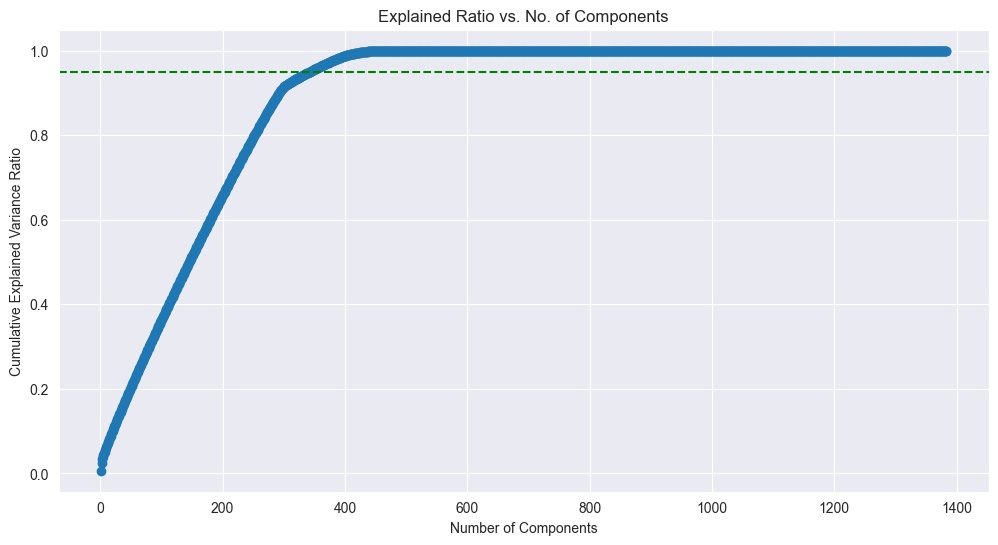

In [ ]:
# Measure the execution time of the following block of code
%%time

# Initialize TruncatedSVD with the number of components set to one less than the number of features in the training data
# This is used for dimensionality reduction while retaining important information
svd = TruncatedSVD(n_components=train_df.shape[1] - 1)

# Fit the SVD model on the scaled training subset and transform the data to reduce its dimensionality
svd.fit_transform(x_train_subset_scaled)

# Get the explained variance ratio for each component, indicating the proportion of variance explained by each component
ratio = svd.explained_variance_ratio_

# Calculate the cumulative sum of the explained variance ratios to understand the total variance explained by the components
cum_sum = np.cumsum(ratio)

# Plot the cumulative explained variance ratio to visualize how many components are needed to reach a certain variance threshold
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cum_sum) + 1), cum_sum, marker='o', linestyle='-')

# Add a horizontal line at the 95% threshold for visual reference
plt.axhline(y=0.95, color='g', linestyle='--', label="95% Explained Variance")

# Find the number of components needed to explain at least 95% of the variance
components_95 = np.argmax(cum_sum >= 0.95) + 1

# Mark the point on the plot where 95% explained variance is reached
plt.scatter(components_95, cum_sum[components_95 - 1], color='green', label=f"95%: {components_95} Components")

# Add labels and title to the plot for better understanding
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("Explained Ratio vs. No. of Components")

# Display grid lines for easier visualization
plt.grid(True)


In [48]:
n_components_95 = np.argmax(cum_sum >= 0.95) + 1
n_components_95

343

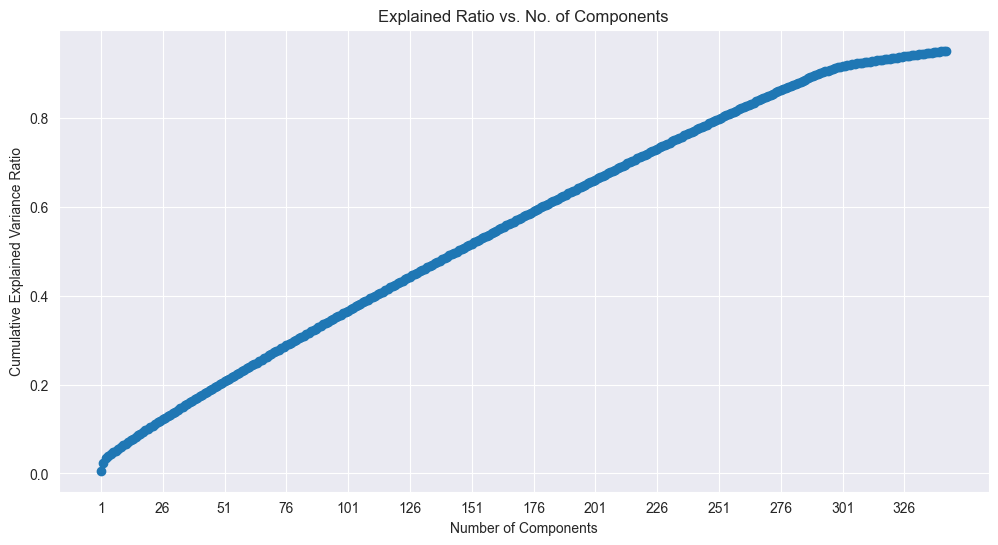

In [ ]:
# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Plot the cumulative explained variance ratio for the first 'n_components_95' components
plt.plot(
    range(1, len(cum_sum[:n_components_95]) + 1),  # X-axis values: number of components from 1 to n_components_95
    cum_sum[:n_components_95],  # Y-axis values: cumulative explained variance ratio for the selected components
    marker='o',  # Add circular markers at each data point
    linestyle='-'  # Connect data points with a solid line
)

# Set custom x-axis ticks to display every 25th component for better readability
plt.xticks(range(1, len(cum_sum[:n_components_95]) + 1, 25))

# Label the x-axis
plt.xlabel("Number of Components")

# Label the y-axis
plt.ylabel("Cumulative Explained Variance Ratio")

# Title for the plot
plt.title("Explained Ratio vs. No. of Components")

# Display a grid for better visualization of the plot
plt.grid(True)

In [ ]:
%time  # Measure the execution time of the following code block

# The previous analysis showed that we can reduce the number of components from 1300+ to less than 350 
# while still maintaining over 95% of the explained variance. Therefore, we'll proceed with this reduction.

# Initialize the TruncatedSVD with the number of components that explain 95% of the variance
svd = TruncatedSVD(n_components=n_components_95)

# Fit the SVD model to the scaled training data
svd.fit(x_train_scaled)

# Transform both the training and test data using the fitted SVD model
x_train_svd, x_test_svd = svd.transform(x_train_scaled), svd.transform(x_test_scaled)

# Display the shape of the transformed training data to confirm the reduction in dimensionality
x_train_svd.shape

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 1.91 µs


(1060727, 343)

In [ ]:
%time  # Measure the execution time of the following code block

# Split the training data into a subset for hyperparameter tuning
x_train_subset_svd, _, y_train_subset_svd, _ = train_test_split(
    x_train_svd, y_train, train_size=subset_size, random_state=42, shuffle=True
)

# Define hyperparameter grids for different models
param_grids = {
    "DecisionTreeClassifier": {
        "max_depth": [None, 10, 20, 30],  # Maximum depth of the tree
        "min_samples_split": [2, 5, 10],  # Minimum number of samples required to split an internal node
        "min_samples_leaf": [1, 2, 4],    # Minimum number of samples required to be at a leaf node
        "criterion": ["gini", "entropy"],  # The function to measure the quality of a split
    },
    "AdaBoostClassifier": {
        "n_estimators": [50, 100, 200],    # Number of weak learners to use
        "learning_rate": [0.01, 0.1, 1.0],  # Learning rate for updating weights
    },
    "GradientBoostingClassifier": {
        "n_estimators": [50, 100, 200],    # Number of boosting stages
        "learning_rate": [0.01, 0.1, 0.2],  # Step size shrinkage
        "max_depth": [3, 5, 10],           # Maximum depth of the individual estimators
        "min_samples_split": [2, 5, 10],   # Minimum number of samples required to split an internal node
    },
    "RandomForestClassifier": {
        "n_estimators": [50, 100, 200],    # Number of trees in the forest
        "max_depth": [None, 10, 20],       # Maximum depth of the trees
        "min_samples_split": [2, 5],       # Minimum number of samples required to split an internal node
        "min_samples_leaf": [1, 2, 4],     # Minimum number of samples required to be at a leaf node
    },
    "ExtraTreesClassifier": {
        "n_estimators": [50, 100, 200],    # Number of trees in the forest
        "max_depth": [None, 10, 20],       # Maximum depth of the trees
        "min_samples_split": [2, 5],       # Minimum number of samples required to split an internal node
        "min_samples_leaf": [1, 2, 4],     # Minimum number of samples required to be at a leaf node
    },
    "LogisticRegression": {
        "C": [0.01, 0.1, 1, 10],          # Inverse of regularization strength
        "penalty": ["l2"],                # Regularization type
    },
    "Lasso (Logistic Regression)": {
        "C": [0.01, 0.1, 1, 10],          # Inverse of regularization strength
        "penalty": ["l1"],                # L1 regularization (Lasso)
    },
    "RidgeClassifier": {
        "alpha": [0.1, 1.0, 10.0],        # Regularization strength
        "max_iter": [1000, 2000],         # Maximum number of iterations
    },
    "ElasticNet (Logistic Regression)": {
        "C": [0.01, 0.1, 1, 10],          # Inverse of regularization strength
        "penalty": ["elasticnet"],        # Elastic net regularization
        "l1_ratio": [0.1, 0.5, 0.9],      # The mix ratio between L1 and L2 regularization
    },
    "SVC": {
        "C": [0.1, 1],                   # Regularization parameter
        "kernel": ["rbf"],                # Kernel type
        "gamma": ["scale"],               # Kernel coefficient
    },
}

# Check if the best models have already been saved in a file
if os.path.exists('best_models.pkl.zip'):
    # Unzip and load the best models if they exist
    with zipfile.ZipFile('best_models.pkl.zip', 'r') as file:
        file.extractall()  # Extract files from the zip archive
        best_models = joblib.load('best_models.pkl')  # Load the models using joblib
        print("Best Models Loaded")
else:
    # If no models are saved, perform hyperparameter tuning and save the best models
    best_models = {}
    for name, model in models:
        print(f"Tuning {name}")
        param_grid = param_grids.get(name, None)  # Get the parameter grid for the current model
        # Initialize RandomizedSearchCV for hyperparameter tuning
        grid_search = RandomizedSearchCV(
            model, param_grid, cv=3, scoring=scoring, n_jobs=-1, verbose=1, n_iter=10
        )
        grid_search.fit(x_train_subset_svd, y_train_subset_svd)  # Fit the model to the training subset
        best_score_ = grid_search.best_score_  # Get the best cross-validation score
        best_params_ = grid_search.best_params_  # Get the best parameters for the model
        best_models[name] = (grid_search.best_estimator_, best_params_, best_score_)
        print(f"Best parameters for {name}: {best_params_}")
        print(f"Best cross-validation score: {best_score_}")
    
    # Save the best models to a file
    joblib.dump(best_models, 'best_models.pkl')
    print("Best Models Saved")


CPU times: user 1e+03 ns, sys: 1e+03 ns, total: 2 µs
Wall time: 3.1 µs
Best Models Loaded


DecisionTreeClassifier Test Accuracy: 0.6116199828889538
AdaBoostClassifier Test Accuracy: 0.6622399365285224
GradientBoostingClassifier Test Accuracy: 0.6700000357367147
RandomForestClassifier Test Accuracy: 0.6445200245161063
ExtraTreesClassifier Test Accuracy: 0.6421799381125061
LogisticRegression Test Accuracy: 0.6618599561286105
Lasso (Logistic Regression) Test Accuracy: 0.6648999517309545
RidgeClassifier Test Accuracy: 0.6618200013294826
ElasticNet (Logistic Regression) Test Accuracy: 0.6634599433296345
SVC Test Accuracy: 0.6606200133287625


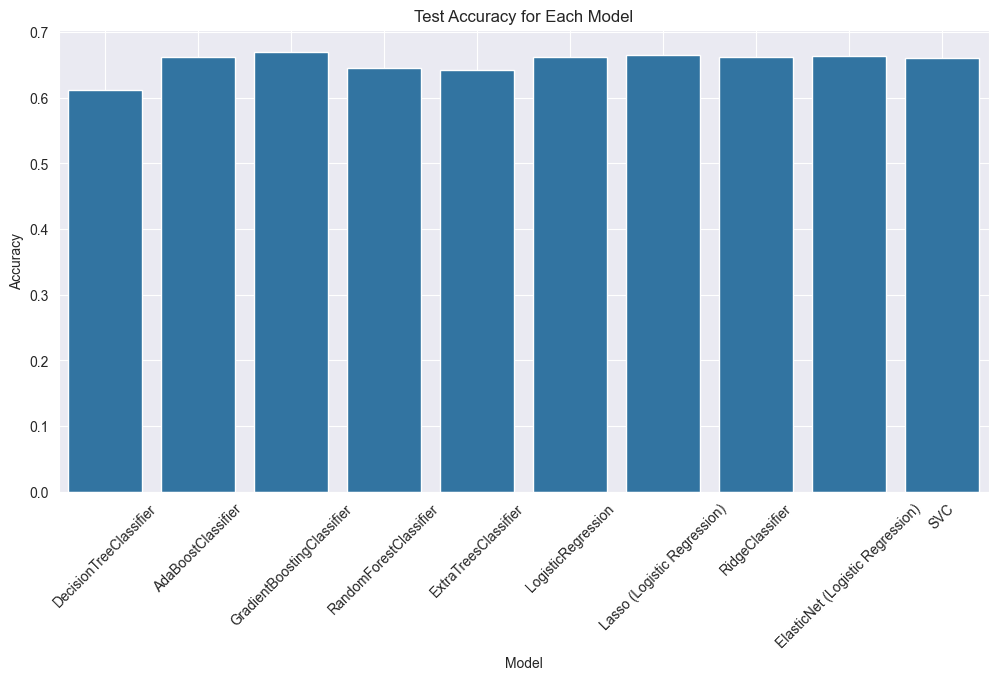

In [ ]:
# Dictionary to store test scores of each model
test_scores = {}

# Evaluate each model and print its test accuracy
for name, tuple in best_models.items():
    model = tuple[0]  # Extract the trained model from the tuple
    score = tuple[2]  # Extract the best cross-validation score from the tuple
    test_scores[name] = score  # Store the score in the test_scores dictionary
    print(f"{name} Test Accuracy: {score}")  # Print the model name and its test accuracy

# Plot a bar chart to visualize the test accuracy of each model
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x=list(test_scores.keys()), y=list(test_scores.values()))  # Create a bar plot with model names and their test accuracies
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title("Test Accuracy for Each Model")  # Set the plot title
plt.ylabel("Accuracy")  # Set the y-axis label
plt.xlabel("Model")  # Set the x-axis label
plt.grid(True)  # Display grid lines for better readability
plt.show()  # Display the plot



In [ ]:

# Identify the model with the highest test accuracy from the test_scores dictionary
# best_model_name = max(test_scores, key=test_scores.get)

# We prefer ElasticNet Logistic Regression over DecisionTreeClassifier because it is less computationally intensive,
# while maintaining a similar accuracy.
best_model_name = "ElasticNet (Logistic Regression)"  # Choose the best model based on prior analysis

# Retrieve the best model, its parameters, and its score from the best_models dictionary
best_model, best_params, best_score = best_models[best_model_name]

# Print the details of the best model
print(f"\nBest Model: {best_model_name}")  # Print the name of the best model
print(f"Test Accuracy: {best_score}")  # Print the test accuracy of the best model
print(f"Parameters: {best_params}")  # Print the hyperparameters of the best model



Best Model: ElasticNet (Logistic Regression)
Test Accuracy: 0.6634599433296345
Parameters: {'penalty': 'elasticnet', 'l1_ratio': 0.5, 'C': 0.01}


CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 2.86 µs
Learning curve results loaded from file.


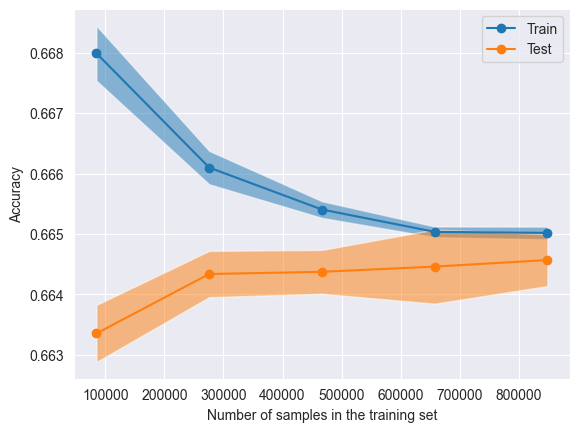

In [ ]:
%time  # Measure the execution time of the following code block

# Import necessary libraries for model evaluation and plotting
from sklearn.model_selection import ShuffleSplit, LearningCurveDisplay

# Common parameters for generating learning curves
common_params = {
    "X": x_train_svd,  # Feature matrix for training
    "y": y_train,  # Target variable for training
    "train_sizes": np.linspace(0.1, 1.0, 5),  # Proportion of the training data used for each learning curve step
    "cv": ShuffleSplit(n_splits=3, test_size=0.2),  # Cross-validation strategy with 3 splits and 20% test size
    "score_type": "both",  # Display both training and validation scores
    "n_jobs": -1,  # Use all available CPU cores for parallel computation
    "line_kw": {"marker": "o"},  # Style for the plot lines (e.g., marker style)
    "std_display_style": "fill_between",  # Display the standard deviation as a shaded area
    "score_name": "Accuracy",  # Name for the metric being used
}

# Filename for saving/loading learning curve results
filename = 'learning_curve_results.pkl'

# Attempt to load precomputed learning curve results from a file
try:
    learning_curve_results = joblib.load(filename)
    print("Learning curve results loaded from file.")
except FileNotFoundError:
    # If the file doesn't exist, compute the learning curve results from scratch
    print("Learning curve results not found, computing...")

    learning_curve_results = {}  # Dictionary to store learning curve results

    # Specify the model to use for generating the learning curve
    estimator = best_model

    # Generate the learning curve and store it in the dictionary
    learning_curve_results[estimator.__class__.__name__] = LearningCurveDisplay.from_estimator(
        estimator, **common_params)

    # Save the learning curve results to a file for future use
    joblib.dump(learning_curve_results, filename)
    print(f"Learning curve results for {estimator.__class__.__name__} saved to {filename}")

# Uncomment the following lines to plot the learning curve if needed
# plt.figure(figsize=(12, 6))
# results = learning_curve_results[best_model_2.__class__.__name__]  # Access results for a specific model
# results.plot()  # Plot the learning curve
# plt.title(f"Learning Curve for {best_model_2.__class__.__name__}")  # Set the plot title
# plt.tight_layout()  # Adjust plot layout for better readability
# plt.show()  # Display the plot

## **NOTE**: Using PCA speeds up computation and has similar accuracy when compared to previous models when using all the features (Previously 10 mins now ~14 seconds after PCA

## Neural Networks with Torch

In [ ]:
# Determine the device to be used for training the model
device = (
    "cuda"  # Use CUDA (GPU) if a compatible NVIDIA GPU is available
    if torch.cuda.is_available()  # Check if CUDA is available
    else "mps"  # Use Metal Performance Shaders (MPS) for MacOS if supported
    if torch.backends.mps.is_available()  # Check if MPS backend is available on MacOS
    else "cpu"  # Fall back to CPU if neither CUDA nor MPS is available
)

# Print the chosen device for confirmation
print(f"Using {device} device")

Using mps device


In [ ]:
# For our first architecture, we'll be using a Feed Forward Neural Network (FNN)
# to evaluate if it can achieve better accuracy compared to traditional machine learning algorithms.
class FNN(nn.Module):
    def __init__(self, input_dim, rnn_hidden_dim, rnn_layer_dim):
        super(FNN, self).__init__()  # Initialize the parent class (nn.Module)
        
        # Store RNN parameters
        self.rnn_hidden_dim = rnn_hidden_dim
        self.rnn_layer_dim = rnn_layer_dim
        
        # Define an RNN layer to process sequential input data
        # 'batch_first=True' indicates that the input and output tensors are in the form (batch, seq, feature)
        # 'nonlinearity="relu"' specifies the non-linear activation function used within the RNN
        self.rnn = nn.RNN(input_dim, rnn_hidden_dim, rnn_layer_dim, batch_first=True, nonlinearity='relu')

        # Define a sequential block of fully connected layers with ReLU activation and dropout
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(rnn_hidden_dim, 1024),  # Linear layer with 1024 output features
            nn.ReLU(),  # ReLU activation function
            nn.Dropout(p=0.4),  # Dropout with probability 0.4 for regularization
            nn.Linear(1024, 512),  # Linear layer with 512 output features
            nn.ReLU(),  # ReLU activation function
            nn.Dropout(p=0.4),  # Dropout with probability 0.4 for regularization
            nn.Linear(512, 256),  # Linear layer with 256 output features
            nn.ReLU(),  # ReLU activation function
            nn.Dropout(p=0.35),  # Dropout with probability 0.35 for regularization
            nn.Linear(256, 128),  # Linear layer with 128 output features
            nn.ReLU(),  # ReLU activation function
            nn.Dropout(p=0.3),  # Dropout with probability 0.3 for regularization
            nn.Linear(128, 64),  # Linear layer with 64 output features
            nn.ReLU(),  # ReLU activation function
            nn.Dropout(p=0.2),  # Dropout with probability 0.2 for regularization
            nn.Linear(64, 32),  # Linear layer with 32 output features
            nn.ReLU(),  # ReLU activation function
            nn.Dropout(p=0.15),  # Dropout with probability 0.15 for regularization
            nn.Linear(32, 1)  # Output layer with 1 output feature for regression or binary classification
        )

    def forward(self, x):
        # Add an extra dimension to the input tensor for the RNN (batch, seq, feature)
        x = x.unsqueeze(1)
        
        # Initialize the hidden state for the RNN with zeros
        h0 = torch.zeros(self.rnn_layer_dim, x.size(0), self.rnn_hidden_dim).to(x.device)

        # Pass the input through the RNN layer
        out, hn = self.rnn(x, h0.detach())
        
        # Extract the features from the last time step of the RNN
        rnn_features = out[:, -1, :]
        
        # Pass the RNN features through the fully connected stack
        output = self.linear_relu_stack(rnn_features)
        return output  # Return the final output of the network

In [ ]:
# Determine the input dimension from the training data shape
input_dim = x_train_svd.shape[1]

# Set the number of hidden units in the RNN layer
rnn_hidden_dim = 256

# Set the number of layers in the RNN
rnn_layer_dim = 3

# Instantiate the FNN model with the specified input dimension, RNN hidden size, and number of RNN layers
# Transfer the model to the specified device (e.g., CUDA, MPS, or CPU)
fnn = FNN(input_dim=input_dim, rnn_hidden_dim=rnn_hidden_dim, rnn_layer_dim=rnn_layer_dim).to(device)

# Calculate the total number of parameters in the model that require gradients
# This helps to understand the model's complexity and computational requirements
total_params = sum(p.numel() for p in fnn.parameters() if p.requires_grad)

# Print the model's parameters (this shows the list of all model parameters)
print(fnn.parameters)

# Print the total number of trainable parameters in the model
print("Total Params: ", total_params)

<bound method Module.parameters of FNN(
  (rnn): RNN(343, 256, num_layers=3, batch_first=True)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=256, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.4, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.35, inplace=False)
    (9): Linear(in_features=256, out_features=128, bias=True)
    (10): ReLU()
    (11): Dropout(p=0.3, inplace=False)
    (12): Linear(in_features=128, out_features=64, bias=True)
    (13): ReLU()
    (14): Dropout(p=0.2, inplace=False)
    (15): Linear(in_features=64, out_features=32, bias=True)
    (16): ReLU()
    (17): Dropout(p=0.15, inplace=False)
    (18): Linear(in_features=32, out_features=1, bias=True)
  )
)>
Total Params:  1379585


In [ ]:
%%time  # Measures the execution time of the code cell

# Define the input dimension from the training data shape
input_dim = x_train_svd.shape[1] 

# Set the loss function for binary classification with logits
criterion = nn.BCEWithLogitsLoss()

# Initialize the optimizer, using Adam with a learning rate of 1e-3
optimizer = torch.optim.Adam(fnn.parameters(), lr=1e-3)

# Set up a learning rate scheduler to reduce the learning rate by a factor of 0.1 every 30 epochs
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

# Convert the training features and labels into PyTorch tensors for training
features_train_tensor = torch.tensor(x_train_svd, dtype=torch.float32)
labels_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.float32).reshape(-1, 1)

# Convert the test features and labels into PyTorch tensors for evaluation
features_test_tensor = torch.tensor(x_test_svd, dtype=torch.float32)
labels_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).reshape(-1, 1)

# Create TensorDatasets to pair the features and labels for both training and testing data
train_dataset = TensorDataset(features_train_tensor, labels_train_tensor)
test_dataset = TensorDataset(features_test_tensor, labels_test_tensor)

# Create DataLoaders to manage mini-batches for training and testing
# `num_workers=os.cpu_count()` allows parallel data loading based on available CPU cores
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=os.cpu_count())
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=os.cpu_count())

# Set the number of epochs for training and the patience for early stopping
epochs = 15
patience = 2  # Number of epochs to wait for improvement before stopping

# Path where the best model will be saved
best_model_path = 'best_fnn_model.pth'

CPU times: user 305 ms, sys: 354 ms, total: 659 ms
Wall time: 103 ms


In [ ]:
%%time  # Measures the execution time of the code cell

# Function to train the neural network model
def train_NN_model(model, train_loader, test_loader, optimizer, criterion, scheduler,
                   epochs, device, patience, best_model_path):
    # Initialize variables for tracking the best performance
    best_test_accuracy = 0
    best_epoch = 0
    counter = 0  # Counter for early stopping

    # Lists to log metrics during training and evaluation
    loss_LIST_log, acc_LIST_log = [], []  # Training loss and accuracy
    test_acc_LIST_log = []  # Test accuracy
    precision_LIST, recall_LIST, f1_LIST, roc_auc_LIST = [], [], [], []  # Additional metrics

    # Loop over each epoch
    for epoch in range(epochs):
        model.train()  # Set the model to training mode
        running_loss = 0.0  # Accumulate loss for the training set
        correct = 0  # Count the number of correct predictions in training
        total = 0  # Total number of samples in training

        # Loop over each batch in the training set
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)  # Move data to the appropriate device

            # Step 1: Reset gradients for the optimizer
            optimizer.zero_grad()

            # Step 2: Forward pass through the model
            outputs = model(inputs)  # Get raw logits from the model

            # Step 3: Compute the loss
            loss = criterion(outputs, labels)

            # Step 4: Backward pass and optimization step
            loss.backward()  # Backpropagate the loss
            optimizer.step()  # Update the model parameters

            # Accumulate loss for this batch
            running_loss += loss.item()

            # Step 5: Compute predictions using a threshold of 0.5
            probabilities = torch.sigmoid(outputs)  # Apply sigmoid to get probabilities
            predicted = (probabilities >= 0.5).float()  # Convert probabilities to binary predictions

            # Step 6: Update correct prediction count and total count
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        # Calculate training accuracy for the epoch
        train_accuracy = 100 * correct / total

        # Calculate the average training loss for the epoch
        average_loss = running_loss / len(train_loader)
        loss_LIST_log.append(average_loss)
        acc_LIST_log.append(train_accuracy)

        print(f"Epoch {epoch + 1}/{epochs}, Loss: {average_loss:.4f}, Training Accuracy: {train_accuracy:.2f}%")

        # Step 7: Evaluate on the test set
        model.eval()  # Set the model to evaluation mode
        test_correct = 0  # Number of correct predictions in the test set
        test_total = 0  # Total number of samples in the test set
        test_running_loss = 0.0  # Accumulate loss for the test set

        # Lists to store test results for additional metrics
        all_test_labels = []
        all_test_predictions = []
        all_test_probabilities = []

        with torch.no_grad():  # Disable gradient calculation for evaluation
            for test_inputs, test_labels in test_loader:
                test_inputs, test_labels = test_inputs.to(device), test_labels.to(device)

                # Forward pass for test data
                test_outputs = model(test_inputs)
                test_loss = criterion(test_outputs, test_labels)

                # Accumulate test loss
                test_running_loss += test_loss.item()

                # Compute test predictions
                test_probabilities = torch.sigmoid(test_outputs)
                test_predicted = (test_probabilities >= 0.5).float()

                # Update correct and total counts
                test_correct += (test_predicted == test_labels).sum().item()
                test_total += test_labels.size(0)

                # Store test labels and predictions for metrics calculation
                all_test_labels.extend(test_labels.cpu().numpy())
                all_test_predictions.extend(test_predicted.cpu().numpy())
                all_test_probabilities.extend(test_probabilities.cpu().numpy())

        # Calculate test accuracy
        test_accuracy = 100 * test_correct / test_total
        test_acc_LIST_log.append(test_accuracy)

        # Calculate average test loss
        test_average_loss = test_running_loss / len(test_loader)

        # Calculate additional metrics: precision, recall, F1-score, and ROC-AUC
        precision = precision_score(all_test_labels, all_test_predictions)
        recall = recall_score(all_test_labels, all_test_predictions)
        f1 = f1_score(all_test_labels, all_test_predictions)
        roc_auc = roc_auc_score(all_test_labels, all_test_probabilities)

        # Append metrics to their respective logs
        precision_LIST.append(precision)
        recall_LIST.append(recall)
        f1_LIST.append(f1)
        roc_auc_LIST.append(roc_auc)

        # Print test metrics for the current epoch
        print(f"Epoch {epoch + 1}/{epochs}, Test Loss: {test_average_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")
        print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}, ROC-AUC: {roc_auc:.2f}")

        # Check if this epoch has the best test accuracy so far
        if test_accuracy > best_test_accuracy:
            best_test_accuracy = test_accuracy
            best_epoch = epoch + 1
            # Save the model state if it's the best so far
            torch.save(model.state_dict(), best_model_path)
            print(f"--> New best model saved at epoch {best_epoch} with test accuracy: {best_test_accuracy:.2f}%")
            counter = 0  # Reset early stopping counter if improvement
        else:
            counter += 1  # Increment early stopping counter
            if counter >= patience:  # Check for early stopping condition
                print("Early stopping triggered.")
                break  # Exit training loop if no improvement for 'patience' epochs

        # Step 8: Step the scheduler to update the learning rate
        scheduler.step()

    # Print summary of training results
    print(f"\nTraining complete. Best test accuracy: {best_test_accuracy:.2f}% at epoch {best_epoch}.")
    return {
        "loss_log": loss_LIST_log,
        "acc_log": acc_LIST_log,
        "test_acc_log": test_acc_LIST_log,
        "precision_log": precision_LIST,
        "recall_log": recall_LIST,
        "f1_log": f1_LIST,
        "roc_auc_log": roc_auc_LIST,
        "best_test_accuracy": best_test_accuracy,
        "best_epoch": best_epoch,
    }

CPU times: user 34 µs, sys: 2 µs, total: 36 µs
Wall time: 7.15 µs


In [ ]:
%%time  # Measures the execution time of the cell

# Call the train_NN_model function to train the neural network with the specified parameters
results = train_NN_model(
    model=fnn,  # The model to be trained
    train_loader=train_loader,  # DataLoader for the training set
    test_loader=test_loader,  # DataLoader for the test set
    optimizer=optimizer,  # Optimizer used for parameter updates (e.g., Adam)
    criterion=criterion,  # Loss function (e.g., BCEWithLogitsLoss for binary classification)
    scheduler=scheduler,  # Learning rate scheduler for adjusting the learning rate during training
    epochs=epochs,  # Number of epochs to train the model
    device=device,  # Device to use for training (CPU or GPU)
    patience=patience,  # Number of epochs to wait without improvement before early stopping
    best_model_path="best_fnn_model.pth",  # Path to save the model with the best performance
)

# Display the results from the training process, which include training metrics and best performance details
results

Epoch 1/15, Loss: 0.5951, Training Accuracy: 67.30%
Epoch 1/15, Test Loss: 0.5800, Test Accuracy: 68.32%
Precision: 0.72, Recall: 0.53, F1-Score: 0.61, ROC-AUC: 0.76
--> New best model saved at epoch 1 with test accuracy: 68.32%
Epoch 2/15, Loss: 0.5795, Training Accuracy: 68.52%
Epoch 2/15, Test Loss: 0.5727, Test Accuracy: 68.93%
Precision: 0.68, Recall: 0.63, F1-Score: 0.65, ROC-AUC: 0.76
--> New best model saved at epoch 2 with test accuracy: 68.93%
Epoch 3/15, Loss: 0.5763, Training Accuracy: 68.76%
Epoch 3/15, Test Loss: 0.5765, Test Accuracy: 68.59%
Precision: 0.66, Recall: 0.69, F1-Score: 0.67, ROC-AUC: 0.76
Epoch 4/15, Loss: 0.5752, Training Accuracy: 68.78%
Epoch 4/15, Test Loss: 0.5751, Test Accuracy: 68.92%
Precision: 0.70, Recall: 0.59, F1-Score: 0.64, ROC-AUC: 0.76
Early stopping triggered.

Training complete. Best test accuracy: 68.93% at epoch 2.
CPU times: user 51min 10s, sys: 25min, total: 1h 16min 10s
Wall time: 11min 31s


{'loss_log': [0.5951372260575963,
  0.5795478342730102,
  0.5763189139747499,
  0.5752417093197485],
 'acc_log': [67.30487674962549,
  68.52328638754364,
  68.75501424966085,
  68.77782879100843],
 'test_acc_log': [68.31935053481378,
  68.92728190980152,
  68.59372997746169,
  68.91522127495986],
 'precision_log': [0.7179537329812781,
  0.6825970525431442,
  0.6559124187896509,
  0.6980451013545604],
 'recall_log': [0.5321081707925975,
  0.6281427674070256,
  0.691900075700227,
  0.5917986051830496],
 'f1_log': [0.6112162068407299,
  0.654238766660236,
  0.6734257978296057,
  0.6405460060667341],
 'roc_auc_log': [0.757355845896015,
  0.7624569367540992,
  0.7630441692323366,
  0.7618610243275138],
 'best_test_accuracy': 68.92728190980152,
 'best_epoch': 2}

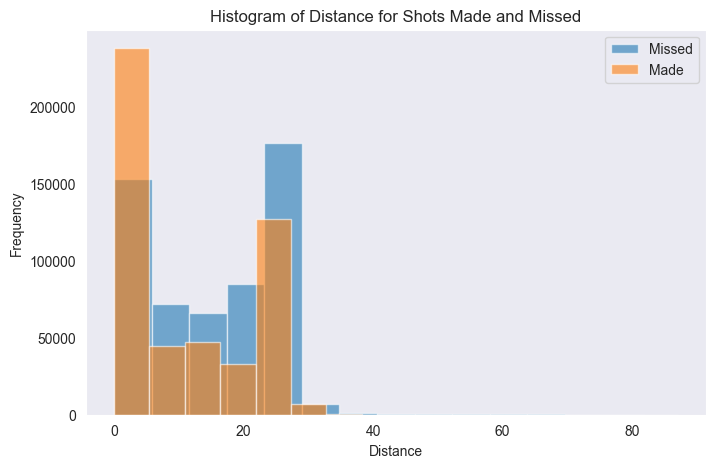

In [ ]:
# Check if there is a relationship between distance and whether a shot is made.
# Based on the plot, we can observe that the frequency of shots made is much higher when 
# the distance is shorter compared to missed shots.

# Create a DataFrame with only the relevant columns for analysis: SHOT_DISTANCE and SHOT_MADE
sample_df = train_df[["SHOT_DISTANCE", "SHOT_MADE"]]

# Set up the plot with a specified figure size for better readability
plt.figure(figsize=(8, 5))

# Plot a histogram for missed shots (SHOT_MADE == 0) with alpha for transparency and 15 bins for the distance range
sample_df[sample_df['SHOT_MADE'] == 0]['SHOT_DISTANCE'].hist(alpha=0.6, label='Missed', bins=15)

# Plot a histogram for made shots (SHOT_MADE == 1) with alpha for transparency and 15 bins for the distance range
sample_df[sample_df['SHOT_MADE'] == 1]['SHOT_DISTANCE'].hist(alpha=0.6, label='Made', bins=15)

# Add a title to the plot
plt.title('Histogram of Distance for Shots Made and Missed')

# Label the x-axis as 'Distance'
plt.xlabel('Distance')

# Label the y-axis as 'Frequency'
plt.ylabel('Frequency')

# Add a legend to differentiate between 'Made' and 'Missed' shots
plt.legend()

# Display grid lines for better visualization of data points
plt.grid()

# Show the plot
plt.show()

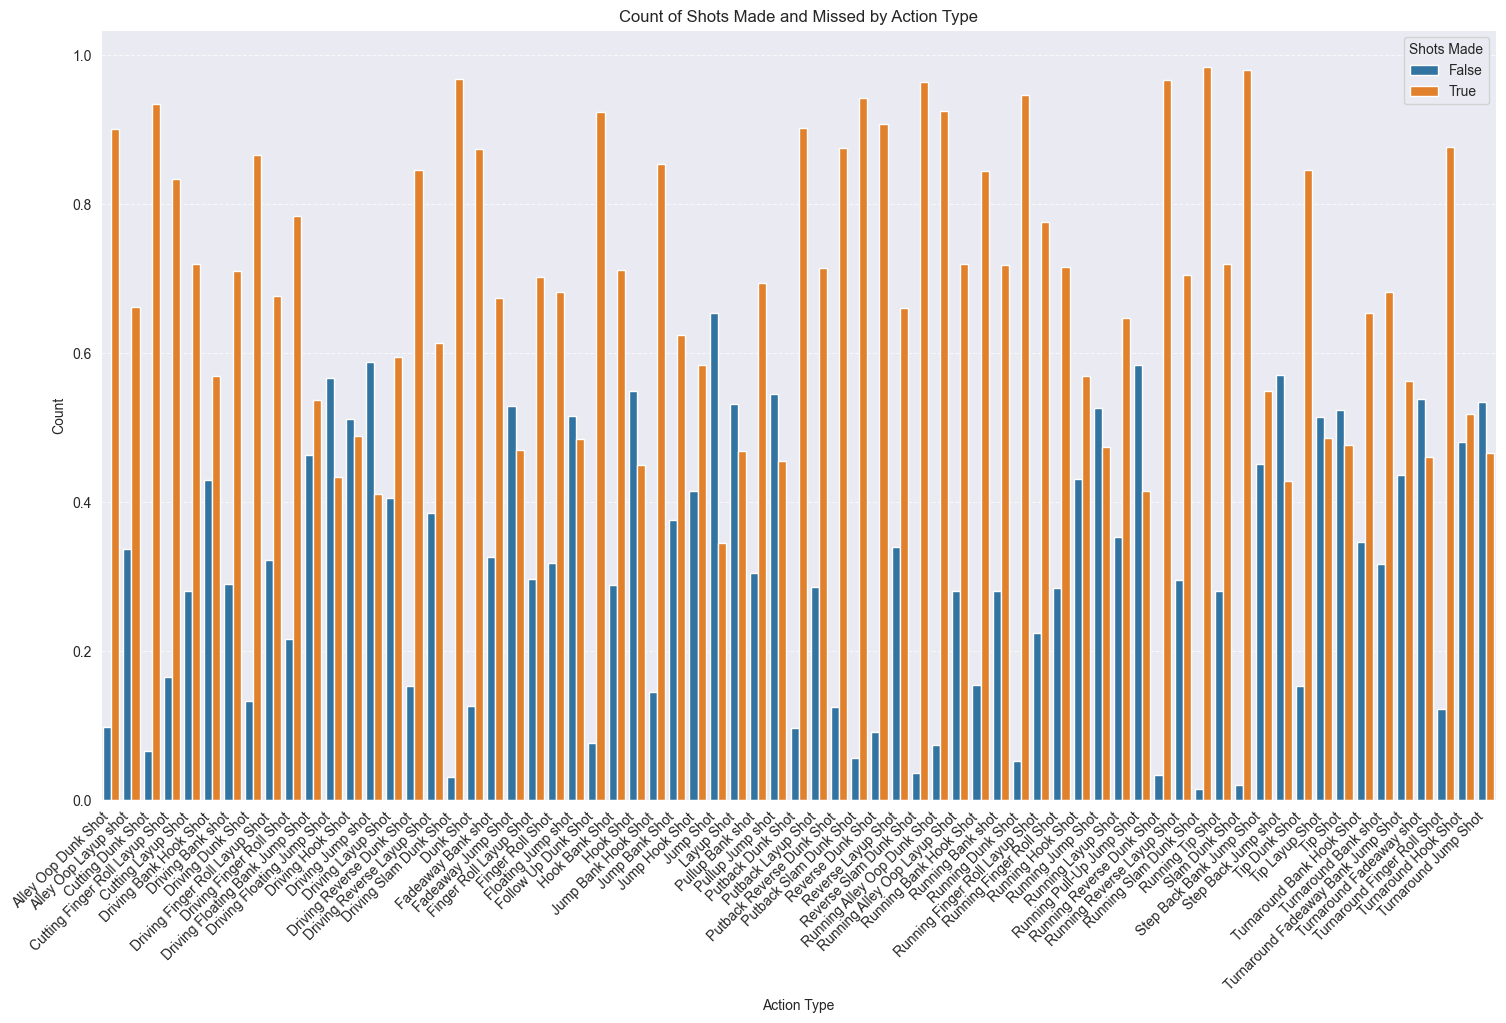

In [ ]:
# Normalize the data to show the proportion of shots made and missed by action type.
# Group the data by 'ACTION_TYPE' and 'SHOT_MADE', then count the number of occurrences.
normalized_data = (
    df_shots_clean
    .groupby(['ACTION_TYPE', 'SHOT_MADE'])
    .size()  # Count the number of occurrences for each combination of action type and shot outcome.
    .reset_index(name='count')  # Reset index and rename the count column for clarity.
)

# Calculate the total number of shots for each action type.
total_counts = normalized_data.groupby('ACTION_TYPE')['count'].transform('sum')

# Create a new column for the proportion of each shot type (made or missed) relative to the total for that action type.
normalized_data['proportion'] = normalized_data['count'] / total_counts

# Set up the plot with a large figure size for better visualization.
plt.figure(figsize=(18, 10))

# Create a barplot using seaborn to show the proportion of shots made and missed by action type.
sns.barplot(
    data=normalized_data,
    x='ACTION_TYPE',  # Set 'ACTION_TYPE' as the x-axis.
    y='proportion',  # Set 'proportion' as the y-axis.
    hue='SHOT_MADE'  # Color bars by 'SHOT_MADE' to differentiate between made and missed shots.
)

# Set the title of the plot.
plt.title('Count of Shots Made and Missed by Action Type')

# Label the x-axis.
plt.xlabel('Action Type')

# Label the y-axis.
plt.ylabel('Count')

# Rotate the x-axis labels for better readability and align them to the right.
plt.xticks(rotation=45, ha='right')

# Add a legend with a title to differentiate between 'Shots Made' and 'Missed'.
plt.legend(title='Shots Made')

# Add grid lines along the y-axis to improve readability of the chart.
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot.
plt.show()

# Model Choice
## Elastic Net Regression vs Deep Neural Network

The reason why we choose this model. It achieves similar accuracy scores and metrics compared to a deep neural network, therefore, we'll proceed with finetuning a Elastic Net Regression because it's more computationally less expensive to run. Here we plot different performance metrics for each model. It seems like the Elastic Net Regression is able to achieve better accuracy overall. It can generalize better the neural network. Based on the confustion matrix the neural network seems to be more bias towards predicting that a shot will not be a made.

              precision    recall  f1-score   support

           0       0.67      0.73      0.70    141152
           1       0.66      0.59      0.62    124174

    accuracy                           0.66    265326
   macro avg       0.66      0.66      0.66    265326
weighted avg       0.66      0.66      0.66    265326


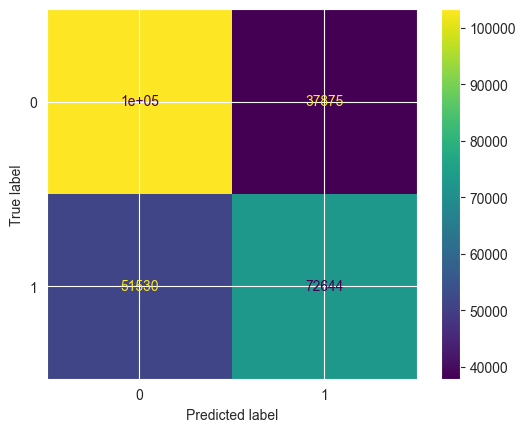

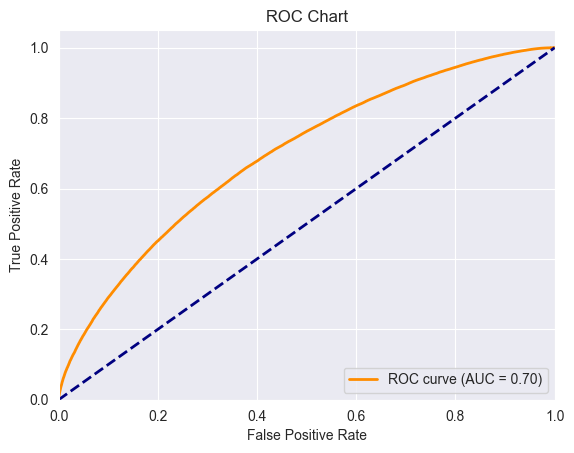

CPU times: user 1.37 s, sys: 1.99 s, total: 3.36 s
Wall time: 773 ms


In [ ]:
%%time  # Measure the execution time of the entire code block.

# Check if the predictions file already exists to avoid recalculating predictions.
if os.path.exists('preds.npy'):
    preds = np.load('preds.npy')  # Load the existing predictions from the file.
else:
    # Train the model if predictions do not exist.
    best_model.fit(x_train_svd, y_train)
    
    # Save the trained model to disk using joblib for later use.
    joblib.dump(best_model, 'best_model.joblib')
    
    # Generate predictions on the test data.
    preds = best_model.predict(x_test_svd)
    
    # Save the predictions to a file for future use.
    np.save('preds.npy', preds)

# Generate and print the confusion matrix.
conf_matrix = confusion_matrix(y_test, preds)
print(classification_report(y_test, preds))  # Print detailed classification metrics.

# Display the confusion matrix using a graphical plot.
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()

# Calculate predicted probabilities for the ROC curve (only for binary classification).
probs = best_model.predict_proba(x_test_svd)[:, 1]  # Extract probabilities for the positive class.

# Check if the 'probs' variable exists before plotting the ROC curve.
if 'probs' in locals():  
    # Calculate the false positive rate, true positive rate, and thresholds for the ROC curve.
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)  # Calculate the area under the ROC curve (AUC).

    # Plot the ROC curve.
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random guessing.
    plt.xlim([0.0, 1.0])  # Set the x-axis range.
    plt.ylim([0.0, 1.05])  # Set the y-axis range.
    plt.xlabel('False Positive Rate')  # Label for the x-axis.
    plt.ylabel('True Positive Rate')  # Label for the y-axis.
    plt.title('ROC Chart')  # Title of the plot.
    plt.legend(loc="lower right")  # Position the legend at the lower right.
    plt.show()
else:
    print("Cannot plot ROC curve")  # Print an error message if probabilities are not available.

              precision    recall  f1-score   support

           0       0.63      0.90      0.74    141152
           1       0.78      0.41      0.54    124174

    accuracy                           0.67    265326
   macro avg       0.71      0.65      0.64    265326
weighted avg       0.70      0.67      0.65    265326


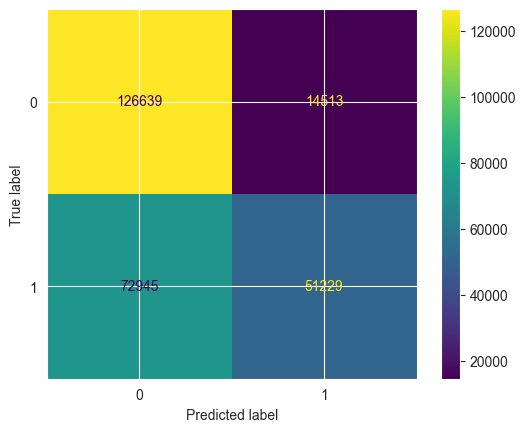

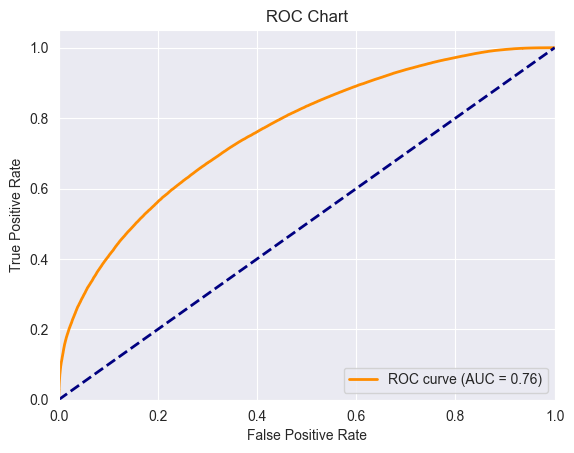

CPU times: user 58.4 s, sys: 25.2 s, total: 1min 23s
Wall time: 12.9 s


In [ ]:
%%time  # Measure the execution time of the code block.

# Load the FNN model with the best weights from the saved state.
model = FNN(input_dim=input_dim, rnn_hidden_dim=rnn_hidden_dim, rnn_layer_dim=rnn_layer_dim).to(device)
model.load_state_dict(torch.load("best_fnn_model.pth", weights_only=True))  # Load the saved model weights.

# Initialize lists to store true labels, predictions, and predicted probabilities.
predicted = []
model.eval()  # Set the model to evaluation mode for inference.
y_true, y_pred, y_pred_probs = [], [], []

# Convert the test set to a PyTorch tensor and move it to the specified device.
x_test_tensor = torch.from_numpy(x_test_svd.astype(np.float32)).to(device)
y_test_array = y_test.values  # Convert the test labels to a NumPy array.

# Define the batch size for making predictions.
batch_size = 64

# Iterate over the test data in batches for prediction.
for i in range(0, len(x_test_tensor), batch_size):
    x_batch = x_test_tensor[i:i + batch_size]  # Select a batch of input data.
    y_batch = y_test_array[i:i + batch_size]  # Select the corresponding labels for the batch.
    
    with torch.no_grad():  # Disable gradient computation for inference.
        pred = model(x_batch)  # Get model predictions (raw logits).
        pred = (pred >= 0.5).float().cpu().numpy()  # Convert raw logits to binary predictions.
        pred_probs = model(x_batch).cpu().numpy().flatten()  # Get prediction probabilities for the positive class.
        
        # Append the predictions and true labels to the respective lists.
        y_pred_probs.extend(pred_probs)
        y_true.extend(y_batch)
        y_pred.extend(pred)

# Convert lists to NumPy arrays for easier analysis.
y_true = np.array(y_true)
y_pred = np.array(y_pred).flatten()

# Print a detailed classification report to evaluate model performance.
print(classification_report(y_true, y_pred))

# Generate and save the confusion matrix.
conf_matrix = confusion_matrix(y_true, y_pred)
joblib.dump(conf_matrix, 'conf_matrix_fnn.joblib')  # Save the confusion matrix to a file.

# Display the confusion matrix using a graphical plot.
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()

# Calculate the ROC curve and AUC score for the model's predictions.
fpr, tpr, thresholds = roc_curve(y_true, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve.
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random guessing.
plt.xlim([0.0, 1.0])  # Set the x-axis range.
plt.ylim([0.0, 1.05])  # Set the y-axis range.
plt.xlabel('False Positive Rate')  # Label for the x-axis.
plt.ylabel('True Positive Rate')  # Label for the y-axis.
plt.title('ROC Chart')  # Title of the plot.
plt.legend(loc="lower right")  # Position the legend at the lower right.
plt.show()

In [149]:
conn.close()